# Smartscreen - a digital system to improve early detection and triage in mental health

Final project in the course: *Machine Learning in Healthcare*

Prepared by: *Lea Fenz, Lukas Bilicky, Karl Schneidewind, Ellen Urdal & Simon Volkmann*

## Step 1: Data preparation

First the data is prepared for further analysis as the available information is split across two data sources that represent different stages of the same workflow, which were originally recorded within the Spanish healthcare system.

### Translate and clean the data

Here the data is cleaned and translated, which includes mapping values to easy-to-understand names, ensuring correct datatypes and dropping unneeded columns.

#### Load the data

In [1]:
!pip install pyreadstat

   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.4 MB ? eta -:--:--
   -------- ------------------------------- 0.5/2.4 MB 1.4 MB/s eta 0:00:02
   -------- ------------------------------- 0.5/2.4 MB 1.4 MB/s eta 0:00:02
   ------------ --------------------------- 0.8/2.4 MB 1.0 MB/s eta 0:00:02
   ----------------- ---------------------- 1.0/2.4 MB 1.0 MB/s eta 0:00:02
   --------------------- ------------------ 1.3/2.4 MB 1.0 MB/s eta 0:00:02
   --------------------- ------------------ 1.3/2.4 MB 1.0 MB/s eta 0:00:02
   ------------------------- -------------- 1.6/2.4 MB 976.0 kB/s eta 0:00:01
   ------------------------------ --------- 1.8/2.4 MB 987.4 kB/s eta 0:00:01
   ---------------------------------- ----- 2.1/2.4 MB 1.0 MB/s eta 0:00:01
   ---------------------------------- ----- 2.1/2.4 MB 1.0 MB/s eta 0:00:01
   --------------------------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from google.colab import drive
drive.mount('/content/drive')  # Mount Google Drive

import pyreadstat
import pandas as pd
pd.set_option('display.max_columns', None)

# If you want to run the code the filepaths need to be changed
# For this you need to save the data in you own Google Drive
# Then add the adjusted filepaths like this and comment out the other ones

# Define filepaths
# Karl
path_1 = "/content/drive/MyDrive/Machine Learning in Healthcare/Final Project/Smartscreen data/TAMIZAJE_2025_10_24_A.sav"           # SCREENING_2025_10_24
path_2 = "/content/drive/MyDrive/Machine Learning in Healthcare/Final Project/Smartscreen data/CM Tamizaje Psiquiatría_A.sav"       # CM_Screening_Psychiatry
path_3 = "/content/drive/MyDrive/Machine Learning in Healthcare/Final Project/Smartscreen data/PROMs_PREMs_A.sav"                   # PROMs_PREMs
path_4 = "/content/drive/MyDrive/Machine Learning in Healthcare/Final Project/Smartscreen data/PSQ Salud Mental Adultos_ICG_A.sav"  # PSQ_Adult_Mental_Health_ICG

# Lea
#path_1 = "/content/drive/MyDrive/ML/Final Project/Smartscreen data/TAMIZAJE_2025_10_24_A.sav"
#path_2 = "/content/drive/MyDrive/ML/Final Project/Smartscreen data/CM Tamizaje Psiquiatría_A.sav"
#path_3 = "/content/drive/MyDrive/ML/Final Project/Smartscreen data/PROMs_PREMs_A.sav"
#path_4 = "/content/drive/MyDrive/ML/Final Project/Smartscreen data/PSQ Salud Mental Adultos_ICG_A.sav"

# Lukas
#path_1 = "/content/drive/MyDrive/ML/TAMIZAJE_2025_10_24_A.sav"
#path_2 = "/content/drive/MyDrive/ML/CM Tamizaje Psiquiatría_A.sav"
#path_3 = "/content/drive/MyDrive/ML/PROMs_PREMs_A.sav"
#path_4 = "/content/drive/MyDrive/ML/PSQ Salud Mental Adultos_ICG_A.sav"

# Simon
#path_1 = "/content/drive/MyDrive/ML/TAMIZAJE_2025_10_24_A.sav"
#path_2 = "/content/drive/MyDrive/ML/CM Tamizaje Psiquiatría_A.sav"
#path_3 = "/content/drive/MyDrive/ML/PROMs_PREMs_A.sav"
#path_4 = "/content/drive/MyDrive/ML/PSQ Salud Mental Adultos_ICG_A.sav"

# Define filepaths (YOUR NAME HERE)
#path_1 = "/content/drive/MyDrive/.../TAMIZAJE_2025_10_24_A.sav"           # SCREENING_2025_10_24
#path_2 = "/content/drive/MyDrive/.../CM Tamizaje Psiquiatría_A.sav"       # CM_Screening_Psychiatry
#path_3 = "/content/drive/MyDrive/.../PROMs_PREMs_A.sav"                   # PROMs_PREMs
#path_4 = "/content/drive/MyDrive/.../PSQ Salud Mental Adultos_ICG_A.sav"  # PSQ_Adult_Mental_Health_ICG

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load files
df, meta = pyreadstat.read_sav(path_1)    # SCREENING_2025_10_24
df2, meta2 = pyreadstat.read_sav(path_2)  # CM_Screening_Psychiatry
df3, meta3 = pyreadstat.read_sav(path_3)  # PROMs_PREMs
df4, meta4 = pyreadstat.read_sav(path_4)  # PSQ_Adult_Mental_Health_ICG

In [ ]:
# Print data and metadata for TAMIZAJE_2025_10_24_A.sav (SCREENING_2025_10_24)

print("Column names:", meta.column_names, "\n")
print("Column labels:", meta.column_labels, "\n")
print("Value labels:", meta.variable_value_labels, "\n")
print("Number of rows:", meta.number_rows)
print("Number of columns:", meta.number_columns)
print("File label:", meta.file_label)
print("\n")

df.head()

Column names: ['centerid2', 'orden', 'fechaNacimiento.1', 'FechaNacimiento', 'Sexo.1', 'Sexo', 'Exitus.1', 'TSS_LU_NAC.1', 'FechaToma', 'FechaEpisodio', 'FechaPeticion', 'FechaPublicación', 'FechaInforme', 'EstadoRegistro', 'Origen', 'Campaña', 'MotivoClinico', 'ServicioPeticionario', 'Ambito', 'TipoRespuesta', 'Mehesentidoalegreydebuenhumor', 'Mehesentidotranquiloyrelajado', 'Mehesentidoactivoyenérgico', 'Mehedespertadofrescoydescansado', 'Mividacotidianahaestadollenadecosasquemeinteresan', '¿Tomaactualmentealgúnmedicamentoprescritoporunmédicoporproble', 'FórmulaResultadosWHO5', 'ID1Pocointerésoplacerenhacerlascosas', 'ID2Sentirsedesanimadodeprimidoosinesperanza', 'ID3Tenerproblemasparadormirmantenersedormidoodormirdemasiado', 'ID4Sentirsecansadootenerpocaenergía', 'ID5Pocoapetitoocomiendodemasiado', 'ID6Sentirfaltadeamorpropioopensarqueunfracasoofallarleaustedmism', 'ID7Tenerdificultadenconcentrarseencosastalescomoleerelperiódico', 'ID8Elmoverseohablartandespacioqueotraspersonasasual

,centerid2,orden,fechaNacimiento.1,FechaNacimiento,Sexo.1,Sexo,Exitus.1,TSS_LU_NAC.1,FechaToma,FechaEpisodio,FechaPeticion,FechaPublicación,FechaInforme,EstadoRegistro,Origen,Campaña,MotivoClinico,ServicioPeticionario,Ambito,TipoRespuesta,Mehesentidoalegreydebuenhumor,Mehesentidotranquiloyrelajado,Mehesentidoactivoyenérgico,Mehedespertadofrescoydescansado,Mividacotidianahaestadollenadecosasquemeinteresan,¿Tomaactualmentealgúnmedicamentoprescritoporunmédicoporproble,FórmulaResultadosWHO5,ID1Pocointerésoplacerenhacerlascosas,ID2Sentirsedesanimadodeprimidoosinesperanza,ID3Tenerproblemasparadormirmantenersedormidoodormirdemasiado,ID4Sentirsecansadootenerpocaenergía,ID5Pocoapetitoocomiendodemasiado,ID6Sentirfaltadeamorpropioopensarqueunfracasoofallarleaustedmism,ID7Tenerdificultadenconcentrarseencosastalescomoleerelperiódico,ID8Elmoverseohablartandespacioqueotraspersonasasualrededorsedanc,ID9Pensamientosdequepudieraestarmejormuertoohacersedañoasimismo,FórmulaResultadosPHQ9,FórmulaGruposPHQ9,FórmulaInterpretaciónResultadosGruposPHQ9,Sehasentidonerviosoansiosoomuyalterado,Nohapodidodejardepreocuparse,Sehapreocupadoexcesivamentepordiferentescosas,Hatenidodificultadpararelajarse,Sehasentidotanintranquiloquenopodíaestarsequieto,Sehairritadooenfadadoconfacilidad,Hasentidomiedocomosifueraasucederalgoterrible,ResultadoFórmulaGAD7,ControlGruposFórmulaGAD7,InterpretaciónFórmulaGAD7,IDHausadodrogasquenoeranrequeridasporrazonesmédicas,IDUstedabusamásdeunadrogaalavez,IDHadesatendidoasufamiliadebidoasuusodedrogas,ID4Cuántasveceshasconsumidodrogasilegalesomedicamentosnoprescri,¿Esustedfumadora,¿Cuántoscigarrillostefumasaldía,ResumenFórmulaDAST,GruposFórmulaDAST,InterpretaciónFórmulaDAST,IDConquéfrecuenciaconsumealgunabebidaalcohólica,IDCuántasconsumicionesdebebidasalcohólicassuelerealizarenundí,IDConquéfrecuenciatoma6omásbebidasalcohólicasenunasolaocasió,ResultadoFórmulaAUDITC,GruposFórmulaAUDITC,InterpretaciónFórmulaAUDITC,IDHadeseadoestarmuertoaopoderdormirseynodespertar,IDHatenidorealmentelaideadesuicidarse,IDHapensadoencómollevaríaestoacaba,IDHatenidoestasideasyenciertogradolaintencióndellevarlasacabo,IDHacomenzadoaelaborarohaelaboradolosdetallessobrecómosuicidars,IDAlgunavezhahechoalgoustedcomenzadoahaceralgoosehapreparadopara,IDFueestioenlosúltimos3meses,ResultadoTotalFórmulaCSSRS,ResultadoTotal2FórmulaCSSRS,ResultadoTotal3FórmulaCSSRS,ResultadoFórmulaCSSRS1a,GruposFórmulaCSSRS2a,InterpretaciónFórmulaCSSRS3a,ResultadoFórmulaCSSRS1b,GruposFórmulaCSSRS2b,InterpretaciónFórmulaCSSRS3b,ResultadoFórmulaCSSRS1c,GruposFórmulaCSSRS2c,InterpretaciónFórmulaCSSRS3c,ResultadoFórmulaCSSRS1d,GruposFórmularioCSSRS2d,InterpretaciónFórmulaCSSRS3d,Algunaveztehaslesionadointencionadamentesinlafinalidaddequitarte,EnelúltimomesCuántasveces,Extrovertidoaentusiasta,Críticoapleitista,Confiableautodisciplinadoa,Ansiosoamemolestofácilmente,IDAbiertoaanuevasexperienciaseideas,IDReservadoacalladoa,Amableafectuosoa,Desorganizadoadescuidadoa,Calmadoaemocionalmenteestable,Prefieroloconocidoylotradicionalpococreativoa,ResultadoFórmulaBFI10,InterpretaciónFórmulaFPSQBFI101BFI10Extraversión,ResultadoBFI10Afabilidad,InterpretaciónFórmulaFPSQBFI101bBFI10Afabilidad,ResultadoBFI10Minuciosidad,InterpretaciónFórmulaFPSQBFI101cBFI10Minuciosidad,ResultadoBFI10EstabilidadEmocional,InterpretaciónFórmulaFPSQBFI101dBFI10EstabilidadEmocional,ResultadoBFI10AbiertoalaExperiencia,InterpretaciónFórmulaFPSQBFI102eBFI10AbiertoalaExperiencia,IDHassentidoalgunavezquetuspensamientosestabansiendodirectamente,Duranteelañopasadohahabidoocasionesenlasquehasentidoqueungrupod,Duranteelañopasadohasentidoquealgotanextrañoestabasucediendoqu,Duranteelañopasadoalgunavezescuchóvocescuandonohabíanadiealre,FórmulaFinalquenosdaráelGradoenelAlgoritmodeEstratrificación,FórmulaResumenFormTamizajePoblacional
0,4.0,2623306.0,1944-01-23,1944-01-23,Mujer,Mujer,No,916,2021-12-07 18:26:22,2021-12-20 21:16:50,NaT,2021-11-21 05:01:10,NaT,Informado,Tamizaje Interno,,,,,FACULTATIVO,5,2,0,0,1,,32,3,3,3,3,2,3,2,1,2,22,PHQ-9_C,

In [ ]:
# Print data and metadata for CM Tamizaje Psiquiatría_A.sav (CM_Screening_Psychiatry)

print("Column names:", meta2.column_names, "\n")
print("Column labels:", meta2.column_labels, "\n")
print("Value labels:", meta2.variable_value_labels, "\n")
print("Number of rows:", meta2.number_rows)
print("Number of columns:", meta2.number_columns)
print("File label:", meta2.file_label)
print("\n")

df2.head()

Column names: ['orden', 'centerid2', 'fechaNacimiento.1', 'Sexo.1', 'TSS_LU_NAC.1', 'Exitus.1', 'FechaDesde', 'FechaHasta', 'Servicio', 'FormularioPúblico', 'Estadoformulario', 'Aplicaciónpublicación', 'Tipo', 'VC', 'SNP', 'ServicioPeticionario', 'ServicioRealizador', 'Estado', 'PaqueteValorado', 'UsuarioValorador', 'Algoritmoestratificación', 'Derivación', 'Circuito', 'Algoritmo', 'Der_profesional', 'Algortimo_rec', 'Dr_profesional_rec', 'aacuerdo_Alg_Prof', 'FechaRealizacion', 'FechaResultados', 'FechaValoración'] 

Column labels: [None, None, None, None, None, None, 'Fecha Desde', 'Fecha Hasta', None, 'Formulario Público', 'Estado formulario', 'Aplicación publicación', None, None, None, 'Servicio Peticionario', 'Servicio Realizador', None, 'Paquete Valorado', 'Usuario Valorador', 'Algoritmo estratificación', None, None, 'Algoritmo estratificación', None, None, None, None, 'Fecha Realizacion', 'Fecha Resultados', 'Fecha Valoración'] 

Value labels: {'centerid2': {1.0: 'FJD', 4.0: 'HR

,orden,centerid2,fechaNacimiento.1,Sexo.1,TSS_LU_NAC.1,Exitus.1,FechaDesde,FechaHasta,Servicio,FormularioPúblico,Estadoformulario,Aplicaciónpublicación,Tipo,VC,SNP,ServicioPeticionario,ServicioRealizador,Estado,PaqueteValorado,UsuarioValorador,Algoritmoestratificación,Derivación,Circuito,Algoritmo,Der_profesional,Algortimo_rec,Dr_profesional_rec,aacuerdo_Alg_Prof,FechaRealizacion,FechaResultados,FechaValoración
0,169.0,1.0,1965-11-23,Hombre,916,No,2025-08-01,2025-11-18,PSIQUIATRIA,PSQ_Portal_Tamizaje Poblacional,Activo,Casiopea,Automático,,SI,PSIQUIATRIA - C,PSIQUIATRIA - C,PendienteRealizacion,,,,,,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaT
1,169.0,1.0,1965-11-23,Hombre,916,No,2025-06-07,2025-11-18,PSIQUIATRIA,PSQ_Portal_Tamizaje Poblacional,Activo,Casiopea,Automático,,,PSIQUIATRIA - C,PSIQUIATRIA - C,PendienteRealizacion,,,,,,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaT
2,893.0,1.0,1960-07-30,Hombre,916,No,2023-05-18,2023-06-02,NEUMOLOGÍA,PSQ_Portal_Tamizaje Poblacional,Respondido,Casiopea,Manual,,,NEUMOLOGÍA - C,PSIQUIATRIA - C,ConResultados,,,Grado IV,,,12.0,1.0,4.0,NaN,NaN,2023-05-25,2023-05-25,NaT
3,2638.0,1.0,1963-01-31,Hombre,916,No,2024-02-16,2024-03-02,CARDIOLOGÍA,PSQ_Portal_Tamizaje Poblacional,Respondido,Casiopea,Manual,,,CARDIOLOGIA - C,PSIQUIATRIA - C,ConResultados,,,Grado II,,,6.0,1.0,2.0,NaN,NaN,2024-02-25,2024-02-25,NaT
4,3353.0,1.0,1971-04-02,Hombre,916,No,2025-04-24,2025-10-21,PSIQUIATRIA,PSQ_Portal_Tamizaje Poblacional,Respondido,Casiopea,Automático,,SI,PSIQUIATRIA - C,PSIQUIATRIA - C,ConResultados,SI,JAIME CHAMORRO DELMO,Grado IV,Grado III. Cita telefónica psiquiatría,,12.0,9.0,4.0,3.0,0.0,2025-04-24,2025-04-24,2025-04-24 15:49:42


In [ ]:
# Print data and metadata for PROMs_PREMs_A.sav (PROMs_PREMs)

print("Column names:", meta3.column_names, "\n")
print("Column labels:", meta3.column_labels, "\n")
print("Value labels:", meta3.variable_value_labels, "\n")
print("Number of rows:", meta3.number_rows)
print("Number of columns:", meta3.number_columns)
print("File label:", meta3.file_label)
print("\n")

df3.head()

Column names: ['orden', 'centerid2', 'fechaNacimiento.1', 'Sexo.1', 'Exitus.1', 'TSS_LU_NAC.1', 'Sexo', 'Fechaingreso', 'FechaNacimiento', 'FechaToma', 'Edad', 'TipoActo', 'DescripciónActo', '¿Losúltimos12meseshatenidocitaensaludmental', '@1.Desdequeempezóelseguimientoensaludmental¿conquéfrecuencial', '@2.Desdequeempezóelseguimientoensaludmental¿conquéfrecuencial', '@3.Desdequeempezóelseguimientoensaludmentalconquéfrecuencialas', '@4.Desdequeempezóelseguimientoensaludmentalconquéfrecuencialas', '@5.Desdequeempezóelseguimientoensaludmentalconquéfrecuenciases', '@6.Desdequeempezóelseguimientoensaludmental¿tomóalgúnmedicam', '@7.Desdequeempezóelseguimientoensaludmental¿ledijeronaquéefec', '@8.Desdequeempezóelseguimientoensaludmental¿conquéfrecuenciap', '@9.Desdequeempezóelseguimientoensaludmental¿alguienlehablódel', '@10.Desdequeempezóelseguimientoensaludmental¿ledieroninformaci', '@11.Desdequeempezóelseguimientoensaludmental¿ledieronlasuficie', '@12.¿Hayalgunadiferenciaeneltipotratamient

,orden,centerid2,fechaNacimiento.1,Sexo.1,Exitus.1,TSS_LU_NAC.1,Sexo,Fechaingreso,FechaNacimiento,FechaToma,Edad,TipoActo,DescripciónActo,¿Losúltimos12meseshatenidocitaensaludmental,@1.Desdequeempezóelseguimientoensaludmental¿conquéfrecuencial,@2.Desdequeempezóelseguimientoensaludmental¿conquéfrecuencial,@3.Desdequeempezóelseguimientoensaludmentalconquéfrecuencialas,@4.Desdequeempezóelseguimientoensaludmentalconquéfrecuencialas,@5.Desdequeempezóelseguimientoensaludmentalconquéfrecuenciases,@6.Desdequeempezóelseguimientoensaludmental¿tomóalgúnmedicam,@7.Desdequeempezóelseguimientoensaludmental¿ledijeronaquéefec,@8.Desdequeempezóelseguimientoensaludmental¿conquéfrecuenciap,@9.Desdequeempezóelseguimientoensaludmental¿alguienlehablódel,@10.Desdequeempezóelseguimientoensaludmental¿ledieroninformaci,@11.Desdequeempezóelseguimientoensaludmental¿ledieronlasuficie,@12.¿Hayalgunadiferenciaeneltipotratamientoqueustednecesitadebi,@13.Desdequeempezóelseguimientoensaludmentallaatenciónquerecib,@14.Usandocualquiernúmerodel0al10donde0eselpeortratamientoposib,@15.Desdequecomenzóelseguimientoensaludmental¿cuántololaayud,@16.Engeneral¿cómocalificaríatodasusaludmentalahora,@17.Desdequecomenzóelseguimientoensaludmental¿cómocalificarí,@18.Desdequecomenzóelseguimientoensaludmental¿cómocalificarí,@19.Desdequecomenzóelseguimientoensaludmental¿cómocalificarí,@20.Desdequecomenzóelseguimientoensaludmental¿cómocalificarí,@1.Mehesentidoalegreydebuenhumor,@2.Mehesentidotranquiloyrelajado,@3.Mehesentidoactivoyenérgico,@4.Mehedespertadofrescoydescansado,@5.Mividacotidianahaestadollenadecosasquemeinteresan,¿Tomaactualmentealgúnmedicamentoprescritoporunmédicoporproble,FórmulaResultadosWHO_5,@1.Pocointerésoplacerenhacerlascosas,@2.Sentirsedesanimadodeprimidoosinesperanza,@3.Tenerproblemasparadormirmantenersedormidoodormirdemasiado,@4.Sentirsecansadootenerpocaenergía,@5.Pocoapetitoocomiendodemasiado,@6.Sentirfaltadeamorpropioopensarqueunfracasoofallarleaustedmism,@7.Tenerdificultadenconcentrarseencosastalescomoleerelperiódico,@8.Elmoverseohablartandespacioqueotraspersonasasualrededorsedanc,@9.Pensamientosdequepudieraestarmejormuertoohacersedañoasimismo,FórmulaResultadosPHQ9,FórmulaGruposPHQ9,FórmulaInterpretaciónResultadosGruposPHQ9,@1.Sehasentidonerviosoansiosoomuyalterado,@2.Nohapodidodejardepreocuparse,@3.Sehapreocupadoexcesivamentepordiferentescosas,@4.Hatenidodificultadpararelajarse,@5.Sehasentidotanintranquiloquenopodíaestarsequieto,@6.Sehairritadooenfadadoconfacilidad,@7.Hasentidomiedocomosifueraasucederalgoterrible,ResultadoFórmulaGAD7,ControlGruposFórmulaGAD7,InterpretaciónFórmulaGAD7,@1.¿Hausadodrogasquenoeranrequeridasporrazonesmédicas,@2.¿Ustedabusamásdeunadrogaalavez,@3.¿Hadesatendidoasufamiliadebidoasuusodedrogas,@4.¿Cuántasveceshasconsumidodrogasilegalesomedicamentosnopresc,@5.¿Esustedfumadora,¿Cuántoscigarrillostefumasaldía,ResumenFórmulaDAST,GruposFórmulaDAST,InterpretaciónFórmulaDAST,@1.¿Conquéfrecuenciaconsumealgunabebidaalcohólica,@2.¿Cuántasconsumicionesdebebidasalcohólicassuelerealizarenun,@3.¿Conquéfrecuenciatoma6omásbebidasalcohólicasenunasolaocas,ResultadoFórmulaAUDIT_C,GruposFórmulaAUDIT_C,InterpretaciónFórmulaAUDIT_C,¿Hatenidoalgunavezalgúneventotraumáticoensuvida,@1.Enelúltimomes¿Hatenidoalgunavezrecuerdosnodeseadosoimágene,@2.Enelúltimomes¿Haintentadoevitarpensarohablarsobreuneventotr,@3.Enelúltimomes¿Hatenidoproblemasparadormirdesdequeocurrióel,@4.Enelúltimomes¿Sehasentidonerviosoasustadoofácilmenteirrita,@5.Enelúltimomes¿Sesintióculpableonopudodejardeculparseasími,FórmulaPestañaPROMsPTSDPC5,FórmulaResultadoPestañaPROMsPTSDPC5,@1.Desdequeempezóelseguimientoensaludmental¿Eltratamientofarma,@2.Desdequeempezóelseguimientoensaludmental¿tuvoefectossecunda,@3.Númerodeincidenciasdeautolesionesdesdequecomenzóeltratamien,@4.Númerodeintentosdesuicidiodesdequecomenzóeltratamiento,@5.Desdequecomenzóelseguimientoensaludmental¿Marquesiutilizoal,COMENTARIOS,ResultadoPremsPromsTamizaje
0,7624.0,1.0,1969-05-21,Hombre,No,916,Hombre,2021-09-16 08:18:40

In [ ]:
# Print data and metadata for PSQ Salud Mental Adultos_ICG_A.sav (PSQ_Adult_Mental_Health_ICG)

print("Column names:", meta4.column_names, "\n")
print("Column labels:", meta4.column_labels, "\n")
print("Value labels:", meta4.variable_value_labels, "\n")
print("Number of rows:", meta4.number_rows)
print("Number of columns:", meta4.number_columns)
print("File label:", meta4.file_label)
print("\n")

df4.head()

Column names: ['orden', 'centerid2', 'fechaNacimiento.1', 'Sexo.1', 'Exitus.1', 'TSS_LU_NAC.1', 'medico_anom', 'Formulario', 'fechaToma1_A', 'PSQ_EscalaCGI_Graved', 'PSQ_EscalaCGI_Mejori'] 

Column labels: [None, None, None, None, None, None, None, None, 'fecha Toma', None, None] 

Value labels: {'centerid2': {1.0: 'FJD', 4.0: 'HRJC', 5.0: 'HIE', 6.0: 'HGV', 99.0: 'Otros'}, 'TSS_LU_NAC.1': {'100': 'Bulgaria', '300': 'Grecia', '400': 'Jordania', '500': 'Montserrat', '600': 'Paraguay', '800': 'Uganda', '010': 'AntÃ¡rtida', '410': 'Corea del Sur', '710': 'SudÃ¡frica', '910': 'Aragon', '020': 'Andorra', '120': 'CamerÃºn', '320': 'Guatemala', '520': 'Nauru', '620': 'Portugal', '430': 'Liberia', '530': 'Antillas Holandesas', '630': 'Puerto Rico', '040': 'Austria', '140': 'RepÃºblica Centroafricana', '340': 'Honduras', '440': 'Lituania', '540': 'Nueva Caledonia', '740': 'Suriname', '840': 'Estados Unidos de AmÃ©rica', '050': 'Bangladesh', '250': 'Francia', '450': 'Madagascar', '850': 'VÃ\xadr

,orden,centerid2,fechaNacimiento.1,Sexo.1,Exitus.1,TSS_LU_NAC.1,medico_anom,Formulario,fechaToma1_A,PSQ_EscalaCGI_Graved,PSQ_EscalaCGI_Mejori
0,169.0,1.0,1965-11-23,Hombre,No,916,292.0,PSQ_PSIQUIATRÍA - SALUD MENTAL HOSP URG (ADULTOS),2025-06-04 10:19:54,Levemente enfermo,Sin cambios
1,169.0,1.0,1965-11-23,Hombre,No,916,32.0,PSQ_PSIQUIATRÍA - SALUD MENTAL (ADULTOS),2025-01-16 11:41:11,Levemente enfermo,Sin cambios
2,169.0,1.0,1965-11-23,Hombre,No,916,32.0,PSQ_PSIQUIATRÍA - SALUD MENTAL (ADULTOS),2024-10-21 09:00:35,Moderadamente enfermo,Sin cambios
3,169.0,1.0,1965-11-23,Hombre,No,916,32.0,PSQ_PSIQUIATRÍA - SALUD MENTAL (ADULTOS),2024-06-26 17:29:04,Levemente enfermo,Moderadamente mejor
4,169.0,1.0,1965-11-23,Hombre,No,916,328.0,PSQ_PSIQUIATRÍA - SALUD MENTAL (ADULTOS),2024-05-21 13:14:28,Moderadamente enfermo,Moderadamente mejor


#### TAMIZAJE_2025_10_24_A.sav

In [ ]:
# 1. Handle duplicated columns:

# Date of birth: merge duplicate columns and keep a single English one
if 'fechaNacimiento.1' in df.columns and 'FechaNacimiento' in df.columns:
    # If they are identical, just drop the .1 version
    if df['fechaNacimiento.1'].equals(df['FechaNacimiento']):
        df = df.drop(columns=['fechaNacimiento.1'])
    else:
        # If they differ, prefer the one with more non-missing data
        dob_1_not_null = df['fechaNacimiento.1'].notna().sum()
        dob_not_null = df['FechaNacimiento'].notna().sum()
        if dob_1_not_null > dob_not_null:
            df['FechaNacimiento'] = df['FechaNacimiento'].fillna(df['fechaNacimiento.1'])
        else:
            df['FechaNacimiento'] = df['fechaNacimiento.1'].fillna(df['FechaNacimiento'])
        df = df.drop(columns=['fechaNacimiento.1'])

# Sex: merge duplicate columns and keep a single one
if 'Sexo.1' in df.columns and 'Sexo' in df.columns:
    if df['Sexo.1'].equals(df['Sexo']):
        df = df.drop(columns=['Sexo.1'])
    else:
        sexo1_not_null = df['Sexo.1'].notna().sum()
        sexo_not_null = df['Sexo'].notna().sum()
        if sexo1_not_null > sexo_not_null:
            df['Sexo'] = df['Sexo'].fillna(df['Sexo.1'])
        else:
            df['Sexo'] = df['Sexo.1'].fillna(df['Sexo'])
        df = df.drop(columns=['Sexo.1'])

In [ ]:
# 2. Translate all column names from Spanish to English

rename_dict = {
    'centerid2': 'center_id',
    'orden': 'patient_id',
    'FechaNacimiento': 'date_of_birth',
    'Sexo': 'sex',
    'Exitus.1': 'death_status',
    'TSS_LU_NAC.1': 'location_of_birth',
    'FechaToma': 'assessment_date',
    'FechaEpisodio': 'episode_date',
    'FechaPeticion': 'request_date',
    'FechaPublicación': 'publication_date',
    'FechaInforme': 'report_date',
    'EstadoRegistro': 'record_status',
    'Origen': 'origin',
    'Campaña': 'campaign',
    'MotivoClinico': 'clinical_reason',
    'ServicioPeticionario': 'requesting_service',
    'Ambito': 'care_setting',
    'TipoRespuesta': 'response_type',

    # WHO-5 items
    'Mehesentidoalegreydebuenhumor': 'who5_felt_cheerful_and_in_good_spirits',
    'Mehesentidotranquiloyrelajado': 'who5_felt_calm_and_relaxed',
    'Mehesentidoactivoyenérgico': 'who5_felt_active_and_vigorous',
    'Mehedespertadofrescoydescansado': 'who5_woke_up_feeling_fresh_and_restored',
    'Mividacotidianahaestadollenadecosasquemeinteresan':
        'who5_daily_life_filled_with_things_that_interest_me',
    '¿Tomaactualmentealgúnmedicamentoprescritoporunmédicoporproble':
        'current_psychotropic_medication',
    'FórmulaResultadosWHO5': 'who5_total_score',

    # PHQ-9 items
    'ID1Pocointerésoplacerenhacerlascosas': 'phq9_1_little_interest_or_pleasure',
    'ID2Sentirsedesanimadodeprimidoosinesperanza':
        'phq9_2_feeling_down_depressed_or_hopeless',
    'ID3Tenerproblemasparadormirmantenersedormidoodormirdemasiado':
        'phq9_3_trouble_sleeping',
    'ID4Sentirsecansadootenerpocaenergía': 'phq9_4_feeling_tired_or_little_energy',
    'ID5Pocoapetitoocomiendodemasiado': 'phq9_5_poor_appetite_or_overeating',
    'ID6Sentirfaltadeamorpropioopensarqueunfracasoofallarleaustedmism':
        'phq9_6_feeling_bad_about_yourself',
    'ID7Tenerdificultadenconcentrarseencosastalescomoleerelperiódico':
        'phq9_7_trouble_concentrating',
    'ID8Elmoverseohablartandespacioqueotraspersonasasualrededorsedanc':
        'phq9_8_moving_or_speaking_slowly_or_restless',
    'ID9Pensamientosdequepudieraestarmejormuertoohacersedañoasimismo':
        'phq9_9_thoughts_better_off_dead_or_self_harm',
    'FórmulaResultadosPHQ9': 'phq9_total_score',
    'FórmulaGruposPHQ9': 'phq9_severity_group_code',
    'FórmulaInterpretaciónResultadosGruposPHQ9':
        'phq9_severity_group_label',

    # GAD-7 items
    'Sehasentidonerviosoansiosoomuyalterado':
        'gad7_1_feeling_nervous_anxious_or_on_edge',
    'Nohapodidodejardepreocuparse':
        'gad7_2_not_being_able_to_stop_or_control_worrying',
    'Sehapreocupadoexcesivamentepordiferentescosas':
        'gad7_3_worrying_too_much_about_different_things',
    'Hatenidodificultadpararelajarse': 'gad7_4_trouble_relaxing',
    'Sehasentidotanintranquiloquenopodíaestarsequieto':
        'gad7_5_so_restless_that_its_hard_to_sit_still',
    'Sehairritadooenfadadoconfacilidad':
        'gad7_6_becoming_easily_annoyed_or_irritable',
    'Hasentidomiedocomosifueraasucederalgoterrible':
        'gad7_7_feeling_afraid_as_if_something_awful_might_happen',
    'ResultadoFórmulaGAD7': 'gad7_total_score',
    'ControlGruposFórmulaGAD7': 'gad7_severity_group_code',
    'InterpretaciónFórmulaGAD7': 'gad7_severity_group_label',

    # DAST / drugs and tobacco
    'IDHausadodrogasquenoeranrequeridasporrazonesmédicas':
        'dast_1_used_drugs_not_required_for_medical_reasons',
    'IDUstedabusamásdeunadrogaalavez':
        'dast_2_abuse_more_than_one_drug_at_a_time',
    'IDHadesatendidoasufamiliadebidoasuusodedrogas':
        'dast_3_neglected_family_due_to_drug_use',
    'ID4Cuántasveceshasconsumidodrogasilegalesomedicamentosnoprescri':
        'dast_4_frequency_illegal_or_unprescribed_drug_use',
    '¿Esustedfumadora': 'current_smoker',
    '¿Cuántoscigarrillostefumasaldía': 'cigarettes_per_day',
    'ResumenFórmulaDAST': 'dast_total_score',
    'GruposFórmulaDAST': 'dast_severity_group_code',
    'InterpretaciónFórmulaDAST': 'dast_severity_group_label',

    # AUDIT-C / alcohol
    'IDConquéfrecuenciaconsumealgunabebidaalcohólica':
        'auditc_1_frequency_of_drinking',
    'IDCuántasconsumicionesdebebidasalcohólicassuelerealizarenundí':
        'auditc_2_drinks_on_typical_drinking_day',
    'IDConquéfrecuenciatoma6omásbebidasalcohólicasenunasolaocasió':
        'auditc_3_frequency_six_or_more_drinks',
    'ResultadoFórmulaAUDITC': 'auditc_total_score',
    'GruposFórmulaAUDITC': 'auditc_risk_group_code',
    'InterpretaciónFórmulaAUDITC': 'auditc_risk_group_label',

    # C-SSRS suicidal ideation / behavior
    'IDHadeseadoestarmuertoaopoderdormirseynodespertar':
        'cssrs_wish_to_be_dead',
    'IDHatenidorealmentelaideadesuicidarse':
        'cssrs_non_specific_active_suicidal_ideation',
    'IDHapensadoencómollevaríaestoacaba':
        'cssrs_active_ideation_with_plan_or_methods',
    'IDHatenidoestasideasyenciertogradolaintencióndellevarlasacabo':
        'cssrs_active_ideation_with_intent',
    'IDHacomenzadoaelaborarohaelaboradolosdetallessobrecómosuicidars':
        'cssrs_active_ideation_with_specific_plan',
    'IDAlgunavezhahechoalgoustedcomenzadoahaceralgoosehapreparadopara':
        'cssrs_suicidal_behavior',
    'IDFueestioenlosúltimos3meses':
        'cssrs_suicidal_behavior_last_3_months',
    'ResultadoTotalFórmulaCSSRS': 'cssrs_total_score_1',
    'ResultadoTotal2FórmulaCSSRS': 'cssrs_total_score_2',
    'ResultadoTotal3FórmulaCSSRS': 'cssrs_total_score_3',
    'ResultadoFórmulaCSSRS1a': 'cssrs_result_1a',
    'GruposFórmulaCSSRS2a': 'cssrs_group_2a_code',
    'InterpretaciónFórmulaCSSRS3a': 'cssrs_group_2a_label',
    'ResultadoFórmulaCSSRS1b': 'cssrs_result_1b',
    'GruposFórmulaCSSRS2b': 'cssrs_group_2b_code',
    'InterpretaciónFórmulaCSSRS3b': 'cssrs_group_2b_label',
    'ResultadoFórmulaCSSRS1c': 'cssrs_result_1c',
    'GruposFórmulaCSSRS2c': 'cssrs_group_2c_code',
    'InterpretaciónFórmulaCSSRS3c': 'cssrs_group_2c_label',
    'ResultadoFórmulaCSSRS1d': 'cssrs_result_1d',
    'GruposFórmularioCSSRS2d': 'cssrs_group_2d_code',
    'InterpretaciónFórmulaCSSRS3d': 'cssrs_group_2d_label',

    # NSSI / self-injury
    'Algunaveztehaslesionadointencionadamentesinlafinalidaddequitarte':
        'nssi_ever_intentional_self_injury_without_suicidal_intent',
    'EnelúltimomesCuántasveces': 'nssi_last_month_frequency',

    # BFI-10 personality items and scores
    'Extrovertidoaentusiasta': 'bfi10_extraverted_enthusiastic',
    'Críticoapleitista': 'bfi10_critical_quarrelsome',
    'Confiableautodisciplinadoa': 'bfi10_dependable_self_disciplined',
    'Ansiosoamemolestofácilmente': 'bfi10_anxious_easily_upset',
    'IDAbiertoaanuevasexperienciaseideas':
        'bfi10_open_to_new_experiences_and_ideas',
    'IDReservadoacalladoa': 'bfi10_reserved_quiet',
    'Amableafectuosoa': 'bfi10_sympathetic_warm',
    'Desorganizadoadescuidadoa': 'bfi10_disorganized_careless',
    'Calmadoaemocionalmenteestable': 'bfi10_calm_emotionally_stable',
    'Prefieroloconocidoylotradicionalpococreativoa':
        'bfi10_prefers_traditional_less_creative',
    'ResultadoFórmulaBFI10': 'bfi10_total_score',
    'InterpretaciónFórmulaFPSQBFI101BFI10Extraversión':
        'bfi10_extraversion_score',
    'ResultadoBFI10Afabilidad': 'bfi10_agreeableness_score',
    'InterpretaciónFórmulaFPSQBFI101bBFI10Afabilidad':
        'bfi10_agreeableness_interpretation',
    'ResultadoBFI10Minuciosidad': 'bfi10_conscientiousness_score',
    'InterpretaciónFórmulaFPSQBFI101cBFI10Minuciosidad':
        'bfi10_conscientiousness_interpretation',
    'ResultadoBFI10EstabilidadEmocional':
        'bfi10_emotional_stability_score',
    'InterpretaciónFórmulaFPSQBFI101dBFI10EstabilidadEmocional':
        'bfi10_emotional_stability_interpretation',
    'ResultadoBFI10AbiertoalaExperiencia':
        'bfi10_openness_to_experience_score',
    'InterpretaciónFórmulaFPSQBFI102eBFI10AbiertoalaExperiencia':
        'bfi10_openness_to_experience_interpretation',

    # Psychotic-like experiences
    'IDHassentidoalgunavezquetuspensamientosestabansiendodirectamente':
        'psychosis_1_thoughts_being_interfered_with_or_controlled',
    'Duranteelañopasadohahabidoocasionesenlasquehasentidoqueungrupod':
        'psychosis_2_group_conspiring_to_harm_you',
    'Duranteelañopasadohasentidoquealgotanextrañoestabasucediendoqu':
        'psychosis_3_something_very_strange_happening',
    'Duranteelañopasadoalgunavezescuchóvocescuandonohabíanadiealre':
        'psychosis_4_heard_voices_with_no_one_there',

    # Final assesments
    'FórmulaFinalquenosdaráelGradoenelAlgoritmodeEstratrificación':
        'risk_assessment_algorithm',
    'FórmulaResumenFormTamizajePoblacional':
        'risk_assessment_psychiatrist'
}

# Apply column renaming (only for columns that exist in the DF)
df = df.rename(columns={k: v for k, v in rename_dict.items() if k in df.columns})

In [ ]:
# 3. Map value labels from metadata as well as other columns

# Map center_id numeric code to hospital code label
centerid2_map = {
    1.0: 'FJD',
    4.0: 'HRJC',
    5.0: 'HIE',
    6.0: 'HGV',
    99.0: 'Otros'
}

if 'center_id' in df.columns:
    df['center_id'] = df['center_id'].map(centerid2_map).astype('category')

# Map location_of_birth codes to country / region label
location_of_birth_map = {
    '100': 'Bulgaria', '300': 'Greece', '400': 'Jordan', '500': 'Montserrat',
    '600': 'Paraguay', '800': 'Uganda', '010': 'Antarctica',
    '410': 'South Korea', '710': 'South Africa', '910': 'Aragon',
    '020': 'Andorra', '120': 'Cameroon', '320': 'Guatemala',
    '520': 'Nauru', '620': 'Portugal', '430': 'Liberia',
    '530': 'Netherlands Antilles', '630': 'Puerto Rico', '040': 'Austria',
    '140': 'Central African Republic', '340': 'Honduras',
    '440': 'Lithuania', '540': 'New Caledonia', '740': 'Suriname',
    '840': 'United States of America', '050': 'Bangladesh',
    '250': 'France', '450': 'Madagascar',
    '850': 'United States Virgin Islands',
    '060': 'Bermuda', '260': 'French Southern Territories',
    '360': 'Indonesia', '660': 'Anguilla',
    '760': 'Syrian Arab Republic', '860': 'Uzbekistan',
    '070': 'Bosnia and Herzegovina', '170': 'Colombia',
    '270': 'Gambia', '470': 'Malta', '570': 'Niue',
    '670': 'Saint Vincent and the Grenadines', '180': 'Congo',
    '380': 'Italy', '480': 'Mauritius',
    '580': 'Northern Mariana Islands', '780': 'Trinidad and Tobago',
    '090': 'Solomon Islands', '690': 'Seychelles', '901': 'Catalonia',
    '911': 'Castilla-La Mancha', '031': 'Azerbaijan',
    '231': 'Ethiopia', '531': 'Curacao', '831': 'Guernsey',
    '051': 'Armenia',
    '581': 'United States Minor Outlying Islands',
    '191': 'Croatia', '591': 'Panama', '702': 'Singapore',
    '902': 'Basque Country', '012': 'Algeria', '112': 'Belarus',
    '212': 'Dominica', '312': 'Guadeloupe', '512': 'Oman',
    '612': 'Pitcairn', '912': 'Canary Islands', '222': 'El Salvador',
    '422': 'Lebanon', '032': 'Argentina', '132': 'Cape Verde',
    '232': 'Eritrea', '332': 'Haiti', '732': 'Western Sahara',
    '832': 'Jersey', '242': 'Fiji', '442': 'Luxembourg',
    '642': 'Romania', '052': 'Barbados', '152': 'Chile',
    '352': 'Iceland', '652': 'Saint Barthelemy',
    '752': 'Sweden', '162': 'Christmas Island',
    '262': 'Djibouti', '462': 'Maldives', '562': 'Niger',
    '662': 'Saint Lucia', '762': 'Tajikistan',
    '862': 'Venezuela', '072': 'Botswana', '372': 'Ireland',
    '772': 'Tokelau', '682': 'Saudi Arabia', '882': 'Samoa',
    '092': 'British Virgin Islands', '192': 'Cuba',
    '292': 'Gibraltar', '392': 'Japan', '492': 'Monaco',
    '792': 'Turkey', '203': 'Czech Republic',
    '703': 'Slovakia', '903': 'Galicia', '913': 'Extremadura',
    '233': 'Estonia', '533': 'Aruba', '833': 'Isle of Man',
    '643': 'Russian Federation', '663': 'Saint Martin',
    '583': 'Micronesia', '004': 'Afghanistan', '104': 'Myanmar',
    '204': 'Benin', '304': 'Greenland', '404': 'Kenya',
    '504': 'Morocco', '604': 'Peru', '704': 'Vietnam',
    '804': 'Ukraine', '904': 'Andalusia',
    '214': 'Dominican Republic', '414': 'Kuwait',
    '914': 'Balearic Islands', '024': 'Angola', '124': 'Canada',
    '324': 'Guinea', '524': 'Nepal', '624': 'Guinea Bissau',
    '724': 'Spain', '234': 'Faroe Islands',
    '334': 'Heard Island and McDonald Islands', '434': 'Libya',
    '534': 'Sint Maarten', '634': 'Qatar',
    '834': 'United Republic of Tanzania', '044': 'Bahamas',
    '144': 'Sri Lanka', '344': 'Hong Kong',
    '744': 'Svalbard and Jan Mayen', '254': 'French Guiana',
    '454': 'Malawi', '554': 'New Zealand',
    '654': 'Saint Helena Ascension and Tristan da Cunha',
    '854': 'Burkina Faso', '064': 'Bhutan', '364': 'Iran',
    '764': 'Thailand', '074': 'Bouvet Island', '174': 'Comoros',
    '474': 'Martinique', '574': 'Norfolk Island', '674': 'San Marino',
    '084': 'Belize', '184': 'Cook Islands', '384': "Cote d'Ivoire",
    '484': 'Mexico', '584': 'Marshall Islands',
    '784': 'United Arab Emirates', '694': 'Sierra Leone',
    '894': 'Zambia', '705': 'Slovenia', '905': 'Asturias',
    '915': 'Navarre', '535': 'Bonaire Sint Eustatius and Saba',
    '175': 'Mayotte', '275': 'State of Palestine',
    '585': 'Palau', '795': 'Turkmenistan', '706': 'Somalia',
    '906': 'Cantabria', '016': 'American Samoa',
    '116': 'Cambodia', '316': 'Guam', '516': 'Namibia',
    '616': 'Poland', '716': 'Zimbabwe', '916': 'Madrid',
    '226': 'Equatorial Guinea', '426': 'Lesotho',
    '626': 'Timor Leste',
    '826': 'United Kingdom of Great Britain and Northern Ireland',
    '036': 'Australia', '136': 'Cayman Islands', '336': 'Holy See',
    '246': 'Finland', '446': 'Macao', '646': 'Rwanda',
    '056': 'Belgium', '156': 'China', '356': 'India',
    '756': 'Switzerland', '166': 'Cocos Keeling Islands', '266': 'Gabon',
    '466': 'Mali', '566': 'Nigeria',
    '666': 'Saint Pierre and Miquelon', '076': 'Brazil',
    '276': 'Germany', '376': 'Israel', '776': 'Tonga',
    '876': 'Wallis and Futuna',
    '086': 'British Indian Ocean Territory',
    '586': 'Pakistan', '686': 'Senegal', '096': 'Brunei Darussalam',
    '196': 'Cyprus', '296': 'Kiribati', '496': 'Mongolia',
    '796': 'Turks and Caicos Islands', '807': 'Macedonia',
    '907': 'La Rioja', '417': 'Kyrgyzstan', '917': 'Castilla y Leon',
    '887': 'Yemen', '008': 'Albania', '108': 'Burundi',
    '208': 'Denmark', '308': 'Grenada',
    '408': "Democratic Peoples Republic of Korea", '508': 'Mozambique',
    '608': 'Philippines', '908': 'Murcia', '218': 'Ecuador',
    '418': "Lao People's Democratic Republic", '818': 'Egypt',
    '918': 'Ceuta', '028': 'Antigua and Barbuda', '328': 'Guyana',
    '428': 'Latvia', '528': 'Netherlands',
    '728': 'South Sudan', '238': 'Falkland Islands',
    '438': 'Liechtenstein', '638': 'Reunion',
    '048': 'Bahrain', '148': 'Chad', '248': 'Aland Islands',
    '348': 'Hungary', '548': 'Vanuatu', '748': 'Eswatini',
    '158': 'Taiwan', '258': 'French Polynesia',
    '458': 'Malaysia', '558': 'Nicaragua', '858': 'Uruguay',
    '068': 'Bolivia', '268': 'Georgia', '368': 'Iraq',
    '768': 'Togo', '178': 'Congo', '478': 'Mauritania',
    '578': 'Norway', '678': 'Sao Tome and Principe',
    '188': 'Costa Rica', '288': 'Ghana', '388': 'Jamaica',
    '688': 'Serbia', '788': 'Tunisia', '398': 'Kazakhstan',
    '498': 'Moldova', '598': 'Papua New Guinea', '798': 'Tuvalu',
    '909': 'Valencia', '919': 'Melilla', '729': 'Sudan',
    '239': 'South Georgia and the South Sandwich Islands',
    '659': 'Saint Kitts and Nevis', '499': 'Montenegro'
}

if 'location_of_birth' in df.columns:
    # Convert to string, keep part before decimal, pad to 3 digits, then map
    df['location_of_birth'] = (
        df['location_of_birth']
        .astype(str)
        .str.split('.').str[0]   # handle values like 724.0
        .str.zfill(3)            # ensure leading zeros, e.g. '10' -> '010'
        .map(location_of_birth_map)
        .astype('category')
    )

# Map sex
sex_map = {
    'Mujer': 'Female',
    'Hombre': 'Male'
}

if 'sex' in df.columns:
    df['sex'] = (
        df['sex']
        .replace({'': pd.NA, 'Faltan Datos': pd.NA})
        .map(sex_map)
        .astype('category')
    )

# Map record_status
record_status_map = {
    'Informado': 'Informed',
    'Rechazado': 'Rejected',
    'Pendiente': 'Pending',
    'Registrado': 'Recorded',
    'Citado': 'Appointment scheduled',
    'NoLocalizado': 'Patient not reached',
    'Escalado': 'Escalated',
    'Todos': 'All'
}

if 'record_status' in df.columns:
    df['record_status'] = (
        df['record_status']
        .replace({'': pd.NA, 'Faltan Datos': pd.NA})
        .map(record_status_map)
        .astype('category')
    )

# Map requesting_service
requesting_service_map = {
    'PSICOLOGIA CLINICA - C': 'CLINICAL PSYCHOLOGY - C',
    'PSIQUIATRIA - C': 'PSYCHIATRY - C',
    'ADMISIÓN GENERAL': 'GENERAL ADMISSIONS',
    'PSIQUIATRIA - D': 'PSYCHIATRY - D',
    'URGENCIAS': 'EMERGENCY DEPARTMENT',
    'REPRODUCCION HUMANA ASISTIDA - C': 'ASSISTED HUMAN REPRODUCTION - C',
    'OBSTETRICIA - C': 'OBSTETRICS - C',
    'GINECOLOGÍA - U': 'GYNECOLOGY - U',
    'PSIQUIATRIA - H': 'PSYCHIATRY - H',
    'GINECOLOGÍA - C': 'GYNECOLOGY - C',
    'REHABILITACIÓN': 'REHABILITATION',
    'PSIQUIATRIA - U': 'PSYCHIATRY - U',
    'ENFERMERIA': 'NURSING',
    'NEUMOLOGÍA - H': 'PULMONOLOGY - H',
    'CARDIOLOGIA - C': 'CARDIOLOGY - C',
    'ENDOCRINOLOGIA -D': 'ENDOCRINOLOGY - D',
    'ENDOCRINOLOGÍA - C': 'ENDOCRINOLOGY - C',
    'PSIQUIATRIA PEDIATRICA - C': 'CHILD AND ADOLESCENT PSYCHIATRY - C',
    'MEDICINA INTERNA - C': 'INTERNAL MEDICINE - C',
    'NEUMOLOGÍA - C': 'PULMONOLOGY - C',
    'NEUROFISIOLOGIA - C': 'NEUROPHYSIOLOGY - C',
    'GERIATRIA - C': 'GERIATRICS - C',
    'UROLOGÍA - C': 'UROLOGY - C',
    'ONCOLOGIA RADIOTERÁPICA - C': 'RADIATION ONCOLOGY - C',
    'DIGESTIVO - C': 'GASTROENTEROLOGY - C',
    'FARMACIA': 'PHARMACY',
    'LABORATORIO DE MICROBIOLOGIA': 'MICROBIOLOGY LABORATORY',
    'HEMATOLOGÍA CLÍNICA - C': 'CLINICAL HEMATOLOGY - C',
    'DERMATOLOGÍA - C': 'DERMATOLOGY - C',
    'NEFROLOGÍA - C': 'NEPHROLOGY - C',
    'NEUROFISIOLOGIA CLINICA': 'CLINICAL NEUROPHYSIOLOGY',
    'TRAUMATOLOGIA Y C.ORTOPEDICA A - C': 'TRAUMATOLOGY AND ORTHOPEDIC SURGERY A - C',
    'CARDIOLOGIA NO INVASIVA': 'NON INVASIVE CARDIOLOGY',
    'OFTALMOLOGÍA - C': 'OPHTHALMOLOGY - C',
    'LABORATORIO DE URGENCIAS': 'EMERGENCY LABORATORY',
    'RADIOLOGÍA SIMPLE': 'PLAIN RADIOLOGY',
    'NEUROLOGÍA - C': 'NEUROLOGY - C',
    'ONCOLOGÍA MÉDICA - D': 'MEDICAL ONCOLOGY - D',
    'ANESTESIA / REANIMACIÓN - Q': 'ANESTHESIA / INTENSIVE CARE - Q',
    'TAC': 'CT SCAN',
    'ONCOLOGÍA MÉDICA - C': 'MEDICAL ONCOLOGY - C',
    'ANATOMÍA PATOLÓGICA': 'PATHOLOGICAL ANATOMY',
    'LABORATORIO ANÁLISIS CLÍNICOS': 'CLINICAL ANALYSIS LABORATORY',
    'NEUMOLOGÍA - P': 'PULMONOLOGY - P',
    'CARDIOLOGÍA - H': 'CARDIOLOGY - H',
    'MAMOGRAFIA': 'MAMMOGRAPHY',
    'RESONANCIA': 'MRI',
    'REHABILITACIÓN - GIMNASIO': 'REHABILITATION - GYM',
    'ALERGOLOGIA - C': 'ALLERGOLOGY - C',
    'ANESTESIA / REANIMACIÓN - C': 'ANESTHESIA / INTENSIVE CARE - C',
    'PATOLOGIA COLUMNA - C': 'SPINE PATHOLOGY - C',
    'ECOGRAFIA': 'ULTRASOUND',
    'FECUNDACION IN VITRO - A': 'IN VITRO FERTILIZATION - A',
    'TRABAJO SOCIAL': 'SOCIAL WORK',
    'ESTOMATOLOGÍA/ODONTOLOGÍA - C': 'STOMATOLOGY / DENTISTRY - C',
    'RADIOLOGIA VASCULAR INTERVENCIONISTA - P': 'INTERVENTIONAL VASCULAR RADIOLOGY - P',
    'OTORRINOLARINGOLOGÍA - C': 'OTORHINOLARYNGOLOGY - C',
    'CIRUGÍA CARDIACA - C': 'CARDIAC SURGERY - C',
    'CONSULTA RADIOLOGICA': 'RADIOLOGY CONSULTATION',
    'REPRODUCCION HUMANA ASISTIDA - D': 'ASSISTED HUMAN REPRODUCTION - D',
    'NEUROCIRUGÍA - C': 'NEUROSURGERY - C',
    'CIRUGÍA GRAL. Y DIGESTIVO - C': 'GENERAL AND DIGESTIVE SURGERY - C',
    'REUMATOLOGÍA - C': 'RHEUMATOLOGY - C',
    'ALERGOLOGIA - D': 'ALLERGOLOGY - D',
    'MEDICINA INTERNA D - H': 'INTERNAL MEDICINE D - H',
    'ANESTESIA / REANIMACIÓN - U': 'ANESTHESIA / INTENSIVE CARE - U',
    'TRAUMATOLOGÍA Y C.ORTOP. - C': 'TRAUMATOLOGY AND ORTHOPEDIC SURGERY - C',
    'UNIDAD DE DOLOR - C': 'PAIN UNIT - C',
    'CIRUGÍA GRAL. Y DIGESTIVO - H': 'GENERAL AND DIGESTIVE SURGERY - H',
    'MEDICINA INTERNA - U': 'INTERNAL MEDICINE - U',
    'MEDICINA INTERNA - H': 'INTERNAL MEDICINE - H',
    'CIRUGIA GENERAL Y DIGESTIVO - U': 'GENERAL AND DIGESTIVE SURGERY - U'
}

if 'requesting_service' in df.columns:
    df['requesting_service'] = (
        df['requesting_service']
        .replace({'': pd.NA, 'Faltan Datos': pd.NA})
        .map(requesting_service_map)
        .astype('category')
    )

# Map response_type
response_type_map = {
    'FACULTATIVO': 'Clinician',
    'PACIENTE': 'Patient',
    'PACIENTE CON AYUDA': 'Patient with assistance'
}

if 'response_type' in df.columns:
    df['response_type'] = (
        df['response_type']
        .replace({'': pd.NA, 'Faltan Datos': pd.NA})
        .map(response_type_map)
        .astype('category')
    )

# Map phq9_severity_group_label
phq9_severity_group_label_map = {
    'Necesita Tratamiento Depresión': 'Needs treatment for depression',
    'Síntomas depresivos moderadame': 'Moderately severe depressive symptoms',
    'Necesita Evaluación': 'Needs clinical evaluation',
    'Ausencia o Presencia mínima de': 'No or minimal depressive symptoms',
    'Síntomas depresivos leves': 'Mild depressive symptoms',
    'Síntomas depresivos moderados': 'Moderate depressive symptoms',
    'No Necesita Tratamiento': 'Does not need treatment'
}

if 'phq9_severity_group_label' in df.columns:
    df['phq9_severity_group_label'] = (
        df['phq9_severity_group_label']
        .replace({'': pd.NA, 'Faltan Datos': pd.NA})
        .map(phq9_severity_group_label_map)
        .astype('category')
    )

# Map gad7_severity_group_label
gad7_severity_group_label_map = {
    'Trastorno de ansiedad moderado': 'Moderate anxiety disorder',
    'Síntomas de ansiedad graves': 'Severe anxiety symptoms',
    'Trastorno de ansiedad grave': 'Severe anxiety disorder',
    'Síntomas de ansiedad leves': 'Mild anxiety symptoms',
    'Ausencia o Presencia mínima de': 'No or minimal anxiety symptoms',
    'Síntomas de ansiedad moderado': 'Moderate anxiety symptoms',
    'No trastorno por ansiedad': 'No anxiety disorder',
    'Trastorno ansiedad Leve': 'Mild anxiety disorder',
    'Se detecta trastorno por ansie': 'Anxiety disorder detected',
    'No se detecta trastorno por an': 'No anxiety disorder detected'
}

if 'gad7_severity_group_label' in df.columns:
    df['gad7_severity_group_label'] = (
        df['gad7_severity_group_label']
        .replace({'': pd.NA, 'Faltan Datos': pd.NA})
        .map(gad7_severity_group_label_map)
        .astype('category')
    )

# Map cigarettes_per_day
cigarettes_per_day_map = {
    '10 o menos': '10 or less',
    'De 11 a 20': '11 to 20',
    'De 21 a 30': '21 to 30',
    '31 o más': '31 or more'
}

if 'cigarettes_per_day' in df.columns:
    df['cigarettes_per_day'] = (
        df['cigarettes_per_day']
        .replace({'': pd.NA, 'Faltan Datos': pd.NA})
        .map(cigarettes_per_day_map)
        .astype('category')
    )

# Map dast_severity_group_label
dast_severity_group_label_map = {
    'No se detecta trastorno por us': 'No drug use disorder detected',
    'No se detecta conducta de ries': 'No risk behaviour detected',
    'Se detecta trastorno por uso s': 'Substance use disorder detected',
    'Valorar conducta de riesgo por': 'Assess risk behaviour due to substance use'
}

if 'dast_severity_group_label' in df.columns:
    df['dast_severity_group_label'] = (
        df['dast_severity_group_label']
        .replace({'': pd.NA, 'Faltan Datos': pd.NA})
        .map(dast_severity_group_label_map)
        .astype('category')
    )

# Map auditc_2_drinks_on_typical_drinking_day (only map "NINGUNA , NO BEBO" to "0")
auditc_2_drinks_on_typical_drinking_day_map = {
    '0': '0',
    '1': '1',
    '2': '2',
    '3': '3',
    '4': '4',
    'NINGUNA , NO BEBO': '0'
}

if 'auditc_2_drinks_on_typical_drinking_day' in df.columns:
    df['auditc_2_drinks_on_typical_drinking_day'] = (
        df['auditc_2_drinks_on_typical_drinking_day']
        .replace({'': pd.NA, 'Faltan Datos': pd.NA})
        .map(auditc_2_drinks_on_typical_drinking_day_map)
    )

# Map auditc_risk_group_label
auditc_risk_group_label_map = {
    'No conducta de riesgo alcohol': 'No risky alcohol use',
    'No conducta de riesgo de uso d': 'No risky substance use',
    'Valorar conducta de riesgo alc': 'Assess risk for alcohol use',
    'Valorar conducta de riesgo de': 'Assess risk for substance use',
    'Consumo de bajo riesgo de alco': 'Low risk alcohol use',
    'Consumo de bajo riesgo': 'Low risk use',
    'No se detecta conducta de ries': 'No risk behaviour detected',
    'Se detecta conducta de riesgo': 'Risk behaviour detected'
}

if 'auditc_risk_group_label' in df.columns:
    df['auditc_risk_group_label'] = (
        df['auditc_risk_group_label']
        .replace({'': pd.NA, 'Faltan Datos': pd.NA})
        .map(auditc_risk_group_label_map)
        .astype('category')
    )

# Map cssrs_total_score_3
cssrs_total_score_3_map = {
    'Se detecta riesgo alto suicidi': 'High suicide risk detected',
    'No Riesgo': 'No risk',
    'Se requiere valoración presenc': 'Face to face assessment required',
    'Riesgo Bajo': 'Low risk',
    'Se detecta riesgo moderado sui': 'Moderate suicide risk detected',
    'No se detecta riesgo suicidio': 'No suicide risk detected',
    'Riesgo Moderado': 'Moderate risk',
    'Se detecta riesgo bajo suicidi': 'Low suicide risk detected',
    'Se detecta riesgo alto': 'High risk detected',
    'Se detecta riesgo moderado': 'Moderate risk detected',
    'Se detecta riesgo bajo': 'Low risk detected'
}

if 'cssrs_total_score_3' in df.columns:
    df['cssrs_total_score_3'] = (
        df['cssrs_total_score_3']
        .replace({'': pd.NA, 'Faltan Datos': pd.NA})
        .map(cssrs_total_score_3_map)
        .astype('category')
    )

# Map cssrs_group_2a_code
cssrs_group_2a_code_map = {
    'No valorable por Puntuación': 'NOT_SCORABLE',
    'CSSRS_A': 'CSSRS_A'
}

if 'cssrs_group_2a_code' in df.columns:
    df['cssrs_group_2a_code'] = (
        df['cssrs_group_2a_code']
        .replace({'': pd.NA, 'Faltan Datos': pd.NA})
        .map(cssrs_group_2a_code_map)
        .astype('category')
    )

# Map cssrs_group_2a_label
cssrs_group_2a_label_map = {
    'No valorable por Puntuación': 'Not assessable by score',
    'No Riesgo': 'No risk',
    'No se detecta riesgo suicidio': 'No suicide risk detected'
}

if 'cssrs_group_2a_label' in df.columns:
    df['cssrs_group_2a_label'] = (
        df['cssrs_group_2a_label']
        .replace({'': pd.NA, 'Faltan Datos': pd.NA})
        .map(cssrs_group_2a_label_map)
        .astype('category')
    )

# Map cssrs_group_2b_code
cssrs_group_2b_code_map = {
    'CSSRS_B': 'CSSRS_B',
    'No valorable por Puntuación': 'NOT_SCORABLE'
}

if 'cssrs_group_2b_code' in df.columns:
    df['cssrs_group_2b_code'] = (
        df['cssrs_group_2b_code']
        .replace({'': pd.NA, 'Faltan Datos': pd.NA})
        .map(cssrs_group_2b_code_map)
        .astype('category')
    )

# Map cssrs_group_2b_label
cssrs_group_2b_label_map = {
    'Se detecta riesgo bajo': 'Low risk detected',
    'No valorable por Puntuación': 'Not assessable by score',
    'Riesgo Bajo': 'Low risk'
}

if 'cssrs_group_2b_label' in df.columns:
    df['cssrs_group_2b_label'] = (
        df['cssrs_group_2b_label']
        .replace({'': pd.NA, 'Faltan Datos': pd.NA})
        .map(cssrs_group_2b_label_map)
        .astype('category')
    )

# Map cssrs_group_2c_code
cssrs_group_2c_code_map = {
    'CSSRS_C': 'CSSRS_C',
    'No valorable por Puntuación': 'NOT_SCORABLE'
}

if 'cssrs_group_2c_code' in df.columns:
    df['cssrs_group_2c_code'] = (
        df['cssrs_group_2c_code']
        .replace({'': pd.NA, 'Faltan Datos': pd.NA})
        .map(cssrs_group_2c_code_map)
        .astype('category')
    )

# Map cssrs_group_2c_label
cssrs_group_2c_label_map = {
    'Se detecta riesgo moderado': 'Moderate risk detected',
    'No valorable por Puntuación': 'Not assessable by score',
    'Riesgo Moderado': 'Moderate risk'
}

if 'cssrs_group_2c_label' in df.columns:
    df['cssrs_group_2c_label'] = (
        df['cssrs_group_2c_label']
        .replace({'': pd.NA, 'Faltan Datos': pd.NA})
        .map(cssrs_group_2c_label_map)
        .astype('category')
    )

# Map cssrs_group_2d_code
cssrs_group_2d_code_map = {
    'No valorable por Puntuación': 'NOT_SCORABLE',
    'CSSRS_C': 'CSSRS_C',
    'CSSRS_D': 'CSSRS_D'
}

if 'cssrs_group_2d_code' in df.columns:
    df['cssrs_group_2d_code'] = (
        df['cssrs_group_2d_code']
        .replace({'': pd.NA, 'Faltan Datos': pd.NA})
        .map(cssrs_group_2d_code_map)
        .astype('category')
    )

# Map cssrs_group_2d_label
cssrs_group_2d_label_map = {
    'No valorable por Puntuación': 'Not assessable by score',
    'Riesgo Moderado': 'Moderate risk',
    'Se detecta riesgo moderado': 'Moderate risk detected',
    'Se detecta riesgo alto': 'High risk detected'
}

if 'cssrs_group_2d_label' in df.columns:
    df['cssrs_group_2d_label'] = (
        df['cssrs_group_2d_label']
        .replace({'': pd.NA, 'Faltan Datos': pd.NA})
        .map(cssrs_group_2d_label_map)
        .astype('category')
    )

# Map bfi10_extraversion_score
bfi10_extraversion_score_map = {
    'Muy Alta Extraversión': 'Very high extraversion',
    'Normal Extraversión': 'Normal extraversion'
}

if 'bfi10_extraversion_score' in df.columns:
    df['bfi10_extraversion_score'] = (
        df['bfi10_extraversion_score']
        .replace({'': pd.NA, 'Faltan Datos': pd.NA})
        .map(bfi10_extraversion_score_map)
        .astype('category')
    )

# Map bfi10_agreeableness_interpretation
bfi10_agreeableness_interpretation_map = {
    'Muy Alta Afabilidad': 'Very high agreeableness',
    'Normal Afabilidad': 'Normal agreeableness'
}

if 'bfi10_agreeableness_interpretation' in df.columns:
    df['bfi10_agreeableness_interpretation'] = (
        df['bfi10_agreeableness_interpretation']
        .replace({'': pd.NA, 'Faltan Datos': pd.NA})
        .map(bfi10_agreeableness_interpretation_map)
        .astype('category')
    )

# Map bfi10_conscientiousness_interpretation
bfi10_conscientiousness_interpretation_map = {
    'Muy Alta Minuciosidad': 'Very high conscientiousness',
    'Normal Minuciosidad': 'Normal conscientiousness',
    'No identificado el sexo pacien': 'Sex not identified'
}

if 'bfi10_conscientiousness_interpretation' in df.columns:
    df['bfi10_conscientiousness_interpretation'] = (
        df['bfi10_conscientiousness_interpretation']
        .replace({'': pd.NA, 'Faltan Datos': pd.NA})
        .map(bfi10_conscientiousness_interpretation_map)
        .astype('category')
    )

# Map bfi10_emotional_stability_interpretation
bfi10_emotional_stability_interpretation_map = {
    'Muy Alta Estabilidad Emocional': 'Very high emotional stability',
    'Normal Estabilidad Emocional': 'Normal emotional stability',
    'No identificado el sexo pacien': 'Sex not identified'
}

if 'bfi10_emotional_stability_interpretation' in df.columns:
    df['bfi10_emotional_stability_interpretation'] = (
        df['bfi10_emotional_stability_interpretation']
        .replace({'': pd.NA, 'Faltan Datos': pd.NA})
        .map(bfi10_emotional_stability_interpretation_map)
        .astype('category')
    )

# Map bfi10_openness_to_experience_interpretation
bfi10_openness_to_experience_interpretation_map = {
    'Muy Abierto a la Experiendcia': 'Very high openness to experience',
    'Normal para Abrirse a la Exper': 'Normal openness to experience'
}

if 'bfi10_openness_to_experience_interpretation' in df.columns:
    df['bfi10_openness_to_experience_interpretation'] = (
        df['bfi10_openness_to_experience_interpretation']
        .replace({'': pd.NA, 'Faltan Datos': pd.NA})
        .map(bfi10_openness_to_experience_interpretation_map)
        .astype('category')
    )

# Map risk_assessment_algorithms
risk_assessment_algorithms_map = {
    'Grado IV: Requiere atención en': 'Grade IV: Requires care in mental health',
    'Grado IV': 'Grade IV',
    'Grado V: Requiere atención Urg': 'Grade V: Requires urgent care',
    'Grado II': 'Grade II',
    'Grado III: Requiere evaluación': 'Grade III: Requires assessment',
    'Grado I': 'Grade I',
    'Grado III': 'Grade III',
    'Grado II: Psicopatología leve': 'Grade II: Mild psychopathology',
    'Grado I: No psicopatología': 'Grade I: No psychopathology',
    'Grado V: Precisa atención pref': 'Grade V: Requires preferential care',
    'Grado I: Sin psicopatología': 'Grade I: No psychopathology',
    'Grado III: Riesgo de suicidio': 'Grade III: Suicide risk',
    'Grado II: Psicopatología + Obe': 'Grade II: Psychopathology plus obesity',
    'Grado IV: Precisa atención en': 'Grade IV: Requires care in mental health',
    'Grado IV: Riesgo de Suicidio A': 'Grade IV: High suicide risk',
    'Grado V: Necesidad de Interven': 'Grade V: Need for intervention'
}

if 'risk_assessment_algorithms' in df.columns:
    df['risk_assessment_algorithms'] = (
        df['risk_assessment_algorithms']
        .replace({'': pd.NA, 'Faltan Datos': pd.NA})
        .map(risk_assessment_algorithms_map)
        .astype('category')
    )

# Map risk_assessment_psychiatrist
risk_assessment_psychiatrist_map = {
    'ESTRATIFICACIÓN DEL TAMIZAJE:': 'SCREENING STRATIFICATION:',
    'Resultados por Cuestionario:\r\nW': 'Results by questionnaire: W',
    'Resultados por Cuestionario:\r\nP': 'Results by questionnaire: P',
    'Resultados por Cuestionario:': 'Results by questionnaire:',
    'Resultados por Cuestionario:\r\nG': 'Results by questionnaire: G',
    'Resultados por Cuestionario:\r\nD': 'Results by questionnaire: D',
    'Resultados por Cuestionario:\r\nA': 'Results by questionnaire: A'
}

if 'risk_assessment_psychiatrist' in df.columns:
    df['risk_assessment_psychiatrist'] = (
        df['risk_assessment_psychiatrist']
        .replace({'': pd.NA, 'Faltan Datos': pd.NA})
        .map(risk_assessment_psychiatrist_map)
        .astype('category')
    )

In [ ]:
# 4. Parse dates columns into datetime format

date_cols = [
    'assessment_date',
    'episode_date',
    'request_date',
    'publication_date',
    'report_date'
]

for col in date_cols: df[col] = pd.to_datetime(df[col], errors='coerce')

In [ ]:
# 5. Ensure correct datatype for matching

df['patient_id'] = df['patient_id'].astype('int64')

In [ ]:
# 6. Drop unneeded columns

# Origen, MotivoClinico, Ambito were dropped in consultation with Enrique
# campaign only has one value ("Tamizaje COVID-2020")
drop_cols = ["origin", "clinical_reason", "care_setting", "campaign"]

df.drop(columns=drop_cols, inplace=True)

In [ ]:
# 7. Clean rows with missing values in critical columns

df = df[df['risk_assessment_algorithm'].notna() & df['risk_assessment_psychiatrist'].notna()]

In [ ]:
df

,center_id,patient_id,date_of_birth,sex,death_status,location_of_birth,assessment_date,episode_date,request_date,publication_date,report_date,record_status,requesting_service,response_type,who5_felt_cheerful_and_in_good_spirits,who5_felt_calm_and_relaxed,who5_felt_active_and_vigorous,who5_woke_up_feeling_fresh_and_restored,who5_daily_life_filled_with_things_that_interest_me,current_psychotropic_medication,who5_total_score,phq9_1_little_interest_or_pleasure,phq9_2_feeling_down_depressed_or_hopeless,phq9_3_trouble_sleeping,phq9_4_feeling_tired_or_little_energy,phq9_5_poor_appetite_or_overeating,phq9_6_feeling_bad_about_yourself,phq9_7_trouble_concentrating,phq9_8_moving_or_speaking_slowly_or_restless,phq9_9_thoughts_better_off_dead_or_self_harm,phq9_total_score,phq9_severity_group_code,phq9_severity_group_label,gad7_1_feeling_nervous_anxious_or_on_edge,gad7_2_not_being_able_to_stop_or_control_worrying,gad7_3_worrying_too_much_about_different_things,gad7_4_trouble_relaxing,gad7_5_so_restless_that_its_hard_to_sit_still,gad7_6_becoming_easily_annoyed_or_irritable,gad7_7_feeling_afraid_as_if_something_awful_might_happen,gad7_total_score,gad7_severity_group_code,gad7_severity_group_label,dast_1_used_drugs_not_required_for_medical_reasons,dast_2_abuse_more_than_one_drug_at_a_time,dast_3_neglected_family_due_to_drug_use,dast_4_frequency_illegal_or_unprescribed_drug_use,current_smoker,cigarettes_per_day,dast_total_score,dast_severity_group_code,dast_severity_group_label,auditc_1_frequency_of_drinking,auditc_2_drinks_on_typical_drinking_day,auditc_3_frequency_six_or_more_drinks,auditc_total_score,auditc_risk_group_code,auditc_risk_group_label,cssrs_wish_to_be_dead,cssrs_non_specific_active_suicidal_ideation,cssrs_active_ideation_with_plan_or_methods,cssrs_active_ideation_with_intent,cssrs_active_ideation_with_specific_plan,cssrs_suicidal_behavior,cssrs_suicidal_behavior_last_3_months,cssrs_total_score_1,cssrs_total_score_2,cssrs_total_score_3,cssrs_result_1a,cssrs_group_2a_code,cssrs_group_2a_label,cssrs_result_1b,cssrs_group_2b_code,cssrs_group_2b_label,cssrs_result_1c,cssrs_group_2c_code,cssrs_group_2c_label,cssrs_result_1d,cssrs_group_2d_code,cssrs_group_2d_label,nssi_ever_intentional_self_injury_without_suicidal_intent,nssi_last_month_frequency,bfi10_extraverted_enthusiastic,bfi10_critical_quarrelsome,bfi10_dependable_self_disciplined,bfi10_anxious_easily_upset,bfi10_open_to_new_experiences_and_ideas,bfi10_reserved_quiet,bfi10_sympathetic_warm,bfi10_disorganized_careless,bfi10_calm_emotionally_stable,bfi10_prefers_traditional_less_creative,bfi10_total_score,bfi10_extraversion_score,bfi10_agreeableness_score,bfi10_agreeableness_interpretation,bfi10_conscientiousness_score,bfi10_conscientiousness_interpretation,bfi10_emotional_stability_score,bfi10_emotional_stability_interpretation,bfi10_openness_to_experience_score,bfi10_openness_to_experience_interpretation,psychosis_1_thoughts_being_interfered_with_or_controlled,psychosis_2_group_conspiring_to_harm_you,psychosis_3_something_very_strange_happening,psychosis_4_heard_voices_with_no_one_there,risk_assessment_algorithm,risk_assessment_psychiatrist
0,HRJC,2623306,1944-01-23,Female,No,Madrid,2021-12-07 18:26:22,2021-12-20 21:16:50,NaT,2021-11-21 05:01:10,NaT,Informed,NaN,Clinician,5,2,0,0,1,,32,3,3,3,3,2,3,2,1,2,22,PHQ-9_C,Needs treatment for depression,3,3,2,1,0,0,2,11,GAD-7_C,Moderate anxiety disorder,0,0,0,0,,NaN,0,DATS_A,No drug use disorder detected,0,0,0,0,AUDIT_A,No risky alcohol use,1,1,1,1,0,0,0,4,CSSRS_D,High suicide risk detected,2,NOT_SCORABLE,Not assessable by score,2,CSSRS_B,Low risk detected,1,CSSRS_C,Moderate risk detected,0,NOT_SCORABLE,Not assessable by score,0,1,6,5,5,1,2,6,7,2,5,6,12,Very high extraversion,12,Very high agreeableness,9,Very high conscientiousness,9,Very high emotional stability,8,Very high openness to experience,0,0,0,0,Grado IV: Requiere atención en,SCREENING STRATIFICATION:
1,HRJC,2653464,1990-11-27,Female,No,Madrid,2023-08-25 16:30:24,2023-08-08 07:0

In [ ]:
import numpy as np

# Clean numeric-as-string questionnaire items
# This is needed because many questionnaire items are of dtype object but store numeric values as strings ("0", "1", "2", "3") or empty string for missing.

# Define column groups that are numeric-as-string in df_screen

who5_cols = [
    "who5_felt_cheerful_and_in_good_spirits",
    "who5_felt_calm_and_relaxed",
    "who5_felt_active_and_vigorous",
    "who5_woke_up_feeling_fresh_and_restored",
    "who5_daily_life_filled_with_things_that_interest_me",
    "who5_total_score",
]

# PHQ-9 items and total
phq9_item_cols = [
    "phq9_1_little_interest_or_pleasure",
    "phq9_2_feeling_down_depressed_or_hopeless",
    "phq9_3_trouble_sleeping",
    "phq9_4_feeling_tired_or_little_energy",
    "phq9_5_poor_appetite_or_overeating",
    "phq9_6_feeling_bad_about_yourself",
    "phq9_7_trouble_concentrating",
    "phq9_8_moving_or_speaking_slowly_or_restless",
    "phq9_9_thoughts_better_off_dead_or_self_harm",
]
phq9_total_col = ["phq9_total_score"]

# GAD-7 items and total
gad7_item_cols = [
    "gad7_1_feeling_nervous_anxious_or_on_edge",
    "gad7_2_not_being_able_to_stop_or_control_worrying",
    "gad7_3_worrying_too_much_about_different_things",
    "gad7_4_trouble_relaxing",
    "gad7_5_so_restless_that_its_hard_to_sit_still",
    "gad7_6_becoming_easily_annoyed_or_irritable",
    "gad7_7_feeling_afraid_as_if_something_awful_might_happen",
]
gad7_total_col = ["gad7_total_score"]

# DAST items and total
dast_cols = [
    "dast_1_used_drugs_not_required_for_medical_reasons",
    "dast_2_abuse_more_than_one_drug_at_a_time",
    "dast_3_neglected_family_due_to_drug_use",
    "dast_4_frequency_illegal_or_unprescribed_drug_use",
    "dast_total_score",
]

# AUDIT-C items and total
auditc_cols = [
    "auditc_1_frequency_of_drinking",
    "auditc_2_drinks_on_typical_drinking_day",
    "auditc_3_frequency_six_or_more_drinks",
    "auditc_total_score",
]

# CSSRS items and numeric scores
cssrs_cols = [
    "cssrs_wish_to_be_dead",
    "cssrs_non_specific_active_suicidal_ideation",
    "cssrs_active_ideation_with_plan_or_methods",
    "cssrs_active_ideation_with_intent",
    "cssrs_active_ideation_with_specific_plan",
    "cssrs_suicidal_behavior",
    "cssrs_suicidal_behavior_last_3_months",
    "cssrs_total_score_1",
    "cssrs_result_1a",
    "cssrs_result_1b",
    "cssrs_result_1c",
    "cssrs_result_1d",
]

# NSSI items
nssi_cols = [
    "nssi_ever_intentional_self_injury_without_suicidal_intent",
    "nssi_last_month_frequency",
]

# BFI-10 items
bfi10_item_cols = [
    "bfi10_extraverted_enthusiastic",
    "bfi10_critical_quarrelsome",
    "bfi10_dependable_self_disciplined",
    "bfi10_anxious_easily_upset",
    "bfi10_open_to_new_experiences_and_ideas",
    "bfi10_reserved_quiet",
    "bfi10_sympathetic_warm",
    "bfi10_disorganized_careless",
    "bfi10_calm_emotionally_stable",
    "bfi10_prefers_traditional_less_creative",
]

# BFI-10 numeric scores (interpretation cols are categorical and left as-is)
bfi10_score_cols = [
    "bfi10_total_score",
    "bfi10_agreeableness_score",
    "bfi10_conscientiousness_score",
    "bfi10_emotional_stability_score",
    "bfi10_openness_to_experience_score",
]

# Psychosis items
psychosis_cols = [
    "psychosis_1_thoughts_being_interfered_with_or_controlled",
    "psychosis_2_group_conspiring_to_harm_you",
    "psychosis_3_something_very_strange_happening",
    "psychosis_4_heard_voices_with_no_one_there",
]

# Two extra binary flags that are also stored as "0"/"1"/""
binary_flag_cols = [
    "current_psychotropic_medication",
    "current_smoker",
]

# Full list of numeric-as-string columns to clean
item_cols = (
    who5_cols
    + phq9_item_cols
    + phq9_total_col
    + gad7_item_cols
    + gad7_total_col
    + dast_cols
    + auditc_cols
    + cssrs_cols
    + nssi_cols
    + bfi10_item_cols
    + bfi10_score_cols
    + psychosis_cols
    + binary_flag_cols
)

# Be safe in case some columns are missing (e.g. different extract)
item_cols = [c for c in item_cols if c in df.columns]


# Replace "" with NaN and cast to numeric

df[item_cols] = (
    df[item_cols]
      .replace("", np.nan)              # treat empty string as missing
      .apply(pd.to_numeric, errors="coerce")  # convert to float, invalid → NaN
)

# Check dtypes after conversion
print(df[item_cols].dtypes)

who5_felt_cheerful_and_in_good_spirits                 float64
who5_felt_calm_and_relaxed                             float64
who5_felt_active_and_vigorous                          float64
who5_woke_up_feeling_fresh_and_restored                float64
who5_daily_life_filled_with_things_that_interest_me    float64
                                                        ...   
psychosis_2_group_conspiring_to_harm_you               float64
psychosis_3_something_very_strange_happening           float64
psychosis_4_heard_voices_with_no_one_there             float64
current_psychotropic_medication                        float64
current_smoker                                         float64
Length: 68, dtype: object


In [ ]:
# We also have to recaluclate the total columns for PHQ-9 and GAD-7
# and validate if the newly created columns are the same as the old ones

# Validate PHQ-9 total
phq9_items = [c for c in phq9_item_cols if c in df.columns]

# Recompute PHQ-9 total as row-wise sum (NaN if all items missing)
df["phq9_total_score_recalc"] = df[phq9_items].sum(
    axis=1, min_count=1
)

# Compare with original (now numeric) phq9_total_score
mask_phq9 = (
    df["phq9_total_score"].notna()
    | df["phq9_total_score_recalc"].notna()
)

phq9_diff = (
    df.loc[mask_phq9, "phq9_total_score_recalc"]
    - df.loc[mask_phq9, "phq9_total_score"]
)

print("\nPHQ-9 total – non-zero differences:", (phq9_diff != 0).sum())
print(phq9_diff.describe())


# Validate GAD-7 total
gad7_items = [c for c in gad7_item_cols if c in df.columns]

df["gad7_total_score_recalc"] = df[gad7_items].sum(
    axis=1, min_count=1
)

mask_gad7 = (
    df["gad7_total_score"].notna()
    | df["gad7_total_score_recalc"].notna()
)

gad7_diff = (
    df.loc[mask_gad7, "gad7_total_score_recalc"]
    - df.loc[mask_gad7, "gad7_total_score"]
)

print("\nGAD-7 total – non-zero differences:", (gad7_diff != 0).sum())
print(gad7_diff.describe())


PHQ-9 total – non-zero differences: 30
count    57239.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
dtype: float64

GAD-7 total – non-zero differences: 1844
count    57262.000000
mean         0.277112
std          1.673069
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         15.000000
dtype: float64


In [ ]:
# Because there are so few differences we decide to drop the different ones

# Recompute diffs in case they are not in scope anymore
phq9_diff = df["phq9_total_score_recalc"] - df["phq9_total_score"]
gad7_diff = df["gad7_total_score_recalc"] - df["gad7_total_score"]

# Identify rows with any mismatch (PHQ-9 or GAD-7)
mask_bad_phq9 = phq9_diff != 0
mask_bad_gad7 = gad7_diff != 0
mask_bad_any  = mask_bad_phq9 | mask_bad_gad7

print("Rows to drop (PHQ-9 or GAD-7 mismatch):", mask_bad_any.sum())

Rows to drop (PHQ-9 or GAD-7 mismatch): 2176


In [ ]:
# Keep only rows without mismatches
df = df.loc[~mask_bad_any].copy()

# Also drop the recalculated helper columns now that we've used them
df = df.drop(
    columns=["phq9_total_score_recalc", "gad7_total_score_recalc"],
    errors="ignore"
)

print("New shape of df:", df.shape)

New shape of df: (55415, 108)


In [ ]:
df

,center_id,patient_id,date_of_birth,sex,death_status,location_of_birth,assessment_date,episode_date,request_date,publication_date,report_date,record_status,requesting_service,response_type,who5_felt_cheerful_and_in_good_spirits,who5_felt_calm_and_relaxed,who5_felt_active_and_vigorous,who5_woke_up_feeling_fresh_and_restored,who5_daily_life_filled_with_things_that_interest_me,current_psychotropic_medication,who5_total_score,phq9_1_little_interest_or_pleasure,phq9_2_feeling_down_depressed_or_hopeless,phq9_3_trouble_sleeping,phq9_4_feeling_tired_or_little_energy,phq9_5_poor_appetite_or_overeating,phq9_6_feeling_bad_about_yourself,phq9_7_trouble_concentrating,phq9_8_moving_or_speaking_slowly_or_restless,phq9_9_thoughts_better_off_dead_or_self_harm,phq9_total_score,phq9_severity_group_code,phq9_severity_group_label,gad7_1_feeling_nervous_anxious_or_on_edge,gad7_2_not_being_able_to_stop_or_control_worrying,gad7_3_worrying_too_much_about_different_things,gad7_4_trouble_relaxing,gad7_5_so_restless_that_its_hard_to_sit_still,gad7_6_becoming_easily_annoyed_or_irritable,gad7_7_feeling_afraid_as_if_something_awful_might_happen,gad7_total_score,gad7_severity_group_code,gad7_severity_group_label,dast_1_used_drugs_not_required_for_medical_reasons,dast_2_abuse_more_than_one_drug_at_a_time,dast_3_neglected_family_due_to_drug_use,dast_4_frequency_illegal_or_unprescribed_drug_use,current_smoker,cigarettes_per_day,dast_total_score,dast_severity_group_code,dast_severity_group_label,auditc_1_frequency_of_drinking,auditc_2_drinks_on_typical_drinking_day,auditc_3_frequency_six_or_more_drinks,auditc_total_score,auditc_risk_group_code,auditc_risk_group_label,cssrs_wish_to_be_dead,cssrs_non_specific_active_suicidal_ideation,cssrs_active_ideation_with_plan_or_methods,cssrs_active_ideation_with_intent,cssrs_active_ideation_with_specific_plan,cssrs_suicidal_behavior,cssrs_suicidal_behavior_last_3_months,cssrs_total_score_1,cssrs_total_score_2,cssrs_total_score_3,cssrs_result_1a,cssrs_group_2a_code,cssrs_group_2a_label,cssrs_result_1b,cssrs_group_2b_code,cssrs_group_2b_label,cssrs_result_1c,cssrs_group_2c_code,cssrs_group_2c_label,cssrs_result_1d,cssrs_group_2d_code,cssrs_group_2d_label,nssi_ever_intentional_self_injury_without_suicidal_intent,nssi_last_month_frequency,bfi10_extraverted_enthusiastic,bfi10_critical_quarrelsome,bfi10_dependable_self_disciplined,bfi10_anxious_easily_upset,bfi10_open_to_new_experiences_and_ideas,bfi10_reserved_quiet,bfi10_sympathetic_warm,bfi10_disorganized_careless,bfi10_calm_emotionally_stable,bfi10_prefers_traditional_less_creative,bfi10_total_score,bfi10_extraversion_score,bfi10_agreeableness_score,bfi10_agreeableness_interpretation,bfi10_conscientiousness_score,bfi10_conscientiousness_interpretation,bfi10_emotional_stability_score,bfi10_emotional_stability_interpretation,bfi10_openness_to_experience_score,bfi10_openness_to_experience_interpretation,psychosis_1_thoughts_being_interfered_with_or_controlled,psychosis_2_group_conspiring_to_harm_you,psychosis_3_something_very_strange_happening,psychosis_4_heard_voices_with_no_one_there,risk_assessment_algorithm,risk_assessment_psychiatrist
0,HRJC,2623306,1944-01-23,Female,No,Madrid,2021-12-07 18:26:22,2021-12-20 21:16:50,NaT,2021-11-21 05:01:10,NaT,Informed,NaN,Clinician,5.0,2.0,0.0,0.0,1.0,NaN,32.0,3.0,3.0,3.0,3.0,2.0,3.0,2.0,1.0,2.0,22.0,PHQ-9_C,Needs treatment for depression,3.0,3.0,2.0,1.0,0.0,0.0,2.0,11.0,GAD-7_C,Moderate anxiety disorder,0.0,0.0,0.0,0.0,NaN,NaN,0.0,DATS_A,No drug use disorder detected,0.0,0.0,0.0,0.0,AUDIT_A,No risky alcohol use,1.0,1.0,1.0,1.0,0.0,0.0,0.0,4.0,CSSRS_D,High suicide risk detected,2.0,NOT_SCORABLE,Not assessable by score,2.0,CSSRS_B,Low risk detected,1.0,CSSRS_C,Moderate risk detected,0.0,NOT_SCORABLE,Not assessable by score,0.0,1.0,6.0,5.0,5.0,1.0,2.0,6.0,7.0,2.0,5.0,6.0,12.0,Very high extraversion,12.0,Very high agreeableness,9.0,Very high conscientiousness,9.0,Very high emotional stability,8.0,Very high openness to experience,0.0,0.0,0.0,0

#### CM Tamizaje Psiquiatría_A.sav

In [ ]:
# 1. Handle duplicated columns:

# Date of birth: if both original and ".1" exist, merge; else rename ".1"
if 'fechaNacimiento.1' in df2.columns and 'FechaNacimiento' in df2.columns:
    if df2['fechaNacimiento.1'].equals(df2['FechaNacimiento']):
        df2 = df2.drop(columns=['fechaNacimiento.1'])
    else:
        dob_1_not_null = df2['fechaNacimiento.1'].notna().sum()
        dob_not_null = df2['FechaNacimiento'].notna().sum()
        if dob_1_not_null > dob_not_null:
            df2['FechaNacimiento'] = df2['FechaNacimiento'].fillna(df2['fechaNacimiento.1'])
        else:
            df2['FechaNacimiento'] = df2['fechaNacimiento.1'].fillna(df2['FechaNacimiento'])
        df2 = df2.drop(columns=['fechaNacimiento.1'])
elif 'fechaNacimiento.1' in df2.columns:
    # Only the ".1" version exists: standardize to "FechaNacimiento"
    df2 = df2.rename(columns={'fechaNacimiento.1': 'FechaNacimiento'})

# Sex: if both exist, merge; else rename ".1"
if 'Sexo.1' in df2.columns and 'Sexo' in df2.columns:
    if df2['Sexo.1'].equals(df2['Sexo']):
        df2 = df2.drop(columns=['Sexo.1'])
    else:
        sexo1_not_null = df2['Sexo.1'].notna().sum()
        sexo_not_null = df2['Sexo'].notna().sum()
        if sexo1_not_null > sexo_not_null:
            df2['Sexo'] = df2['Sexo'].fillna(df2['Sexo.1'])
        else:
            df2['Sexo'] = df2['Sexo.1'].fillna(df2['Sexo'])
        df2 = df2.drop(columns=['Sexo.1'])
elif 'Sexo.1' in df2.columns:
    df2 = df2.rename(columns={'Sexo.1': 'Sexo'})

In [ ]:
# 2. Translate all column names from Spanish to English

rename_dict_df2 = {
    'orden': 'patient_id',
    'centerid2': 'center_id',
    'FechaNacimiento': 'date_of_birth',
    'Sexo': 'sex',
    'TSS_LU_NAC.1': 'location_of_birth',
    'Exitus.1': 'death_status',

    'FechaDesde': 'from_date',
    'FechaHasta': 'to_date',
    'Servicio': 'service',

    'FormularioPúblico': 'public_form',
    'Estadoformulario': 'form_status',
    'Aplicaciónpublicación': 'publishing_application',
    'Tipo': 'record_type',
    'VC': 'is_pregnant_woman',
    'SNP': 'snp',

    'ServicioPeticionario': 'requesting_service',
    'ServicioRealizador': 'performing_service',
    'Estado': 'status',
    'PaqueteValorado': 'package_evaluated',
    'UsuarioValorador': 'evaluating_user',

    'Algoritmoestratificación': 'stratification_algorithm_raw',
    'Derivación': 'referral',
    'Circuito': 'care_circuit',

    'Algoritmo': 'risk_assessment_algorithm',
    'Der_profesional': 'professional_recommendation',
    'Algortimo_rec': 'algorithm_recommendation',
    'Dr_profesional_rec': 'professional_recommendation_clinician',
    'aacuerdo_Alg_Prof': 'algorithm_professional_agreement',

    'FechaRealizacion': 'completion_date',
    'FechaResultados': 'results_date',
    'FechaValoración': 'evaluation_date'
}

df2 = df2.rename(columns={k: v for k, v in rename_dict_df2.items() if k in df2.columns})

In [ ]:
# 3. Map value labels from metadata as well as other columns

# Map center_id numeric code to hospital code label
centerid2_map_df2 = {
    1.0: 'FJD',
    4.0: 'HRJC',
    5.0: 'HIE',
    6.0: 'HGV',
    99.0: 'Otros'
}

if 'center_id' in df2.columns:
    df2['center_id'] = df2['center_id'].map(centerid2_map_df2).astype('category')

# Map location_of_birth codes to country / region label (English, cleaned)
location_of_birth_map_df2 = {
    '100': 'Bulgaria', '300': 'Greece', '400': 'Jordan', '500': 'Montserrat',
    '600': 'Paraguay', '800': 'Uganda', '010': 'Antarctica',
    '410': 'South Korea', '710': 'South Africa', '910': 'Aragon',
    '020': 'Andorra', '120': 'Cameroon', '320': 'Guatemala',
    '520': 'Nauru', '620': 'Portugal', '430': 'Liberia',
    '530': 'Netherlands Antilles', '630': 'Puerto Rico', '040': 'Austria',
    '140': 'Central African Republic', '340': 'Honduras',
    '440': 'Lithuania', '540': 'New Caledonia', '740': 'Suriname',
    '840': 'United States of America', '050': 'Bangladesh',
    '250': 'France', '450': 'Madagascar',
    '850': 'United States Virgin Islands',
    '060': 'Bermuda', '260': 'French Southern Territories',
    '360': 'Indonesia', '660': 'Anguilla',
    '760': 'Syrian Arab Republic', '860': 'Uzbekistan',
    '070': 'Bosnia and Herzegovina', '170': 'Colombia',
    '270': 'Gambia', '470': 'Malta', '570': 'Niue',
    '670': 'Saint Vincent and the Grenadines', '180': 'Congo',
    '380': 'Italy', '480': 'Mauritius',
    '580': 'Northern Mariana Islands', '780': 'Trinidad and Tobago',
    '090': 'Solomon Islands', '690': 'Seychelles', '901': 'Catalonia',
    '911': 'Castilla-La Mancha', '031': 'Azerbaijan',
    '231': 'Ethiopia', '531': 'Curacao', '831': 'Guernsey',
    '051': 'Armenia',
    '581': 'United States Minor Outlying Islands',
    '191': 'Croatia', '591': 'Panama', '702': 'Singapore',
    '902': 'Basque Country', '012': 'Algeria', '112': 'Belarus',
    '212': 'Dominica', '312': 'Guadeloupe', '512': 'Oman',
    '612': 'Pitcairn', '912': 'Canary Islands', '222': 'El Salvador',
    '422': 'Lebanon', '032': 'Argentina', '132': 'Cape Verde',
    '232': 'Eritrea', '332': 'Haiti', '732': 'Western Sahara',
    '832': 'Jersey', '242': 'Fiji', '442': 'Luxembourg',
    '642': 'Romania', '052': 'Barbados', '152': 'Chile',
    '352': 'Iceland', '652': 'Saint Barthelemy',
    '752': 'Sweden', '162': 'Christmas Island',
    '262': 'Djibouti', '462': 'Maldives', '562': 'Niger',
    '662': 'Saint Lucia', '762': 'Tajikistan',
    '862': 'Venezuela', '072': 'Botswana', '372': 'Ireland',
    '772': 'Tokelau', '682': 'Saudi Arabia', '882': 'Samoa',
    '092': 'British Virgin Islands', '192': 'Cuba',
    '292': 'Gibraltar', '392': 'Japan', '492': 'Monaco',
    '792': 'Turkey', '203': 'Czech Republic',
    '703': 'Slovakia', '903': 'Galicia', '913': 'Extremadura',
    '233': 'Estonia', '533': 'Aruba', '833': 'Isle of Man',
    '643': 'Russian Federation', '663': 'Saint Martin',
    '583': 'Micronesia', '004': 'Afghanistan', '104': 'Myanmar',
    '204': 'Benin', '304': 'Greenland', '404': 'Kenya',
    '504': 'Morocco', '604': 'Peru', '704': 'Vietnam',
    '804': 'Ukraine', '904': 'Andalusia',
    '214': 'Dominican Republic', '414': 'Kuwait',
    '914': 'Balearic Islands', '024': 'Angola', '124': 'Canada',
    '324': 'Guinea', '524': 'Nepal', '624': 'Guinea Bissau',
    '724': 'Spain', '234': 'Faroe Islands',
    '334': 'Heard Island and McDonald Islands', '434': 'Libya',
    '534': 'Sint Maarten', '634': 'Qatar',
    '834': 'United Republic of Tanzania', '044': 'Bahamas',
    '144': 'Sri Lanka', '344': 'Hong Kong',
    '744': 'Svalbard and Jan Mayen', '254': 'French Guiana',
    '454': 'Malawi', '554': 'New Zealand',
    '654': 'Saint Helena Ascension and Tristan da Cunha',
    '854': 'Burkina Faso', '064': 'Bhutan', '364': 'Iran',
    '764': 'Thailand', '074': 'Bouvet Island', '174': 'Comoros',
    '474': 'Martinique', '574': 'Norfolk Island', '674': 'San Marino',
    '084': 'Belize', '184': 'Cook Islands', '384': "Cote d'Ivoire",
    '484': 'Mexico', '584': 'Marshall Islands',
    '784': 'United Arab Emirates', '694': 'Sierra Leone',
    '894': 'Zambia', '705': 'Slovenia', '905': 'Asturias',
    '915': 'Navarre', '535': 'Bonaire Sint Eustatius and Saba',
    '175': 'Mayotte', '275': 'State of Palestine',
    '585': 'Palau', '795': 'Turkmenistan', '706': 'Somalia',
    '906': 'Cantabria', '016': 'American Samoa',
    '116': 'Cambodia', '316': 'Guam', '516': 'Namibia',
    '616': 'Poland', '716': 'Zimbabwe', '916': 'Madrid',
    '226': 'Equatorial Guinea', '426': 'Lesotho',
    '626': 'Timor Leste',
    '826': 'United Kingdom of Great Britain and Northern Ireland',
    '036': 'Australia', '136': 'Cayman Islands', '336': 'Holy See',
    '246': 'Finland', '446': 'Macao', '646': 'Rwanda',
    '056': 'Belgium', '156': 'China', '356': 'India',
    '756': 'Switzerland', '166': 'Cocos Keeling Islands', '266': 'Gabon',
    '466': 'Mali', '566': 'Nigeria',
    '666': 'Saint Pierre and Miquelon', '076': 'Brazil',
    '276': 'Germany', '376': 'Israel', '776': 'Tonga',
    '876': 'Wallis and Futuna',
    '086': 'British Indian Ocean Territory',
    '586': 'Pakistan', '686': 'Senegal', '096': 'Brunei Darussalam',
    '196': 'Cyprus', '296': 'Kiribati', '496': 'Mongolia',
    '796': 'Turks and Caicos Islands', '807': 'Macedonia',
    '907': 'La Rioja', '417': 'Kyrgyzstan', '917': 'Castilla y Leon',
    '887': 'Yemen', '008': 'Albania', '108': 'Burundi',
    '208': 'Denmark', '308': 'Grenada',
    '408': "Democratic Peoples Republic of Korea", '508': 'Mozambique',
    '608': 'Philippines', '908': 'Murcia', '218': 'Ecuador',
    '418': "Lao People's Democratic Republic", '818': 'Egypt',
    '918': 'Ceuta', '028': 'Antigua and Barbuda', '328': 'Guyana',
    '428': 'Latvia', '528': 'Netherlands',
    '728': 'South Sudan', '238': 'Falkland Islands',
    '438': 'Liechtenstein', '638': 'Reunion',
    '048': 'Bahrain', '148': 'Chad', '248': 'Aland Islands',
    '348': 'Hungary', '548': 'Vanuatu', '748': 'Eswatini',
    '158': 'Taiwan', '258': 'French Polynesia',
    '458': 'Malaysia', '558': 'Nicaragua', '858': 'Uruguay',
    '068': 'Bolivia', '268': 'Georgia', '368': 'Iraq',
    '768': 'Togo', '178': 'Congo', '478': 'Mauritania',
    '578': 'Norway', '678': 'Sao Tome and Principe',
    '188': 'Costa Rica', '288': 'Ghana', '388': 'Jamaica',
    '688': 'Serbia', '788': 'Tunisia', '398': 'Kazakhstan',
    '498': 'Moldova', '598': 'Papua New Guinea', '798': 'Tuvalu',
    '909': 'Valencia', '919': 'Melilla', '729': 'Sudan',
    '239': 'South Georgia and the South Sandwich Islands',
    '659': 'Saint Kitts and Nevis', '499': 'Montenegro'
}

if 'location_of_birth' in df2.columns:
    df2['location_of_birth'] = (
        df2['location_of_birth']
        .astype(str)
        .str.split('.').str[0]
        .str.zfill(3)
        .map(location_of_birth_map_df2)
        .astype('category')
    )

# Map sex values

sex_map_df2 = {
    'Mujer': 'Female',
    'Hombre': 'Male'
}

if 'sex' in df2.columns:
    df2['sex'] = (
        df2['sex']
        .replace({'': pd.NA, 'Faltan Datos': pd.NA})
        .map(sex_map_df2)
        .astype('category')
    )

# Map risk_assessment_algorithm (Algoritmo) numeric codes to English labels

risk_assessment_algorithm_map_df2 = {
    2.0: 'Missing data',
    3.0: 'Grade I',
    4.0: 'Grade I: No psychopathology',
    5.0: 'Grade I: No psychopathology',
    6.0: 'Grade II',
    7.0: 'Grade II: Psychopathology plus obesity or diabetes',
    8.0: 'Grade II: Mild psychopathology',
    9.0: 'Grade III',
    10.0: 'Grade III: Requires evaluation',
    11.0: 'Grade III: Moderate suicide risk or comorbidity in psychopathology',
    12.0: 'Grade IV',
    13.0: 'Grade IV: Requires mental health care',
    14.0: 'Grade IV: Requires individual mental health care',
    15.0: 'Grade IV: High suicide risk',
    16.0: 'Grade V: Need for intervention',
    17.0: 'Grade V: Requires preferential mental health care',
    18.0: 'Grade V: Requires urgent care'
}

if 'risk_assessment_algorithm' in df2.columns:
    df2['risk_assessment_algorithm'] = df2['risk_assessment_algorithm'].map(
        risk_assessment_algorithm_map_df2
    )
    # Treat "Missing data" as actual missing
    df2['risk_assessment_algorithm'] = (
        df2['risk_assessment_algorithm']
        .replace({'Missing data': pd.NA})
        .astype('category')
    )

# Map professional_recommendation (Der_profesional) codes to English labels

professional_recommendation_map_df2 = {
    2.0: 'Grade I: Discharge',
    3.0: 'Grade I: Discharge',
    4.0: 'Grade II: Appointment with psychology',
    5.0: 'Grade II: Appointment with psychology',
    6.0: 'Grade II: Appointment with psychology',
    7.0: 'Grade III: Telephone appointment',
    8.0: 'Grade III: Telephone appointment with psychiatry',
    9.0: 'Grade III: Telephone appointment with psychiatry',
    10.0: 'Grade IV: Face-to-face psychiatry appointment',
    11.0: 'Grade IV: Keep current appointment',
    12.0: 'Grade IVa: First review / review',
    13.0: 'Grade IVb: Advanced face-to-face psychiatry appointment',
    14.0: 'Grade V: Urgent appointment',
    15.0: 'Grade V: Urgent telephone appointment',
    16.0: 'Grade V: Urgent appointment'
}

if 'professional_recommendation' in df2.columns:
    df2['professional_recommendation'] = (
        df2['professional_recommendation']
        .map(professional_recommendation_map_df2)
        .astype('category')
    )

# Map service
service_map = {
    'PSIQUIATRIA': 'Psychiatry',
    'NEUMOLOGÍA': 'Pulmonology',
    'CARDIOLOGÍA': 'Cardiology',
    'ONCOLOGIA RADIOTERÁPICA': 'Radiation Oncology',
    'NEUROFISIOLOGÍA CLÍNICA': 'Clinical Neurophysiology',
    'UROLOGÍA': 'Urology',
    'NEUROLOGÍA': 'Neurology',
    'GERIATRIA': 'Geriatrics',
    'OBSTETRICIA': 'Obstetrics',
    'MEDICINA INTERNA': 'Internal Medicine',
    'REHABILITACIÓN': 'Rehabilitation',
    'GINECOLOGÍA': 'Gynecology',
    'REPRODUCCION ASISTIDA': 'Assisted Reproduction',
    'OFTALMOLOGÍA': 'Ophthalmology',
    'HEMATOLOGÍA CLÍNICA': 'Clinical Hematology',
    'DIGESTIVO': 'Gastroenterology',
    'RADIODIAGNÓSTICO': 'Diagnostic Radiology',
    'FARMACIA': 'Pharmacy',
    'LABORATORIO ANÁLISIS CLÍNICOS': 'Clinical Analysis Laboratory',
    'ENDOCRINOLOGÍA': 'Endocrinology',
    'DERMATOLOGÍA': 'Dermatology',
    'NEFROLOGÍA': 'Nephrology',
    'TRAUMATOLOGÍA Y C.ORTOPÉDICA': 'Traumatology and Orthopedic Surgery',
    'CIRUGÍA PLÁSTICA': 'Plastic Surgery',
    'CIRUGÍA GENERAL Y DIGESTIVO': 'General and Digestive Surgery',
    'ADMISIÓN': 'Admissions',
    'ESTOMATOLOGíA / ODONTOLOGíA': 'Stomatology / Dentistry',
    'ONCOLOGÍA MÉDICA': 'Medical Oncology',
    'ANESTESIA / REANIMACIÓN': 'Anesthesia / Intensive Care',
    'CIRUGÍA VASCULAR Y ANGIOLOGÍA': 'Vascular Surgery and Angiology',
    'ANATOMÍA PATOLÓGICA': 'Pathology',
    'GENETICA': 'Genetics',
    'UNIDADES DE ENFERMERIA': 'Nursing Units',
    'ALERGOLOGIA': 'Allergology',
    'UNIDAD DE DOLOR': 'Pain Unit',
    'OTORRINOLARINGOLOGÍA': 'Otorhinolaryngology',
    'PEDIATRÍA': 'Pediatrics',
    'NEUROCIRUGÍA': 'Neurosurgery',
    'INTERVENCIONISMO VASCULAR': 'Interventional Vascular Radiology',
    'TRABAJO SOCIAL': 'Social Work',
    'CIRUGÍA CARDIOVASCULAR': 'Cardiovascular Surgery',
    'BANCO DE SANGRE': 'Blood Bank',
    'REUMATOLOGÍA': 'Rheumatology',
    'CIRUGÍA MAXILOFACIAL': 'Maxillofacial Surgery',
    'PSICOLOGIA': 'Psychology',
    'EQUIPO DE SOPORTE HOSPITALARIO': 'Hospital Support Team',
    'HOSPITAL DE DIA': 'Day Hospital',
    'NEURORRADIOLOGIA': 'Neuroradiology',
    'DIALISIS': 'Dialysis'
}

if 'service' in df2.columns:
    df2['service'] = (
        df2['service']
        .replace({'': pd.NA, 'Faltan Datos': pd.NA})
        .map(service_map)
        .astype('category')
    )

# Map form_status
form_status_map = {
    'Activo': 'Active',
    'Respondido': 'Completed',
    'Caducado': 'Expired',
    'Anulado': 'Cancelled'
}

if 'form_status' in df2.columns:
    df2['form_status'] = (
        df2['form_status']
        .replace({'': pd.NA, 'Faltan Datos': pd.NA})
        .map(form_status_map)
        .astype('category')
    )

# Map publishing_application (keep product names as labels, only clean missing)
publishing_application_map = {
    'Casiopea': 'Casiopea',
    'CasiopeaMobility': 'CasiopeaMobility',
    'ViaClinica': 'ViaClinica',
    'GestorCasos': 'GestorCasos'
}

if 'publishing_application' in df2.columns:
    df2['publishing_application'] = (
        df2['publishing_application']
        .replace({'': pd.NA, 'Faltan Datos': pd.NA})
        .map(publishing_application_map)
        .astype('category')
    )

# Map record_type
record_type_map = {
    'Automático': 'Automatic',
    'Manual': 'Manual'
}

if 'record_type' in df2.columns:
    df2['record_type'] = (
        df2['record_type']
        .replace({'': pd.NA, 'Faltan Datos': pd.NA})
        .map(record_type_map)
        .astype('category')
    )

# Map vc
vc_map = {
    'Obstetricia. Rueda Obstetrica Alto Riesgo': 'Obstetrics high risk pathway',
    'Obstetricia. Rueda Obstetrica': 'Obstetrics standard pathway'
}

if 'vc' in df2.columns:
    df2['vc'] = (
        df2['vc']
        .replace({'': pd.NA, 'Faltan Datos': pd.NA})
        .map(vc_map)
        .astype('category')
    )

# Map snp
snp_map = {
    'SI': 'Yes'
}

if 'snp' in df2.columns:
    df2['snp'] = (
        df2['snp']
        .replace({'': pd.NA, 'Faltan Datos': pd.NA})
        .map(snp_map)
        .astype('category')
    )

# Map requesting_service
requesting_service_map_df2 = {
    'PSICOLOGIA CLINICA - C': 'CLINICAL PSYCHOLOGY - C',
    'PSIQUIATRIA - C': 'PSYCHIATRY - C',
    'ADMISIÓN GENERAL': 'GENERAL ADMISSIONS',
    'PSIQUIATRIA - D': 'PSYCHIATRY - D',
    'URGENCIAS': 'EMERGENCY DEPARTMENT',
    'REPRODUCCION HUMANA ASISTIDA - C': 'ASSISTED HUMAN REPRODUCTION - C',
    'OBSTETRICIA - C': 'OBSTETRICS - C',
    'GINECOLOGÍA - U': 'GYNECOLOGY - U',
    'PSIQUIATRIA - H': 'PSYCHIATRY - H',
    'GINECOLOGÍA - C': 'GYNECOLOGY - C',
    'REHABILITACIÓN': 'REHABILITATION',
    'PSIQUIATRIA - U': 'PSYCHIATRY - U',
    'ENFERMERIA': 'NURSING',
    'NEUMOLOGÍA - H': 'PULMONOLOGY - H',
    'CARDIOLOGIA - C': 'CARDIOLOGY - C',
    'ENDOCRINOLOGIA -D': 'ENDOCRINOLOGY - D',
    'ENDOCRINOLOGÍA - C': 'ENDOCRINOLOGY - C',
    'PSIQUIATRIA PEDIATRICA - C': 'CHILD AND ADOLESCENT PSYCHIATRY - C',
    'MEDICINA INTERNA - C': 'INTERNAL MEDICINE - C',
    'NEUMOLOGÍA - C': 'PULMONOLOGY - C',
    'NEUROFISIOLOGIA - C': 'NEUROPHYSIOLOGY - C',
    'GERIATRIA - C': 'GERIATRICS - C',
    'UROLOGÍA - C': 'UROLOGY - C',
    'ONCOLOGIA RADIOTERÁPICA - C': 'RADIATION ONCOLOGY - C',
    'DIGESTIVO - C': 'GASTROENTEROLOGY - C',
    'FARMACIA': 'PHARMACY',
    'LABORATORIO DE MICROBIOLOGIA': 'MICROBIOLOGY LABORATORY',
    'HEMATOLOGÍA CLÍNICA - C': 'CLINICAL HEMATOLOGY - C',
    'DERMATOLOGÍA - C': 'DERMATOLOGY - C',
    'NEFROLOGÍA - C': 'NEPHROLOGY - C',
    'NEUROFISIOLOGIA CLINICA': 'CLINICAL NEUROPHYSIOLOGY',
    'TRAUMATOLOGIA Y C.ORTOPEDICA A - C':
        'TRAUMATOLOGY AND ORTHOPEDIC SURGERY A - C',
    'CARDIOLOGIA NO INVASIVA': 'NON INVASIVE CARDIOLOGY',
    'OFTALMOLOGÍA - C': 'OPHTHALMOLOGY - C',
    'LABORATORIO DE URGENCIAS': 'EMERGENCY LABORATORY',
    'RADIOLOGÍA SIMPLE': 'PLAIN RADIOLOGY',
    'NEUROLOGÍA - C': 'NEUROLOGY - C',
    'ONCOLOGÍA MÉDICA - D': 'MEDICAL ONCOLOGY - D',
    'ANESTESIA / REANIMACIÓN - Q': 'ANESTHESIA / INTENSIVE CARE - Q',
    'TAC': 'CT SCAN',
    'ONCOLOGÍA MÉDICA - C': 'MEDICAL ONCOLOGY - C',
    'ANATOMÍA PATOLÓGICA': 'PATHOLOGICAL ANATOMY',
    'LABORATORIO ANÁLISIS CLÍNICOS': 'CLINICAL ANALYSIS LABORATORY',
    'NEUMOLOGÍA - P': 'PULMONOLOGY - P',
    'CARDIOLOGÍA - H': 'CARDIOLOGY - H',
    'MAMOGRAFIA': 'MAMMOGRAPHY',
    'RESONANCIA': 'MRI',
    'REHABILITACIÓN - GIMNASIO': 'REHABILITATION - GYM',
    'ALERGOLOGIA - C': 'ALLERGOLOGY - C',
    'ANESTESIA / REANIMACIÓN - C': 'ANESTHESIA / INTENSIVE CARE - C',
    'PATOLOGIA COLUMNA - C': 'SPINE PATHOLOGY - C',
    'ECOGRAFIA': 'ULTRASOUND',
    'FECUNDACION IN VITRO - A': 'IN VITRO FERTILIZATION - A',
    'TRABAJO SOCIAL': 'SOCIAL WORK',
    'ESTOMATOLOGÍA/ODONTOLOGÍA - C': 'STOMATOLOGY / DENTISTRY - C',
    'RADIOLOGIA VASCULAR INTERVENCIONISTA - P':
        'INTERVENTIONAL VASCULAR RADIOLOGY - P',
    'OTORRINOLARINGOLOGÍA - C': 'OTORHINOLARYNGOLOGY - C',
    'CIRUGÍA CARDIACA - C': 'CARDIAC SURGERY - C',
    'CONSULTA RADIOLOGICA': 'RADIOLOGY CONSULTATION',
    'REPRODUCCION HUMANA ASISTIDA - D':
        'ASSISTED HUMAN REPRODUCTION - D',
    'NEUROCIRUGÍA - C': 'NEUROSURGERY - C',
    'CIRUGÍA GRAL. Y DIGESTIVO - C': 'GENERAL AND DIGESTIVE SURGERY - C',
    'REUMATOLOGÍA - C': 'RHEUMATOLOGY - C',
    'ALERGOLOGIA - D': 'ALLERGOLOGY - D',
    'MEDICINA INTERNA D - H': 'INTERNAL MEDICINE D - H',
    'ANESTESIA / REANIMACIÓN - U': 'ANESTHESIA / INTENSIVE CARE - U',
    'TRAUMATOLOGÍA Y C.ORTOP. - C':
        'TRAUMATOLOGY AND ORTHOPEDIC SURGERY - C',
    'UNIDAD DE DOLOR - C': 'PAIN UNIT - C',
    'CIRUGÍA GRAL. Y DIGESTIVO - H': 'GENERAL AND DIGESTIVE SURGERY - H',
    'MEDICINA INTERNA - U': 'INTERNAL MEDICINE - U',
    'MEDICINA INTERNA - H': 'INTERNAL MEDICINE - H',
    'CIRUGIA GENERAL Y DIGESTIVO - U': 'GENERAL AND DIGESTIVE SURGERY - U',
    'DIALISIS': 'DIALYSIS',
    'GENETICA': 'GENETICS',
    'CARDIOLOGIA ARRITMIAS': 'CARDIOLOGY ARRHYTHMIAS',
    'UNIDAD DE DOLOR - D': 'PAIN UNIT - D',
    'PATOLOGIA COLUMNA - D': 'SPINE PATHOLOGY - D',
    'CIRUGÍA VASCULAR/ANGIOL. - C': 'VASCULAR SURGERY / ANGIOLOGY - C',
    'DIGESTIVO - P': 'GASTROENTEROLOGY - P',
    'OFTALMOLOGIA - P': 'OPHTHALMOLOGY - P',
    'REHABILITACION - P': 'REHABILITATION - P',
    'FECUNDACION IN VITRO - P': 'IN VITRO FERTILIZATION - P',
    'BANCO DE SANGRE - P': 'BLOOD BANK - P',
    'NEUMOLOGIA - U': 'PULMONOLOGY - U',
    'RADIOLOGÍA SIMPLE Z': 'PLAIN RADIOLOGY Z',
    'HOSPITAL DE DIA': 'DAY HOSPITAL',
    'MEDICINA INTERNA - D': 'INTERNAL MEDICINE - D',
    'CIRUGÍA MAXILOFACIAL - C': 'MAXILLOFACIAL SURGERY - C',
    'NEURORRADIOLOGIA - C': 'NEURORADIOLOGY - C',
    'GINECOLOGIA Y OBSTETRICIA - U': 'GYNECOLOGY AND OBSTETRICS - U',
    'NEUROLOGÍA - H': 'NEUROLOGY - H',
    'PEDIATRÍA - C': 'PEDIATRICS - C',
    'PEDIATRÍA - U': 'PEDIATRICS - U',
    'UROLOGIA - P': 'UROLOGY - P'
}

if 'requesting_service' in df2.columns:
    df2['requesting_service'] = (
        df2['requesting_service']
        .replace({'': pd.NA, 'Faltan Datos': pd.NA})
        .map(requesting_service_map_df2)
        .astype('category')
    )

# Map performing_service
performing_service_map = {
    'PSIQUIATRIA - C': 'PSYCHIATRY - C'
}

if 'performing_service' in df2.columns:
    df2['performing_service'] = (
        df2['performing_service']
        .replace({'': pd.NA, 'Faltan Datos': pd.NA})
        .map(performing_service_map)
        .astype('category')
    )

# Map status
status_map = {
    'PendienteRealizacion': 'Pending completion',
    'ConResultados': 'Completed with results',
    'Anulada': 'Cancelled',
    'PendienteActivacion': 'Pending activation',
    'ResultadosParciales': 'Partial results'
}

if 'status' in df2.columns:
    df2['status'] = (
        df2['status']
        .replace({'': pd.NA, 'Faltan Datos': pd.NA})
        .map(status_map)
        .astype('category')
    )

# Map package_evaluated
package_evaluated_map = {
    'SI': 'Yes'
}

if 'package_evaluated' in df2.columns:
    df2['package_evaluated'] = (
        df2['package_evaluated']
        .replace({'': pd.NA, 'Faltan Datos': pd.NA})
        .map(package_evaluated_map)
        .astype('category')
    )

# Map evaluating_user (just clean missing)
evaluating_user_map = {
    'JAIME CHAMORRO DELMO': 'JAIME CHAMORRO DELMO',
    'PABLO PORTILLO DE ANTONIO': 'PABLO PORTILLO DE ANTONIO',
    'MARIA ENRIQUETA BERNAL SANCHEZ': 'MARIA ENRIQUETA BERNAL SANCHEZ',
    'REBECA DOMÍNGUEZ ALHAMBRA': 'REBECA DOMÍNGUEZ ALHAMBRA',
    'EMMA RAQUEL ALEGRE MONTANER': 'EMMA RAQUEL ALEGRE MONTANER',
    'ELENA BUENDIA GONZALEZ': 'ELENA BUENDIA GONZALEZ',
    'JUAN TABARES JIMENEZ': 'JUAN TABARES JIMENEZ',
    'FRANCISCO JOSE AMOR VALERA': 'FRANCISCO JOSE AMOR VALERA',
    'VIRGINIA DOMINGUEZ CANO': 'VIRGINIA DOMINGUEZ CANO',
    'LAURA MATA ITURRALDE': 'LAURA MATA ITURRALDE',
    'RAQUEL ALVAREZ GARCIA': 'RAQUEL ALVAREZ GARCIA',
    'CHRISTIAN TEBAR MARTIN': 'CHRISTIAN TEBAR MARTIN',
    'HELENA FRÍAS MAROTO': 'HELENA FRÍAS MAROTO'
}

if 'evaluating_user' in df2.columns:
    df2['evaluating_user'] = (
        df2['evaluating_user']
        .replace({'': pd.NA, 'Faltan Datos': pd.NA})
        .map(evaluating_user_map)
        .astype('category')
    )

# Map stratification_algorithm_raw
stratification_algorithm_raw_map = {
    'Grado I': 'Grade I',
    'Grado II': 'Grade II',
    'Grado III': 'Grade III',
    'Grado IV': 'Grade IV',
    'Grado V: Requiere atención Urgente': 'Grade V: Requires urgent care',
    'Grado II: Psicopatología + Obesidad o Diabetes':
        'Grade II: Psychopathology plus obesity or diabetes',
    'Grado I: Sin psicopatología': 'Grade I: No psychopathology',
    'Grado V: Precisa atención preferente en salud mental':
        'Grade V: Requires preferential mental health care',
    'Grado III: Requiere evaluación': 'Grade III: Requires evaluation',
    'Grado III: Riesgo de suicidio moderado o comorbilidad en psicopatología':
        'Grade III: Moderate suicide risk or comorbidity in psychopathology',
    'Grado IV: Requiere atención en salud mental individual':
        'Grade IV: Requires individual mental health care',
    'Grado I: No psicopatología': 'Grade I: No psychopathology',
    'Grado II: Psicopatología leve': 'Grade II: Mild psychopathology',
    'Grado IV: Precisa atención en salud mental':
        'Grade IV: Requires mental health care',
    'Grado IV: Riesgo de Suicidio Alto': 'Grade IV: High suicide risk',
    'Grado V: Necesidad de Intervención': 'Grade V: Need for intervention'
}

if 'stratification_algorithm_raw' in df2.columns:
    df2['stratification_algorithm_raw'] = (
        df2['stratification_algorithm_raw']
        .replace({'': pd.NA, 'Faltan Datos': pd.NA})
        .map(stratification_algorithm_raw_map)
        .astype('category')
    )

# Map referral
referral_map = {
    'Grado III. Cita telefónica psiquiatría':
        'Grade III: Telephone appointment with psychiatry',
    'Grado IVa. Revisión primera/Revisión':
        'Grade IVa: First review / review',
    'Grado II. Cita psicología':
        'Grade II: Appointment with psychology',
    'Grado IV Cita presencial psiquiatría':
        'Grade IV: Face-to-face psychiatry appointment',
    'Grado II Cita psicología':
        'Grade II: Appointment with psychology',
    'Grado I. Alta':
        'Grade I: Discharge',
    'Grado V. Cita urgente':
        'Grade V: Urgent appointment',
    'Grado V Cita urgente telefónica':
        'Grade V: Urgent telephone appointment',
    'Grado III Cita telefónica psiquiatría':
        'Grade III: Telephone appointment with psychiatry',
    'Grado IVb. Psiquiatría Presencial Adelantada':
        'Grade IVb: Advanced face-to-face psychiatry appointment',
    'Grado I Alta':
        'Grade I: Discharge',
    'Grado V Cita urgente':
        'Grade V: Urgent appointment',
    'Grado IV Mantener cita':
        'Grade IV: Keep current appointment',
    'Grado III Cita telefónica':
        'Grade III: Telephone appointment',
    'Grado II Cita con psicología':
        'Grade II: Appointment with psychology'
}

if 'referral' in df2.columns:
    df2['referral'] = (
        df2['referral']
        .replace({'': pd.NA, 'Faltan Datos': pd.NA})
        .map(referral_map)
        .astype('category')
    )

# Map care_circuit
care_circuit_map = {
    'Geriatría': 'Geriatrics',
    'Estándar': 'Standard',
    'Perinatal': 'Perinatal',
    'Hiperfagia': 'Hyperphagia',
    'FIV': 'IVF',
    'Rehabilitación Cardiaca': 'Cardiac rehabilitation',
    'Dolor': 'Pain',
    'Cirugía Bariátrica': 'Bariatric surgery',
    'Sueño': 'Sleep',
    'Oncología': 'Oncology',
    'Trauma/Rehabilitación': 'Trauma / rehabilitation',
    'Trastorno mental grave (TMG)': 'Severe mental disorder (TMG)'
}

if 'care_circuit' in df2.columns:
    df2['care_circuit'] = (
        df2['care_circuit']
        .replace({'': pd.NA, 'Faltan Datos': pd.NA})
        .map(care_circuit_map)
        .astype('category')
    )

In [ ]:
# 4. Parse dates columns into datetime format

date_cols_2 = [
    'from_date',
    'to_date',
    'completion_date',
    'results_date',
    'evaluation_date'
]

for col in date_cols_2: df2[col] = pd.to_datetime(df2[col], errors='coerce')

In [ ]:
# 5. Ensure correct datatype for matching

df2 = df2.dropna(subset=["patient_id"]) # Drop rows where patient_it is NaN to avoid error

df2['patient_id'] = df2['patient_id'].astype('int64')

In [ ]:
# 6. Drop unneeded columns

# public_form only has one value ("PSQ_Portal_Tamizaje Poblacional")
# snp in consultation with project coordinator
# performing_service in consultation with project coordinator (is duplicate of requesting_service)
drop_cols = ["public_form", "snp", "performing_service"]

df2.drop(columns=drop_cols, inplace=True)

In [ ]:
# 7. Clean rows with missing values in critical columns

df2 = df2[
    df2['risk_assessment_algorithm'].notna()
    & df2['professional_recommendation'].notna()
    & df2['algorithm_recommendation'].notna()
    & df2['professional_recommendation_clinician'].notna()
    & df2['algorithm_professional_agreement'].notna()
]

In [ ]:
df2

,patient_id,center_id,date_of_birth,sex,location_of_birth,death_status,from_date,to_date,service,form_status,publishing_application,record_type,is_pregnant_woman,requesting_service,status,package_evaluated,evaluating_user,stratification_algorithm_raw,referral,care_circuit,risk_assessment_algorithm,professional_recommendation,algorithm_recommendation,professional_recommendation_clinician,algorithm_professional_agreement,completion_date,results_date,evaluation_date
4,3353,FJD,1971-04-02,Male,Madrid,No,2025-04-24,2025-10-21,Psychiatry,Completed,Casiopea,Automatic,,PSYCHIATRY - C,Completed with results,Yes,JAIME CHAMORRO DELMO,Grade IV,Grade III: Telephone appointment with psychiatry,NaN,Grade IV,Grade III: Telephone appointment with psychiatry,4.0,3.0,0.0,2025-04-24,2025-04-24,2025-04-24 15:49:42
6,4048,FJD,1943-11-01,Female,Extremadura,No,2025-08-01,2025-12-21,Psychiatry,Completed,Casiopea,Automatic,,PSYCHIATRY - C,Completed with results,Yes,JAIME CHAMORRO DELMO,Grade IV,Grade IVa: First review / review,NaN,Grade IV,Grade IVa: First review / review,4.0,4.0,1.0,2025-09-12,2025-09-12,2025-09-18 19:12:58
13,18621,FJD,1940-10-07,Female,Madrid,No,2025-08-07,2025-08-22,Clinical Neurophysiology,Completed,Casiopea,Manual,,NEUROPHYSIOLOGY - C,Completed with results,Yes,JAIME CHAMORRO DELMO,Grade II,Grade IVa: First review / review,NaN,Grade II,Grade IVa: First review / review,2.0,4.0,0.0,2025-08-20,2025-08-20,2025-08-28 12:22:55
14,18621,FJD,1940-10-07,Female,Madrid,No,2025-05-14,2025-07-19,Psychiatry,Completed,Casiopea,Automatic,,PSYCHIATRY - C,Completed with results,Yes,JAIME CHAMORRO DELMO,Grade III,Grade IVa: First review / review,NaN,Grade III,Grade IVa: First review / review,3.0,4.0,0.0,2025-05-30,2025-05-30,2025-06-03 08:43:18
17,21191,FJD,1970-02-28,Female,Madrid,No,2024-10-18,2025-04-27,Psychiatry,Completed,Casiopea,Automatic,,PSYCHIATRY - C,Completed with results,Yes,PABLO PORTILLO DE ANTONIO,Grade IV,Grade III: Telephone appointment with psychiatry,NaN,Grade IV,Grade III: Telephone appointment with psychiatry,4.0,3.0,0.0,2024-10-29,2024-10-29,2024-10-31 12:44:38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153711,4280123,HGV,1987-01-04,Male,Madrid,No,2025-08-01,2026-02-28,Psychiatry,Completed,Casiopea,Automatic,,PSYCHIATRY - C,Completed with results,Yes,LAURA MATA ITURRALDE,Grade IV,Grade IVa: First review / review,NaN,Grade IV,Grade IVa: First review / review,4.0,4.0,1.0,2025-08-12,2025-08-12,2025-09-04 18:12:30
153726,4281040,HGV,1979-10-07,Male,Madrid,No,2025-08-19,2026-08-19,Psychology,Completed,Casiopea,Automatic,,CLINICAL PSYCHOLOGY - C,Completed with results,Yes,LAURA MATA ITURRALDE,Grade IV,Grade IVa: First review / review,NaN,Grade IV,Grade IVa: First review / review,4.0,4.0,1.0,2025-08-19,2025-08-19,2025-09-18 18:33:49
153727,4281075,HGV,1986-04-30,Female,Madrid,No,2025-07-06,2026-04-12,Obstetrics,Completed,ViaClinica,Automatic,Obstetricia. Rueda Obstetrica Alto Riesgo,OBSTETRICS - C,Completed with results,Yes,LAURA MATA ITURRALDE,Grade IV,Grade IVa: First review / review,NaN,Grade IV,Grade IVa: First review / review,4.0,4.0,1.0,2025-09-21,2025-09-21,2025-10-14 18:33:29
153741,4283020,HGV,1996-10-05,Female,NaN,No,2025-06-15,2026-03-22,Obstetrics,Completed,ViaClinica,Automatic,Obstetricia. Rueda Obstetrica,OBSTETRICS - C,Completed with results,Yes,LAURA MATA ITURRALDE,Grade IV,Grade IVa: First review / review,NaN,Grade IV,Grade IVa: First review / review,4.0,4.0,1.0,2025-09-11,2025-09-11,2025-09-30 18:08:34


#### Final files

In [ ]:
df # TAMIZAJE_2025_10_24_A.sav (SCREENING_2025_10_24)

,center_id,patient_id,date_of_birth,sex,death_status,location_of_birth,assessment_date,episode_date,request_date,publication_date,report_date,record_status,requesting_service,response_type,who5_felt_cheerful_and_in_good_spirits,who5_felt_calm_and_relaxed,who5_felt_active_and_vigorous,who5_woke_up_feeling_fresh_and_restored,who5_daily_life_filled_with_things_that_interest_me,current_psychotropic_medication,who5_total_score,phq9_1_little_interest_or_pleasure,phq9_2_feeling_down_depressed_or_hopeless,phq9_3_trouble_sleeping,phq9_4_feeling_tired_or_little_energy,phq9_5_poor_appetite_or_overeating,phq9_6_feeling_bad_about_yourself,phq9_7_trouble_concentrating,phq9_8_moving_or_speaking_slowly_or_restless,phq9_9_thoughts_better_off_dead_or_self_harm,phq9_total_score,phq9_severity_group_code,phq9_severity_group_label,gad7_1_feeling_nervous_anxious_or_on_edge,gad7_2_not_being_able_to_stop_or_control_worrying,gad7_3_worrying_too_much_about_different_things,gad7_4_trouble_relaxing,gad7_5_so_restless_that_its_hard_to_sit_still,gad7_6_becoming_easily_annoyed_or_irritable,gad7_7_feeling_afraid_as_if_something_awful_might_happen,gad7_total_score,gad7_severity_group_code,gad7_severity_group_label,dast_1_used_drugs_not_required_for_medical_reasons,dast_2_abuse_more_than_one_drug_at_a_time,dast_3_neglected_family_due_to_drug_use,dast_4_frequency_illegal_or_unprescribed_drug_use,current_smoker,cigarettes_per_day,dast_total_score,dast_severity_group_code,dast_severity_group_label,auditc_1_frequency_of_drinking,auditc_2_drinks_on_typical_drinking_day,auditc_3_frequency_six_or_more_drinks,auditc_total_score,auditc_risk_group_code,auditc_risk_group_label,cssrs_wish_to_be_dead,cssrs_non_specific_active_suicidal_ideation,cssrs_active_ideation_with_plan_or_methods,cssrs_active_ideation_with_intent,cssrs_active_ideation_with_specific_plan,cssrs_suicidal_behavior,cssrs_suicidal_behavior_last_3_months,cssrs_total_score_1,cssrs_total_score_2,cssrs_total_score_3,cssrs_result_1a,cssrs_group_2a_code,cssrs_group_2a_label,cssrs_result_1b,cssrs_group_2b_code,cssrs_group_2b_label,cssrs_result_1c,cssrs_group_2c_code,cssrs_group_2c_label,cssrs_result_1d,cssrs_group_2d_code,cssrs_group_2d_label,nssi_ever_intentional_self_injury_without_suicidal_intent,nssi_last_month_frequency,bfi10_extraverted_enthusiastic,bfi10_critical_quarrelsome,bfi10_dependable_self_disciplined,bfi10_anxious_easily_upset,bfi10_open_to_new_experiences_and_ideas,bfi10_reserved_quiet,bfi10_sympathetic_warm,bfi10_disorganized_careless,bfi10_calm_emotionally_stable,bfi10_prefers_traditional_less_creative,bfi10_total_score,bfi10_extraversion_score,bfi10_agreeableness_score,bfi10_agreeableness_interpretation,bfi10_conscientiousness_score,bfi10_conscientiousness_interpretation,bfi10_emotional_stability_score,bfi10_emotional_stability_interpretation,bfi10_openness_to_experience_score,bfi10_openness_to_experience_interpretation,psychosis_1_thoughts_being_interfered_with_or_controlled,psychosis_2_group_conspiring_to_harm_you,psychosis_3_something_very_strange_happening,psychosis_4_heard_voices_with_no_one_there,risk_assessment_algorithm,risk_assessment_psychiatrist
0,HRJC,2623306,1944-01-23,Female,No,Madrid,2021-12-07 18:26:22,2021-12-20 21:16:50,NaT,2021-11-21 05:01:10,NaT,Informed,NaN,Clinician,5.0,2.0,0.0,0.0,1.0,NaN,32.0,3.0,3.0,3.0,3.0,2.0,3.0,2.0,1.0,2.0,22.0,PHQ-9_C,Needs treatment for depression,3.0,3.0,2.0,1.0,0.0,0.0,2.0,11.0,GAD-7_C,Moderate anxiety disorder,0.0,0.0,0.0,0.0,NaN,NaN,0.0,DATS_A,No drug use disorder detected,0.0,0.0,0.0,0.0,AUDIT_A,No risky alcohol use,1.0,1.0,1.0,1.0,0.0,0.0,0.0,4.0,CSSRS_D,High suicide risk detected,2.0,NOT_SCORABLE,Not assessable by score,2.0,CSSRS_B,Low risk detected,1.0,CSSRS_C,Moderate risk detected,0.0,NOT_SCORABLE,Not assessable by score,0.0,1.0,6.0,5.0,5.0,1.0,2.0,6.0,7.0,2.0,5.0,6.0,12.0,Very high extraversion,12.0,Very high agreeableness,9.0,Very high conscientiousness,9.0,Very high emotional stability,8.0,Very high openness to experience,0.0,0.0,0.0,0

In [ ]:
df2 # CM Tamizaje Psiquiatría_A.sav (CM_Screening_Psychiatry)

,patient_id,center_id,date_of_birth,sex,location_of_birth,death_status,from_date,to_date,service,form_status,publishing_application,record_type,is_pregnant_woman,requesting_service,status,package_evaluated,evaluating_user,stratification_algorithm_raw,referral,care_circuit,risk_assessment_algorithm,professional_recommendation,algorithm_recommendation,professional_recommendation_clinician,algorithm_professional_agreement,completion_date,results_date,evaluation_date
4,3353,FJD,1971-04-02,Male,Madrid,No,2025-04-24,2025-10-21,Psychiatry,Completed,Casiopea,Automatic,,PSYCHIATRY - C,Completed with results,Yes,JAIME CHAMORRO DELMO,Grade IV,Grade III: Telephone appointment with psychiatry,NaN,Grade IV,Grade III: Telephone appointment with psychiatry,4.0,3.0,0.0,2025-04-24,2025-04-24,2025-04-24 15:49:42
6,4048,FJD,1943-11-01,Female,Extremadura,No,2025-08-01,2025-12-21,Psychiatry,Completed,Casiopea,Automatic,,PSYCHIATRY - C,Completed with results,Yes,JAIME CHAMORRO DELMO,Grade IV,Grade IVa: First review / review,NaN,Grade IV,Grade IVa: First review / review,4.0,4.0,1.0,2025-09-12,2025-09-12,2025-09-18 19:12:58
13,18621,FJD,1940-10-07,Female,Madrid,No,2025-08-07,2025-08-22,Clinical Neurophysiology,Completed,Casiopea,Manual,,NEUROPHYSIOLOGY - C,Completed with results,Yes,JAIME CHAMORRO DELMO,Grade II,Grade IVa: First review / review,NaN,Grade II,Grade IVa: First review / review,2.0,4.0,0.0,2025-08-20,2025-08-20,2025-08-28 12:22:55
14,18621,FJD,1940-10-07,Female,Madrid,No,2025-05-14,2025-07-19,Psychiatry,Completed,Casiopea,Automatic,,PSYCHIATRY - C,Completed with results,Yes,JAIME CHAMORRO DELMO,Grade III,Grade IVa: First review / review,NaN,Grade III,Grade IVa: First review / review,3.0,4.0,0.0,2025-05-30,2025-05-30,2025-06-03 08:43:18
17,21191,FJD,1970-02-28,Female,Madrid,No,2024-10-18,2025-04-27,Psychiatry,Completed,Casiopea,Automatic,,PSYCHIATRY - C,Completed with results,Yes,PABLO PORTILLO DE ANTONIO,Grade IV,Grade III: Telephone appointment with psychiatry,NaN,Grade IV,Grade III: Telephone appointment with psychiatry,4.0,3.0,0.0,2024-10-29,2024-10-29,2024-10-31 12:44:38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153711,4280123,HGV,1987-01-04,Male,Madrid,No,2025-08-01,2026-02-28,Psychiatry,Completed,Casiopea,Automatic,,PSYCHIATRY - C,Completed with results,Yes,LAURA MATA ITURRALDE,Grade IV,Grade IVa: First review / review,NaN,Grade IV,Grade IVa: First review / review,4.0,4.0,1.0,2025-08-12,2025-08-12,2025-09-04 18:12:30
153726,4281040,HGV,1979-10-07,Male,Madrid,No,2025-08-19,2026-08-19,Psychology,Completed,Casiopea,Automatic,,CLINICAL PSYCHOLOGY - C,Completed with results,Yes,LAURA MATA ITURRALDE,Grade IV,Grade IVa: First review / review,NaN,Grade IV,Grade IVa: First review / review,4.0,4.0,1.0,2025-08-19,2025-08-19,2025-09-18 18:33:49
153727,4281075,HGV,1986-04-30,Female,Madrid,No,2025-07-06,2026-04-12,Obstetrics,Completed,ViaClinica,Automatic,Obstetricia. Rueda Obstetrica Alto Riesgo,OBSTETRICS - C,Completed with results,Yes,LAURA MATA ITURRALDE,Grade IV,Grade IVa: First review / review,NaN,Grade IV,Grade IVa: First review / review,4.0,4.0,1.0,2025-09-21,2025-09-21,2025-10-14 18:33:29
153741,4283020,HGV,1996-10-05,Female,NaN,No,2025-06-15,2026-03-22,Obstetrics,Completed,ViaClinica,Automatic,Obstetricia. Rueda Obstetrica,OBSTETRICS - C,Completed with results,Yes,LAURA MATA ITURRALDE,Grade IV,Grade IVa: First review / review,NaN,Grade IV,Grade IVa: First review / review,4.0,4.0,1.0,2025-09-11,2025-09-11,2025-09-30 18:08:34


##### Summarize data as json files

In [ ]:
# Create json file that contains the the following information:
# - all column names for each df
# - for numeric columns: min, max, and up to 5 example values
# - for non-numeric columns: all unique values

import pandas as pd
from pandas.api.types import is_numeric_dtype
import json
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Folder in Google Drive where JSONs will be saved
output_dir = "/content/drive/MyDrive/Machine Learning in Healthcare/Final Project/Smartscreen data/Data summaries"


def summarize_dataframe(df: pd.DataFrame, name: str = "df"):
    # Create a structured summary of a DataFrame
    summary = {
        "dataframe_name": name,
        "n_rows": int(df.shape[0]),
        "n_columns": int(df.shape[1]),
        "columns": []
    }

    for col in df.columns:
        s = df[col]
        non_null = s.dropna()

        col_info = {
            "column_name": col,
            "dtype": str(s.dtype),
            "n_non_null": int(non_null.shape[0]),
            "n_null": int(s.shape[0] - non_null.shape[0]),
        }

        # Numeric columns
        if is_numeric_dtype(s):
            col_info["kind"] = "numeric"
            if not non_null.empty:
                col_info["min"] = float(non_null.min())
                col_info["max"] = float(non_null.max())
                # Up to 5 example values
                ex_values = non_null.unique()[:5]
                col_info["example_values"] = [float(v) for v in ex_values]
            else:
                col_info["min"] = None
                col_info["max"] = None
                col_info["example_values"] = []

        # Non-numeric columns
        else:
            col_info["kind"] = "non-numeric"
            if not non_null.empty:
                # ALL unique values as strings (still under key "example_values"
                # to keep the structure the same)
                ex_values = non_null.astype(str).unique()
                col_info["example_values"] = ex_values.tolist()
            else:
                col_info["example_values"] = []

        summary["columns"].append(col_info)

    return summary


def summarize_dataframes_to_files(dfs: dict, output_dir: str):
    # For each DataFrame in dfs, create a separate JSON summary file.
    for name, df in dfs.items():
        summary = summarize_dataframe(df, name=name)
        output_path = os.path.join(output_dir, f"{name}_summary.json")
        with open(output_path, "w") as f:
            json.dump(summary, f, indent=2)
        print(f"Summary for '{name}' saved to: {output_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Apply function
dfs = {
    "TAMIZAJE_2025_10_24_A": df,
    "CM Tamizaje Psiquiatría_A": df2,
    # "df_merged": df_merged
}

# If you get an error regarding Google Drive comment out the line below
# summarize_dataframes_to_files(dfs, output_dir)

### Merge the data

Here the data is merged together into one single file. Only the two files "TAMIZAJE_2025_10_24_A" and "CM Tamizaje Psiquiatría_A" are merged, as they contain the relevant information for the project.

In [ ]:
# Prepare TAMIZAJE_2025_10_24_A (SCREENING_2025_10_24)

# Identify duplicate patient_ids in df
dup_ids_df = df["patient_id"].value_counts()
dup_ids_df = dup_ids_df[dup_ids_df > 1].index

# Remove exact duplicates in df
df_clean = df.drop_duplicates().copy()

# Convert df date columns
date_cols_df = ["assessment_date", "episode_date", "request_date"]
for col in date_cols_df:
    if col in df_clean.columns:
        df_clean.loc[:, col] = pd.to_datetime(df_clean[col], errors="coerce")

# Create sort_date for df
df_clean["sort_date"] = df_clean[date_cols_df].min(axis=1)
df_clean["sort_date"] = df_clean["sort_date"].fillna(pd.Timestamp("9999-12-31"))

# Create entry_number for df
df_clean = df_clean.sort_values(["patient_id", "sort_date"])
df_clean["entry_number"] = df_clean.groupby("patient_id").cumcount() + 1

# Remove helper column
df_clean = df_clean.drop(columns=["sort_date"])

In [ ]:
# Prepare CM Tamizaje Psiquiatría_A (CM_Screening_Psychiatry)

# Remove exact duplicates in df2
df2_clean = df2.drop_duplicates().copy()

# Convert df2 date columns
date_cols_df2 = ["from_date", "to_date"]
for col in date_cols_df2:
    if col in df2_clean.columns:
        df2_clean.loc[:, col] = pd.to_datetime(df2_clean[col], errors="coerce")

# Create sort_date for df2
df2_clean["sort_date"] = df2_clean[date_cols_df2].min(axis=1)
df2_clean["sort_date"] = df2_clean["sort_date"].fillna(pd.Timestamp("9999-12-31"))

# Create entry_number for df2
df2_clean = df2_clean.sort_values(["patient_id", "sort_date"])
df2_clean["entry_number"] = df2_clean.groupby("patient_id").cumcount() + 1

# Remove helper column
df2_clean = df2_clean.drop(columns=["sort_date"])

In [ ]:
# Merge TAMIZAJE_2025_10_24_A and CM Tamizaje Psiquiatría_A

# Rename duplicate identity columns in df2
duplicate_cols = ['date_of_birth','sex','location_of_birth','patient_id','death_status','requesting_service','center_id','risk_assessment_algorithm']
rename_map_df2 = {col: col + '_2' for col in duplicate_cols}
df2_renamed = df2_clean.rename(columns=rename_map_df2)

# Merge df and df2 on patient_id + entry_number
merged = df_clean.merge(
    df2_renamed,
    left_on=["patient_id", "entry_number"],
    right_on=["patient_id_2", "entry_number"],
    how="inner"
)

# Identity fields to check for consistency
id_checks = [
    ("date_of_birth", "date_of_birth_2"),
    ("sex", "sex_2"),
    ("death_status", "death_status_2"),
    ("center_id", "center_id_2")
]

# Check for mismatches
mismatch_rows = pd.DataFrame()
for col_df, col_df2 in id_checks:
    mism = merged[merged[col_df] != merged[col_df2]]
    if len(mism) > 0:
        mismatch_rows = pd.concat([mismatch_rows, mism])

# Finalize df_merged only if identities match
if len(mismatch_rows) == 0:
    df_merged = merged.copy()
else:
    print("Identity mismatches detected. Merge not finalized.")

In [ ]:
df_merged # TAMIZAJE_2025_10_24_A and CM Tamizaje Psiquiatría_A merge via patient_id and timestamp

,center_id,patient_id,date_of_birth,sex,death_status,location_of_birth,assessment_date,episode_date,request_date,publication_date,report_date,record_status,requesting_service,response_type,who5_felt_cheerful_and_in_good_spirits,who5_felt_calm_and_relaxed,who5_felt_active_and_vigorous,who5_woke_up_feeling_fresh_and_restored,who5_daily_life_filled_with_things_that_interest_me,current_psychotropic_medication,who5_total_score,phq9_1_little_interest_or_pleasure,phq9_2_feeling_down_depressed_or_hopeless,phq9_3_trouble_sleeping,phq9_4_feeling_tired_or_little_energy,phq9_5_poor_appetite_or_overeating,phq9_6_feeling_bad_about_yourself,phq9_7_trouble_concentrating,phq9_8_moving_or_speaking_slowly_or_restless,phq9_9_thoughts_better_off_dead_or_self_harm,phq9_total_score,phq9_severity_group_code,phq9_severity_group_label,gad7_1_feeling_nervous_anxious_or_on_edge,gad7_2_not_being_able_to_stop_or_control_worrying,gad7_3_worrying_too_much_about_different_things,gad7_4_trouble_relaxing,gad7_5_so_restless_that_its_hard_to_sit_still,gad7_6_becoming_easily_annoyed_or_irritable,gad7_7_feeling_afraid_as_if_something_awful_might_happen,gad7_total_score,gad7_severity_group_code,gad7_severity_group_label,dast_1_used_drugs_not_required_for_medical_reasons,dast_2_abuse_more_than_one_drug_at_a_time,dast_3_neglected_family_due_to_drug_use,dast_4_frequency_illegal_or_unprescribed_drug_use,current_smoker,cigarettes_per_day,dast_total_score,dast_severity_group_code,dast_severity_group_label,auditc_1_frequency_of_drinking,auditc_2_drinks_on_typical_drinking_day,auditc_3_frequency_six_or_more_drinks,auditc_total_score,auditc_risk_group_code,auditc_risk_group_label,cssrs_wish_to_be_dead,cssrs_non_specific_active_suicidal_ideation,cssrs_active_ideation_with_plan_or_methods,cssrs_active_ideation_with_intent,cssrs_active_ideation_with_specific_plan,cssrs_suicidal_behavior,cssrs_suicidal_behavior_last_3_months,cssrs_total_score_1,cssrs_total_score_2,cssrs_total_score_3,cssrs_result_1a,cssrs_group_2a_code,cssrs_group_2a_label,cssrs_result_1b,cssrs_group_2b_code,cssrs_group_2b_label,cssrs_result_1c,cssrs_group_2c_code,cssrs_group_2c_label,cssrs_result_1d,cssrs_group_2d_code,cssrs_group_2d_label,nssi_ever_intentional_self_injury_without_suicidal_intent,nssi_last_month_frequency,bfi10_extraverted_enthusiastic,bfi10_critical_quarrelsome,bfi10_dependable_self_disciplined,bfi10_anxious_easily_upset,bfi10_open_to_new_experiences_and_ideas,bfi10_reserved_quiet,bfi10_sympathetic_warm,bfi10_disorganized_careless,bfi10_calm_emotionally_stable,bfi10_prefers_traditional_less_creative,bfi10_total_score,bfi10_extraversion_score,bfi10_agreeableness_score,bfi10_agreeableness_interpretation,bfi10_conscientiousness_score,bfi10_conscientiousness_interpretation,bfi10_emotional_stability_score,bfi10_emotional_stability_interpretation,bfi10_openness_to_experience_score,bfi10_openness_to_experience_interpretation,psychosis_1_thoughts_being_interfered_with_or_controlled,psychosis_2_group_conspiring_to_harm_you,psychosis_3_something_very_strange_happening,psychosis_4_heard_voices_with_no_one_there,risk_assessment_algorithm,risk_assessment_psychiatrist,entry_number,patient_id_2,center_id_2,date_of_birth_2,sex_2,location_of_birth_2,death_status_2,from_date,to_date,service,form_status,publishing_application,record_type,is_pregnant_woman,requesting_service_2,status,package_evaluated,evaluating_user,stratification_algorithm_raw,referral,care_circuit,risk_assessment_algorithm_2,professional_recommendation,algorithm_recommendation,professional_recommendation_clinician,algorithm_professional_agreement,completion_date,results_date,evaluation_date
0,FJD,3353,1971-04-02,Male,No,Madrid,2025-04-24 08:42:17,2025-10-23 09:30:00,NaT,2025-04-24,NaT,NaN,NaN,Patient,2.0,2.0,2.0,1.0,2.0,1.0,36.0,2.0,1.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0,20.0,PHQ-9_D,Moderately severe depressive symptoms,2.0,2.0,2.0,3.0,1.0,2.0,1.0,13.0,GAD-7_C,Moderate anxiety symptoms,0.0,0.0,0.0,0.0,0.0,NaN,0.0,DATS_A,No risk behaviour detected,1.

#### Describe socio demographic data

This part extracts the data needed to describe the socio demographic data in the merged dataset.

In [ ]:
import numpy as np
import pandas as pd
import re
import unicodedata

# Columns will be grouped by center
CENTER_COL = "center_id"

# Helper functions
def _clean_cat(s: pd.Series) -> pd.Series:
    s = s.copy()
    return s.replace("", np.nan)

def _fmt_n_pct(n, denom, pct_decimals=1):
    n = int(n)
    if denom == 0:
        return f"{n} (NA)"
    return f"{n} ({(n / denom) * 100:.{pct_decimals}f}%)"

def _cont_summary(x: pd.Series, decimals=1):
    x = pd.to_numeric(x, errors="coerce")
    n = int(x.notna().sum())
    if n == 0:
        return {"N": 0, "Mean (SD)": "NA", "Median [IQR]": "NA", "Min, Max": "NA"}
    mean = x.mean()
    sd = x.std(ddof=1)
    median = x.median()
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    mn = x.min()
    mx = x.max()
    return {
        "N": n,
        "Mean (SD)": f"{mean:.{decimals}f} ({sd:.{decimals}f})",
        "Median [IQR]": f"{median:.{decimals}f} [{q1:.{decimals}f}, {q3:.{decimals}f}]",
        "Min, Max": f"{mn:.{decimals}f}, {mx:.{decimals}f}",
    }

def _make_groups(df: pd.DataFrame, strata_col: str | None):
    groups = {"Total": df}
    if strata_col is None:
        return groups
    for lvl, g in df.groupby(strata_col, dropna=False):
        groups[str(lvl)] = g
    return groups

def make_table1(
    df: pd.DataFrame,
    spec: dict,
    strata_col: str | None = None,
    top_k_default: int = 10,
    pct_decimals: int = 1
) -> pd.DataFrame:
    df = df.copy()
    groups = _make_groups(df, strata_col)
    group_names = list(groups.keys())
    group_denoms = {k: len(v) for k, v in groups.items()}

    table = pd.DataFrame(
        index=pd.MultiIndex.from_tuples([], names=["Characteristic", "Level"]),
        columns=group_names,
        dtype=object
    )

    # N row
    table.loc[("N", ""), :] = [str(group_denoms[g]) for g in group_names]

    for label, cfg in spec.items():
        vcol = cfg["value_col"]
        vtype = cfg["type"]

        if vcol not in df.columns:
            print(f"[SKIP] '{label}': column '{vcol}' not found.")
            continue

        if vtype == "continuous":
            for sub in ["Mean (SD)", "Median [IQR]", "Min, Max", "Missing"]:
                table.loc[(label, sub), :] = ""

            for gname, gdf in groups.items():
                x = gdf[vcol]
                summ = _cont_summary(x, decimals=cfg.get("decimals", 1))
                missing = len(gdf) - summ["N"]
                table.loc[(label, "Mean (SD)"), gname] = summ["Mean (SD)"]
                table.loc[(label, "Median [IQR]"), gname] = summ["Median [IQR]"]
                table.loc[(label, "Min, Max"), gname] = summ["Min, Max"]
                table.loc[(label, "Missing"), gname] = _fmt_n_pct(missing, len(gdf), pct_decimals=pct_decimals)

        elif vtype == "categorical":
            top_k = cfg.get("top_k", top_k_default)
            other_label = cfg.get("other_label", "Other")
            transform_fn = cfg.get("transform_fn", None)

            def transform(s):
                s = _clean_cat(s)
                if transform_fn is not None:
                    s = s.map(transform_fn)
                return s

            # Determine top levels on total after transform (if top_k is used)
            s_total = transform(groups["Total"][vcol])
            vc = s_total.value_counts(dropna=True)

            if top_k is not None:
                keep_levels = set(vc.head(top_k).index)
                # Add 'other_label' to categories if it's not already there
                if other_label not in s_total.cat.categories:
                    s_total = s_total.cat.add_categories([other_label])
                s_total = s_total.where(s_total.isna() | s_total.isin(keep_levels), other_label)
                levels = list(s_total.value_counts(dropna=True).index)
                if other_label in levels:
                    levels = [x for x in levels if x != other_label] + [other_label]
            else:
                levels = list(vc.index)

            for lvl in levels:
                table.loc[(label, str(lvl)), :] = ""
            table.loc[(label, "Missing"), :] = ""

            for gname, gdf in groups.items():
                denom = group_denoms[gname]
                s = transform(gdf[vcol])
                if top_k is not None:
                    # Add 'other_label' to categories for current group if it's not already there
                    if other_label not in s.cat.categories:
                        s = s.cat.add_categories([other_label])
                    s = s.where(s.isna() | s.isin(set(levels)), other_label)
                for lvl in levels:
                    n = (s == lvl).sum()
                    table.loc[(label, str(lvl)), gname] = _fmt_n_pct(n, denom, pct_decimals=pct_decimals)
                missing = s.isna().sum()
                table.loc[(label, "Missing"), gname] = _fmt_n_pct(missing, denom, pct_decimals=pct_decimals)

        else:
            print(f"[SKIP] '{label}': unknown type '{vtype}'.")

    table = table.rename(columns={g: f"{g} (N={group_denoms[g]})" for g in group_names})
    return table.sort_index()

# Location of birth grouping: Spain vs Europe (excl. Spain) vs outside Europe
LOC_BIRTH_COL = "location_of_birth"
OUT_COL = "location_of_birth_group"

def _norm(s: str) -> str:
    s = str(s).strip()
    if s == "" or s.lower() in {"nan", "none"}:
        return ""
    s = unicodedata.normalize("NFKD", s)
    s = "".join(ch for ch in s if not unicodedata.combining(ch))  # remove accents
    s = s.lower()
    s = re.sub(r"[\u2010\u2011\u2012\u2013\u2014\u2212-]+", " ", s)  # any hyphen -> space
    s = re.sub(r"[^\w\s]", " ", s)                                 # punctuation -> space
    s = re.sub(r"\s+", " ", s).strip()
    return s

SPAIN = {_norm(x) for x in {
    # Spain + Spanish autonomous communities / cities / islands as they appear in your data
    "Spain", "España", "Espana",
    "Madrid", "Andalusia", "Aragon", "Asturias", "Balearic Islands", "Basque Country",
    "Canary Islands", "Cantabria", "Castilla-La Mancha", "Castilla la Mancha",
    "Castilla y Leon", "Castilla y León",
    "Catalonia", "Extremadura", "Galicia", "La Rioja", "Murcia", "Navarre", "Valencia",
    "Ceuta", "Melilla",
}}

EUROPE_EXCL_SPAIN = {_norm(x) for x in {
    # Europe (excluding Spain) — includes all common European country names + the ones seen in your data
    "Albania", "Andorra", "Armenia", "Austria", "Belarus", "Belgium",
    "Bosnia and Herzegovina", "Bulgaria", "Croatia", "Cyprus", "Czech Republic",
    "Denmark", "Estonia", "Finland", "France", "Georgia", "Germany", "Greece",
    "Hungary", "Iceland", "Ireland", "Italy", "Latvia", "Liechtenstein", "Lithuania",
    "Luxembourg", "Macedonia", "North Macedonia", "Malta", "Moldova", "Monaco",
    "Montenegro", "Netherlands", "Norway", "Poland", "Portugal", "Romania",
    "Russian Federation", "San Marino", "Serbia", "Slovakia", "Slovenia", "Sweden",
    "Switzerland", "Turkey", "Ukraine",
    "United Kingdom", "United Kingdom of Great Britain and Northern Ireland",
    "Vatican", "Vatican City", "Vatican City State",
}}

def _birth_group(val):
    if pd.isna(val):
        return np.nan
    key = _norm(val)
    if key == "":
        return np.nan
    if key in SPAIN:
        return "Spain"
    if key in EUROPE_EXCL_SPAIN:
        return "Europe (excl. Spain)"
    return "Outside Europe"

df_merged[OUT_COL] = df_merged[LOC_BIRTH_COL].apply(_birth_group)


# Age (prefer existing age_of_birth; otherwise compute from date_of_birth at completion_date)
def _as_datetime(df, col):
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors="coerce")
    return df

# If age_of_birth exists, use it directly
if "age_of_birth" in df_merged.columns:
    df_merged["age_years"] = pd.to_numeric(df_merged["age_of_birth"], errors="coerce")

# Otherwise compute from date_of_birth and completion_date
else:
    df_merged = _as_datetime(df_merged, "completion_date")
    df_merged = _as_datetime(df_merged, "date_of_birth")

    if "date_of_birth" not in df_merged.columns:
        df_merged["age_years"] = np.nan
    else:
        age_days = (df_merged["completion_date"] - df_merged["date_of_birth"]).dt.days
        df_merged["age_years"] = age_days / 365.25

        # guardrails against bad dates
        df_merged.loc[(df_merged["age_years"] < 0) | (df_merged["age_years"] > 120), "age_years"] = np.nan

# Specification of table rows
spec = {
    "Age (years)": {"type": "continuous", "value_col": "age_years", "decimals": 1},
    "Sex": {"type": "categorical", "value_col": "sex", "top_k": None},
    "Location of birth (region)": {
        "type": "categorical",
        "value_col": "location_of_birth_group",
        "top_k": None,
    },
    "Death status": {"type": "categorical", "value_col": "death_status", "top_k": None},
    "Service": {"type": "categorical", "value_col": "service", "top_k": 15, "other_label": "Other"},
    "Requesting service": {"type": "categorical", "value_col": "requesting_service_2", "top_k": 15, "other_label": "Other"},
    "Record type": {"type": "categorical", "value_col": "record_type", "top_k": None},
    "Response type": {"type": "categorical", "value_col": "response_type", "top_k": None},
}

# run
table1 = make_table1(
    df_merged,
    spec=spec,
    strata_col=CENTER_COL,
    top_k_default=10,
    pct_decimals=1
)

display(table1)

/tmp/ipython-input-3787356361.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for lvl, g in df.groupby(strata_col, dropna=False):


Total (N=20466)  \
Characteristic Level                                               
Age (years)    Mean (SD)                             42.7 (13.6)   
               Median [IQR]                    40.0 [33.0, 52.2]   
               Min, Max                                6.5, 97.2   
               Missing                                  0 (0.0%)   
Death status   Missing                                  0 (0.0%)   
...                                                          ...   
Service        Urology                                  1 (0.0%)   
               Vascular Surgery and Angiology           0 (0.0%)   
Sex            Female                              15369 (75.1%)   
               Male                                 5097 (24.9%)   
               Missing                                  0 (0.0%)   

                                                   FJD (N=10239)  \
Characteristic Level                                               
Age (years)    Mean (SD)                             42.8 (13.8)   
               Median [IQR]                    39.3 [33.4, 51.4]   
               Min, Max                                6.5, 97.2   
               Missing                                  0 (0.0%)   
Death status   Missing                                  0 (0.0%)   
...                                                          ...   
Service        Urology                                  1 (0.0%)   
               Vascular Surgery and Angiology           0 (0.0%)   
Sex            Female                               7887 (77.0%)   
               Male                                 2352 (23.0%)   
               Missing                                  0 (0.0%)   

                                                    HGV (N=3664)  \
Characteristic Level                                               
Age (years)    Mean (SD)                             45.8 (13.7)   
               Median [IQR]                    47.0 [34.6, 57.1]   
               Min, Max                               13.4, 91.8   
               Missing                                  0 (0.0%)   
Death status   Missing                                  0 (0.0%)   
...                                                          ...   
Service        Urology                                  0 (0.0%)   
               Vascular Surgery and Angiology           0 (0.0%)   
Sex            Female                               2516 (68.7%)   
               Male                                 1148 (31.3%)   
               Missing                                  0 (0.0%)   

                                                    HIE (N=3437)  \
Characteristic Level                                               
Age (years)    Mean (SD)                             40.3 (12.2)   
               Median [IQR]                    38.6 [31.2, 49.2]   
               Min, Max                               16.1, 89.7   
               Missing                                  0 (0.0%)   
Death status   Missing                                  0 (0.0%)   
...                                                          ...   
Service        Urology                                  0 (0.0%)   
               Vascular Surgery and Angiology           0 (0.0%)   
Sex            Female                               2588 (75.3%)   
               Male                                  849 (24.7%)   
               Missing                                  0 (0.0%)   

                                                   HRJC (N=3126)  
Characteristic Level                                              
Age (years)    Mean (SD)                             41.6 (13.5)  
               Median [IQR]                    39.1 [32.3, 50.1]  
               Min, Max                               15.2, 96.0  
               Missing                                  0 (0.0%)  
Death status   Missing                                  0 (0.0%)  
...                                     

In [ ]:
# Export:
# table1.to_excel("table1_sociodemographics_by_center.xlsx")
# table1.to_csv("table1_sociodemographics_by_center.csv")

## Step 2: Disagreement analysis

Next a disagreement analysis is conducted to explain cases in the data where the algrithms evaluation doesn't match the human one.

### Tree-based disagreement model

In [ ]:
df = df_merged.copy()

### Model Configuration
"""
Configuration file for the disagreement prediction model.
Centralizes feature selection, preprocessing, and visualization settings.
"""

from typing import List, Dict, Any, Optional
from dataclasses import dataclass, field


@dataclass
class ModelConfig:
    """Configuration for the decision tree disagreement model"""

    ### Data settings
    random_state: int = 42
    test_size: float = 0.2
    output_dir: str = "decision_tree/results"

    ### Feature selection
    feature_mode: str = "all"
    custom_features: Optional[List[str]] = None

    clinical_core_features: List[str] = field(
        default_factory=lambda: [
            "phq9_total_score",
            "phq9_severity_group_code",
            "gad7_total_score",
            "gad7_severity_group_code",
            "who5_total_score",
            "cssrs_total_score_1",
            "cssrs_total_score_2",
            "cssrs_total_score_3",
            "cssrs_group_2a_code",
            "auditc_total_score",
            "dast_total_score",
        ]
    )

    clinical_plus_features: List[str] = field(
        default_factory=lambda: [
            "sex",
            "center_id",
            "location_of_birth",
            "bfi10_extraversion_score",
            "bfi10_agreeableness_score",
            "bfi10_conscientiousness_score",
            "bfi10_emotional_stability_score",
            "bfi10_openness_to_experience_score",
            "psychosis_1_thoughts_being_interfered_with_or_controlled",
            "psychosis_2_group_conspiring_to_harm_you",
            "psychosis_3_something_very_strange_happening",
            "psychosis_4_heard_voices_with_no_one_there",
            "nssi_ever_intentional_self_injury_without_suicidal_intent",
            "nssi_last_month_frequency",
            "current_psychotropic_medication",
            "current_smoker",
            "cigarettes_per_day",
            "service",
            "care_circuit",
            "response_type",
            "evaluating_user",
        ]
    )

    exclude_columns: List[str] = field(
        default_factory=lambda: [
            "professional_recommendation",
            "algorithm_recommendation",
            "professional_recommendation_clinician",
            "algorithm_professional_agreement",
            "patient_id",
            "episode_id",
            "assessment_id",
            "record_id",
            "risk_assessment_algorithm",
            "risk_assessment_algorithm_2",
            "stratification_algorithm_raw",
            "referral",
            "risk_assessment_psychiatrist",
            "record_status",
            "form_status",
            "package_evaluated",
            "death_status",
            "patient_id_2",
            "service",
            "requesting_service",
            "requesting_service_2",
            "evaluating_user",
            "publishing_application",
            "center_id",
            "center_id_2",
            "care_circuit",
            "response_type",
            "days_request_to_assessment",
            "days_request_to_assessment_missing",
            "days_request_to_publication",
            "days_request_to_publication_missing",
            "days_assessment_to_evaluation",
            "is_pregnant_woman",
            "current_psychotropic_medication",

        ]
    )

    date_columns: List[str] = field(
        default_factory=lambda: [
            "date_of_birth",
            "assessment_date",
            "episode_date",
            "request_date",
            "publication_date",
            "report_date",
            "from_date",
            "to_date",
            "completion_date",
            "results_date",
            "evaluation_date",
        ]
    )

    ### Missing data handling
    missing_strategy: str = "indicator"
    numeric_imputation: str = "median"
    categorical_imputation: str = "most_frequent"
    add_missingness_indicators: bool = True
    missing_threshold: float = 0.2

    special_imputation: Dict[str, str] = field(
        default_factory=lambda: {
            "auditc_total_score": "median",
            "who5_total_score": "median",
            "nssi_last_month_frequency": "constant_0",
        }
    )

    ### Target & rule extraction
    target_column: str = "disagreement"
    create_magnitude_target: bool = True
    magnitude_target_column: str = "disagreement_magnitude"
    min_rule_support: int = 10

    ### Visualization settings
    viz_max_depth: int = 5
    viz_feature_importance_top_n: int = 20
    viz_figsize: tuple = (20, 10)
    viz_dpi: int = 300

    compute_confusion_matrix: bool = True
    compute_classification_report: bool = True
    compute_roc_curve: bool = True
    compute_feature_importance: bool = True

    ### General
    verbose: int = 1

    def get_features(self) -> List[str]:
        if self.feature_mode == "all":
            return "all"
        elif self.feature_mode == "clinical":
            return self.clinical_core_features
        elif self.feature_mode == "clinical_plus":
            return self.clinical_core_features + self.clinical_plus_features
        elif self.feature_mode == "custom":
            if self.custom_features is None:
                raise ValueError("custom_features must be provided")
            return self.custom_features
        else:
            raise ValueError(f"Unknown feature_mode: {self.feature_mode}")


In [ ]:
### Data Preparation
"""
Data preparation pipeline for disagreement prediction model.
Handles loading, preprocessing, feature engineering, and missing data imputation.
"""

import polars as pl
import pandas as pd
import numpy as np
from typing import Tuple, List, Optional, Dict
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import sys
from datetime import datetime
from typing import Union


class DataPreparator:
    """Handles all data preparation steps for the disagreement model"""

    def __init__(self, config: ModelConfig):
        self.config = config
        self.label_encoders: Dict[str, LabelEncoder] = {}
        self.numeric_imputer = None
        self.categorical_imputer = None
        self.feature_names: List[str] = []
        self.missing_indicators: List[str] = []

    def load_data(self, filepath: Optional[str] = None) -> pl.DataFrame:
        """Load the CSV file with proper date parsing"""
        if filepath is None:
            filepath = self.config.data_path

        if self.config.verbose > 0:
            print(f"Loading data from {filepath}...")

        try:
            df = pl.read_csv(filepath, try_parse_dates=False)

            # Parse date columns
            for col in self.config.date_columns:
                if col in df.columns:
                    df = df.with_columns(
                        pl.col(col)
                        .str.strptime(pl.Date, format="%Y-%m-%d %H:%M:%S", strict=False)
                        .alias(col)
                    )

            if self.config.verbose > 0:
                print(f"✓ Loaded {df.shape[0]:,} rows × {df.shape[1]} columns\n")

            return df

        except Exception as e:
            print(f"✗ Error loading data: {e}")
            raise

    def create_target_variable(self, df: pl.DataFrame) -> pl.DataFrame:
        """Create disagreement target variable(s)"""
        if self.config.verbose > 0:
            print("Creating target variable(s)...")

        # Filter out rows with missing recommendations
        df = df.filter(
            pl.col("algorithm_recommendation").is_not_null()
            & pl.col("professional_recommendation_clinician").is_not_null()
        )

        # Binary disagreement target
        df = df.with_columns(
            [
                (
                    pl.col("algorithm_recommendation")
                    != pl.col("professional_recommendation_clinician")
                )
                .cast(pl.Int32)
                .alias(self.config.target_column)
            ]
        )

        # Ordinal disagreement magnitude (if requested)
        if self.config.create_magnitude_target:
            df = df.with_columns(
                [
                    (
                        pl.col("algorithm_recommendation")
                        - pl.col("professional_recommendation_clinician")
                    )
                    .abs()
                    .cast(pl.Int32)
                    .alias(self.config.magnitude_target_column)
                ]
            )

        n_disagree = df.filter(pl.col(self.config.target_column) == 1).shape[0]
        n_agree = df.filter(pl.col(self.config.target_column) == 0).shape[0]

        if self.config.verbose > 0:
            print(
                f"  Disagreement cases: {n_disagree:,} ({n_disagree/df.shape[0]*100:.2f}%)"
            )
            print(f"  Agreement cases: {n_agree:,} ({n_agree/df.shape[0]*100:.2f}%)")
            if self.config.create_magnitude_target:
                mag_dist = (
                    df.group_by(self.config.magnitude_target_column)
                    .agg(pl.count().alias("count"))
                    .sort(self.config.magnitude_target_column)
                )
                print(f"\n  Disagreement magnitude distribution:")
                for row in mag_dist.iter_rows():
                    print(f"    |Δ| = {row[0]}: {row[1]:,} cases")
            print()

        return df

    def engineer_features(self, df: pl.DataFrame) -> pl.DataFrame:
        """Create engineered features from existing columns"""
        if self.config.verbose > 0:
            print("Engineering features...")

        # Calculate age from date_of_birth
        if "date_of_birth" in df.columns and "assessment_date" in df.columns:
            df = df.with_columns(
                [
                    (
                        (
                            pl.col("assessment_date") - pl.col("date_of_birth")
                        ).dt.total_days()
                        / 365.25
                    ).alias("age")
                ]
            )
            if self.config.verbose > 1:
                print("  ✓ Created 'age' from date_of_birth")

        # Calculate time delays between dates
        date_pairs = [
            ("request_date", "assessment_date", "days_request_to_assessment"),
            ("assessment_date", "evaluation_date", "days_assessment_to_evaluation"),
            ("request_date", "publication_date", "days_request_to_publication"),
        ]

        for start_col, end_col, new_col in date_pairs:
            if start_col in df.columns and end_col in df.columns:
                df = df.with_columns(
                    [
                        ((pl.col(end_col) - pl.col(start_col)).dt.total_days()).alias(
                            new_col
                        )
                    ]
                )
                if self.config.verbose > 1:
                    print(f"  ✓ Created '{new_col}'")

        # PHQ-9 individual item scores (if needed)
        phq9_items = [f"phq9_{i}" for i in range(1, 10)]
        if all(col in df.columns for col in phq9_items):
            df = df.with_columns(
                [
                    pl.sum_horizontal([pl.col(item) for item in phq9_items]).alias(
                        "phq9_computed_total"
                    )
                ]
            )
            if self.config.verbose > 1:
                print("  ✓ Created 'phq9_computed_total'")

        # GAD-7 individual item scores
        gad7_items = [f"gad7_{i}" for i in range(1, 8)]
        if all(col in df.columns for col in gad7_items):
            df = df.with_columns(
                [
                    pl.sum_horizontal([pl.col(item) for item in gad7_items]).alias(
                        "gad7_computed_total"
                    )
                ]
            )
            if self.config.verbose > 1:
                print("  ✓ Created 'gad7_computed_total'")

        # Risk score combinations
        if "phq9_total_score" in df.columns and "gad7_total_score" in df.columns:
            df = df.with_columns(
                [
                    (pl.col("phq9_total_score") + pl.col("gad7_total_score")).alias(
                        "combined_depression_anxiety_score"
                    )
                ]
            )
            if self.config.verbose > 1:
                print("  ✓ Created 'combined_depression_anxiety_score'")

        # Psychosis symptom count
        psychosis_cols = [col for col in df.columns if col.startswith("psychosis_")]
        if len(psychosis_cols) > 0:
            df = df.with_columns(
                [
                    pl.sum_horizontal(
                        [pl.col(col).fill_null(0) for col in psychosis_cols]
                    ).alias("psychosis_symptom_count")
                ]
            )
            if self.config.verbose > 1:
                print("  ✓ Created 'psychosis_symptom_count'")

        if self.config.verbose > 0:
            print(f"  Total features after engineering: {df.shape[1]}\n")

        return df

    def select_features(self, df: pl.DataFrame) -> Tuple[pl.DataFrame, List[str]]:
        """Select features based on configuration"""
        if self.config.verbose > 0:
            print("Selecting features...")

        # Get target columns
        target_cols = [self.config.target_column]
        if self.config.create_magnitude_target:
            target_cols.append(self.config.magnitude_target_column)

        # Get feature specification
        feature_spec = self.config.get_features()

        if feature_spec == "all":
            # Use all columns except excluded ones and targets
            all_cols = df.columns
            feature_cols = [
                col
                for col in all_cols
                if col not in self.config.exclude_columns
                and col not in target_cols
                and col not in self.config.date_columns  # Exclude raw date columns
            ]
        else:
            # Use specified features
            feature_cols = [col for col in feature_spec if col in df.columns]
            missing_features = [col for col in feature_spec if col not in df.columns]
            if missing_features and self.config.verbose > 0:
                print(f"  Warning: Features not found in data: {missing_features}")

        # Keep only target and feature columns
        keep_cols = target_cols + feature_cols
        df = df.select(keep_cols)

        if self.config.verbose > 0:
            print(f"  Selected {len(feature_cols)} features")
            print(f"  Target column(s): {target_cols}\n")

        return df, feature_cols

    def handle_missing_data(
        self, X: pd.DataFrame, y: pd.Series, is_training: bool = True
    ) -> pd.DataFrame:
        """Handle missing data according to configuration strategy"""
        if self.config.verbose > 0 and is_training:
            print(
                f"Handling missing data (strategy: {self.config.missing_strategy})..."
            )

        strategy = self.config.missing_strategy

        if strategy == "drop":
            return self._handle_missing_drop(X, is_training)
        elif strategy == "simple":
            return self._handle_missing_simple(X, is_training)
        elif strategy == "indicator":
            return self._handle_missing_indicator(X, is_training)
        elif strategy == "iterative":
            return self._handle_missing_iterative(X, is_training)
        else:
            raise ValueError(f"Unknown missing_strategy: {strategy}")

    def _handle_missing_drop(self, X: pd.DataFrame, is_training: bool) -> pd.DataFrame:
        """Drop columns with too many missing values"""
        if is_training:
            missing_pct = X.isnull().sum() / len(X)
            self.columns_to_keep = missing_pct[
                missing_pct <= self.config.missing_threshold
            ].index.tolist()

            if self.config.verbose > 0:
                n_dropped = len(X.columns) - len(self.columns_to_keep)
                print(
                    f"  Dropped {n_dropped} columns with >{self.config.missing_threshold*100}% missing"
                )

        X = X[self.columns_to_keep].copy()

        # Still need to impute remaining missing values
        return self._handle_missing_simple(X, is_training)

    def _handle_missing_simple(
        self, X: pd.DataFrame, is_training: bool
    ) -> pd.DataFrame:
        """Simple imputation: median for numeric, mode for categorical"""
        numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
        categorical_cols = X.select_dtypes(
            include=["object", "category"]
        ).columns.tolist()

        if is_training:
            # Filter out columns with all missing values (can't be imputed)
            if len(numeric_cols) > 0:
                numeric_cols_valid = [
                    col for col in numeric_cols if X[col].notna().any()
                ]
                numeric_cols_dropped = [
                    col for col in numeric_cols if col not in numeric_cols_valid
                ]

                if numeric_cols_dropped and self.config.verbose > 0:
                    print(
                        f"  Warning: Dropping {len(numeric_cols_dropped)} numeric columns with all missing values: {numeric_cols_dropped}"
                    )

                # Drop columns with all missing values
                X = X.drop(columns=numeric_cols_dropped)
                numeric_cols = numeric_cols_valid

            if len(categorical_cols) > 0:
                categorical_cols_valid = [
                    col for col in categorical_cols if X[col].notna().any()
                ]
                categorical_cols_dropped = [
                    col for col in categorical_cols if col not in categorical_cols_valid
                ]

                if categorical_cols_dropped and self.config.verbose > 0:
                    print(
                        f"  Warning: Dropping {len(categorical_cols_dropped)} categorical columns with all missing values: {categorical_cols_dropped}"
                    )

                # Drop columns with all missing values
                X = X.drop(columns=categorical_cols_dropped)
                categorical_cols = categorical_cols_valid

            # Store valid columns for test data
            self.numeric_cols_to_impute = numeric_cols
            self.categorical_cols_to_impute = categorical_cols

            # Fit imputers
            if len(numeric_cols) > 0:
                self.numeric_imputer = SimpleImputer(
                    strategy=self.config.numeric_imputation
                )
                X[numeric_cols] = self.numeric_imputer.fit_transform(X[numeric_cols])

            if len(categorical_cols) > 0:
                self.categorical_imputer = SimpleImputer(
                    strategy=self.config.categorical_imputation
                )
                X[categorical_cols] = self.categorical_imputer.fit_transform(
                    X[categorical_cols]
                )

            if self.config.verbose > 0:
                print(
                    f"  Imputed {len(numeric_cols)} numeric and {len(categorical_cols)} categorical columns"
                )
        else:
            # Transform only - use the same columns as training
            # Drop columns that were dropped during training
            all_dropped = set(numeric_cols + categorical_cols) - set(
                self.numeric_cols_to_impute + self.categorical_cols_to_impute
            )
            if all_dropped:
                X = X.drop(
                    columns=[col for col in all_dropped if col in X.columns],
                    errors="ignore",
                )

            numeric_cols = self.numeric_cols_to_impute
            categorical_cols = self.categorical_cols_to_impute

            if len(numeric_cols) > 0 and self.numeric_imputer is not None:
                X[numeric_cols] = self.numeric_imputer.transform(X[numeric_cols])

            if len(categorical_cols) > 0 and self.categorical_imputer is not None:
                X[categorical_cols] = self.categorical_imputer.transform(
                    X[categorical_cols]
                )

        return X

    def _handle_missing_indicator(
        self, X: pd.DataFrame, is_training: bool
    ) -> pd.DataFrame:
        """Simple imputation + add binary indicators for missingness"""
        if is_training:
            # Identify columns with missing values
            missing_cols = X.columns[X.isnull().any()].tolist()
            self.missing_indicators = [f"{col}_missing" for col in missing_cols]

            # Add missingness indicators before imputation
            for col in missing_cols:
                X[f"{col}_missing"] = X[col].isnull().astype(int)

            if self.config.verbose > 0:
                print(f"  Added {len(missing_cols)} missingness indicators")
        else:
            # Add indicators for test data
            for col, indicator_name in zip(
                [ind.replace("_missing", "") for ind in self.missing_indicators],
                self.missing_indicators,
            ):
                if col in X.columns:
                    X[indicator_name] = X[col].isnull().astype(int)

        # Now do simple imputation
        return self._handle_missing_simple(X, is_training)

    def _handle_missing_iterative(
        self, X: pd.DataFrame, is_training: bool
    ) -> pd.DataFrame:
        """Iterative imputation using IterativeImputer (MICE algorithm)"""
        # Only impute numeric columns with iterative method
        numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
        categorical_cols = X.select_dtypes(
            include=["object", "category"]
        ).columns.tolist()

        if is_training:
            # Filter out columns with all missing values (can't be imputed)
            if len(numeric_cols) > 0:
                numeric_cols_valid = [
                    col for col in numeric_cols if X[col].notna().any()
                ]
                numeric_cols_dropped = [
                    col for col in numeric_cols if col not in numeric_cols_valid
                ]

                if numeric_cols_dropped and self.config.verbose > 0:
                    print(
                        f"  Warning: Dropping {len(numeric_cols_dropped)} numeric columns with all missing values: {numeric_cols_dropped}"
                    )

                X = X.drop(columns=numeric_cols_dropped)
                numeric_cols = numeric_cols_valid

            if len(categorical_cols) > 0:
                categorical_cols_valid = [
                    col for col in categorical_cols if X[col].notna().any()
                ]
                categorical_cols_dropped = [
                    col for col in categorical_cols if col not in categorical_cols_valid
                ]

                if categorical_cols_dropped and self.config.verbose > 0:
                    print(
                        f"  Warning: Dropping {len(categorical_cols_dropped)} categorical columns with all missing values: {categorical_cols_dropped}"
                    )

                X = X.drop(columns=categorical_cols_dropped)
                categorical_cols = categorical_cols_valid

            # Store valid columns for test data
            self.numeric_cols_to_impute = numeric_cols
            self.categorical_cols_to_impute = categorical_cols

            if len(numeric_cols) > 0:
                self.numeric_imputer = IterativeImputer(
                    random_state=self.config.random_state, max_iter=10, verbose=0
                )
                X[numeric_cols] = self.numeric_imputer.fit_transform(X[numeric_cols])

            if len(categorical_cols) > 0:
                # Use simple imputation for categorical
                self.categorical_imputer = SimpleImputer(strategy="most_frequent")
                X[categorical_cols] = self.categorical_imputer.fit_transform(
                    X[categorical_cols]
                )

            if self.config.verbose > 0:
                print(f"  Iteratively imputed {len(numeric_cols)} numeric columns")
                print(f"  Simple imputed {len(categorical_cols)} categorical columns")
        else:
            # Transform only - use the same columns as training
            # Drop columns that were dropped during training
            all_dropped = set(numeric_cols + categorical_cols) - set(
                self.numeric_cols_to_impute + self.categorical_cols_to_impute
            )
            if all_dropped:
                X = X.drop(
                    columns=[col for col in all_dropped if col in X.columns],
                    errors="ignore",
                )

            numeric_cols = self.numeric_cols_to_impute
            categorical_cols = self.categorical_cols_to_impute

            if len(numeric_cols) > 0 and self.numeric_imputer is not None:
                X[numeric_cols] = self.numeric_imputer.transform(X[numeric_cols])

            if len(categorical_cols) > 0 and self.categorical_imputer is not None:
                X[categorical_cols] = self.categorical_imputer.transform(
                    X[categorical_cols]
                )

        return X

    def encode_categorical(
        self, X: pd.DataFrame, is_training: bool = True
    ) -> pd.DataFrame:
        """Encode categorical variables with label encoding"""
        categorical_cols = X.select_dtypes(
            include=["object", "category"]
        ).columns.tolist()

        if len(categorical_cols) == 0:
            return X

        if is_training:
            if self.config.verbose > 0:
                print(f"Encoding {len(categorical_cols)} categorical columns...")

            for col in categorical_cols:
                le = LabelEncoder()
                # Handle unseen categories by adding a placeholder
                X[col] = X[col].fillna("MISSING_CATEGORY")
                X[col] = le.fit_transform(X[col].astype(str))
                self.label_encoders[col] = le
        else:
            for col in categorical_cols:
                if col in self.label_encoders:
                    le = self.label_encoders[col]
                    X[col] = X[col].fillna("MISSING_CATEGORY")
                    # Handle unseen categories
                    X[col] = X[col].apply(
                        lambda x: (
                            le.transform([str(x)])[0] if str(x) in le.classes_ else -1
                        )
                    )

        return X

    def prepare_data(
        self, filepath: Optional[str] = None
    ) -> Tuple[pd.DataFrame, pd.Series, pd.DataFrame, pd.Series, List[str]]:
        """
        Complete data preparation pipeline.

        Returns:
            X_train, y_train, X_test, y_test, feature_names
        """
        # Load data
        df = self.load_data(filepath)

        # Create target variable
        df = self.create_target_variable(df)

        # Engineer features
        df = self.engineer_features(df)

        # Select features
        df, feature_cols = self.select_features(df)

        # Convert to pandas for sklearn compatibility
        df_pd = df.to_pandas()

        # Split features and target
        X = df_pd[feature_cols].copy()
        y = df_pd[self.config.target_column].copy()

        # Store original feature names
        self.feature_names = X.columns.tolist()

        if self.config.verbose > 0:
            print(f"Dataset shape before preprocessing: {X.shape}")
            print(f"  Features: {X.shape[1]}")
            print(f"  Samples: {X.shape[0]}")
            print(f"  Target distribution: {y.value_counts().to_dict()}\n")

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(
            X,
            y,
            test_size=self.config.test_size,
            random_state=self.config.random_state,
            stratify=y,
        )

        if self.config.verbose > 0:
            print(f"Train-test split:")
            print(
                f"  Train: {X_train.shape[0]:,} samples ({X_train.shape[0]/X.shape[0]*100:.1f}%)"
            )
            print(
                f"  Test:  {X_test.shape[0]:,} samples ({X_test.shape[0]/X.shape[0]*100:.1f}%)\n"
            )

        # Handle missing data
        X_train = self.handle_missing_data(X_train, y_train, is_training=True)
        X_test = self.handle_missing_data(X_test, y_test, is_training=False)

        # Encode categorical variables
        X_train = self.encode_categorical(X_train, is_training=True)
        X_test = self.encode_categorical(X_test, is_training=False)

        # Update feature names after preprocessing
        final_feature_names = X_train.columns.tolist()

        if self.config.verbose > 0:
            print(f"Final dataset shape: {X_train.shape}")
            print(f"  Final features: {len(final_feature_names)}\n")
            print("=" * 80)

        return X_train, y_train, X_test, y_test, final_feature_names

    def prepare_data_from_df(
        self, df: Union[pl.DataFrame, pd.DataFrame]
    ) -> Tuple[pd.DataFrame, pd.Series, pd.DataFrame, pd.Series, List[str]]:
        """
        Data preparation pipeline using an in-memory DataFrame (Google Colab).
        """

        # Convert pandas -> polars if needed
        if isinstance(df, pd.DataFrame):
            df = pl.from_pandas(df)

        # Create target variable
        df = self.create_target_variable(df)

        # Engineer features
        df = self.engineer_features(df)

        # Select features
        df, feature_cols = self.select_features(df)

        # Convert to pandas for sklearn
        df_pd = df.to_pandas()

        # Split features and target
        X = df_pd[feature_cols].copy()
        y = df_pd[self.config.target_column].copy()

        # Store original feature names
        self.feature_names = X.columns.tolist()

        if self.config.verbose > 0:
            print(f"Dataset shape before preprocessing: {X.shape}")
            print(f"  Features: {X.shape[1]}")
            print(f"  Samples: {X.shape[0]}")
            print(f"  Target distribution: {y.value_counts().to_dict()}\n")

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(
            X,
            y,
            test_size=self.config.test_size,
            random_state=self.config.random_state,
            stratify=y,
        )
        # Drop datetime columns (sklearn cannot handle them)
        datetime_cols = X_train.select_dtypes(include=["datetime64[ns]"]).columns
        X_train = X_train.drop(columns=datetime_cols)
        X_test = X_test.drop(columns=datetime_cols)

        # Handle missing data
        X_train = self.handle_missing_data(X_train, y_train, is_training=True)
        X_test = self.handle_missing_data(X_test, y_test, is_training=False)

        # Encode categorical variables
        X_train = self.encode_categorical(X_train, is_training=True)
        X_test = self.encode_categorical(X_test, is_training=False)

        final_feature_names = X_train.columns.tolist()

        if self.config.verbose > 0:
            print(f"Final dataset shape: {X_train.shape}")
            print(f"  Final features: {len(final_feature_names)}")
            print("=" * 80)

        return X_train, y_train, X_test, y_test, final_feature_names



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

class DisagreementModel:
    def __init__(self, config: ModelConfig):
        self.config = config
        self.model = DecisionTreeClassifier(
            max_depth=6,
            min_samples_leaf=50,
            class_weight="balanced",
            random_state=config.random_state
        )
        self.feature_names = []

    def train(self, X_train, y_train, feature_names):
        self.feature_names = feature_names
        self.model.fit(X_train, y_train)

    def evaluate(self, X_test, y_test):
        y_pred = self.model.predict(X_test)
        y_proba = self.model.predict_proba(X_test)[:, 1]

        print("Confusion Matrix")
        print(confusion_matrix(y_test, y_pred))
        print("\nClassification Report")
        print(classification_report(y_test, y_pred))
        print("\nROC-AUC:", roc_auc_score(y_test, y_proba))

In [ ]:
config = ModelConfig()

preparator = DataPreparator(config)
X_train, y_train, X_test, y_test, feature_names = (
    preparator.prepare_data_from_df(df)
)

model = DisagreementModel(config)
model.train(X_train, y_train, feature_names)
model.evaluate(X_test, y_test)


Creating target variable(s)...
  Disagreement cases: 8,980 (43.88%)
  Agreement cases: 11,486 (56.12%)

  Disagreement magnitude distribution:
    |Δ| = 0: 11,486 cases
    |Δ| = 1: 6,208 cases
    |Δ| = 2: 2,495 cases
    |Δ| = 3: 275 cases
    |Δ| = 4: 2 cases

Engineering features...


/tmp/ipython-input-2477491759.py:109: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  .agg(pl.count().alias("count"))


  Total features after engineering: 147

Selecting features...
  Selected 105 features
  Target column(s): ['disagreement', 'disagreement_magnitude']

Dataset shape before preprocessing: (20466, 105)
  Features: 105
  Samples: 20466
  Target distribution: {0: 11486, 1: 8980}

Handling missing data (strategy: indicator)...
  Added 56 missingness indicators
  Imputed 128 numeric and 32 categorical columns
Encoding 32 categorical columns...
Final dataset shape: (16372, 160)
  Final features: 160
Confusion Matrix
[[1904  394]
 [ 527 1269]]

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.83      0.81      2298
           1       0.76      0.71      0.73      1796

    accuracy                           0.78      4094
   macro avg       0.77      0.77      0.77      4094
weighted avg       0.77      0.78      0.77      4094


ROC-AUC: 0.8131556490489454


In [ ]:
class RuleExtractor:
    def __init__(self, model, feature_names, min_support=50):
        self.model = model
        self.feature_names = feature_names
        self.min_support = min_support
        self.rules = []

    def extract_rules(self):
        tree = self.model.tree_

        def recurse(node, conditions):
            if tree.children_left[node] == tree.children_right[node]:
                values = tree.value[node][0]
                pred = int(values.argmax())
                support = tree.n_node_samples[node]
                confidence = values[pred] / values.sum()

                if support >= self.min_support:
                    self.rules.append({
                        "conditions": conditions,
                        "prediction": "Disagreement" if pred == 1 else "Agreement",
                        "confidence": confidence,
                        "support": support
                    })
            else:
                feature = self.feature_names[tree.feature[node]]
                threshold = tree.threshold[node]

                recurse(tree.children_left[node],
                        conditions + [f"{feature} <= {threshold:.2f}"])
                recurse(tree.children_right[node],
                        conditions + [f"{feature} > {threshold:.2f}"])

        recurse(0, [])
        return pd.DataFrame(self.rules)

In [ ]:
extractor = RuleExtractor(
    model.model,
    feature_names,
    min_support=100
)

rules_df = extractor.extract_rules()
rules_df.sort_values("confidence", ascending=False).head(10)


,conditions,prediction,confidence,support
13,"[phq9_severity_group_label > 2.50, gad7_severi...",Disagreement,0.916213,573
23,"[phq9_severity_group_label > 2.50, gad7_severi...",Disagreement,0.909243,106
18,"[phq9_severity_group_label > 2.50, gad7_severi...",Agreement,0.908036,1063
21,"[phq9_severity_group_label > 2.50, gad7_severi...",Agreement,0.885988,536
4,"[phq9_severity_group_label <= 2.50, cssrs_tota...",Disagreement,0.857566,4138
17,"[phq9_severity_group_label > 2.50, gad7_severi...",Agreement,0.806579,285
14,"[phq9_severity_group_label > 2.50, gad7_severi...",Disagreement,0.794762,145
3,"[phq9_severity_group_label <= 2.50, cssrs_tota...",Agreement,0.786804,143
9,"[phq9_severity_group_label <= 2.50, cssrs_tota...",Agreement,0.782115,123
22,"[phq9_severity_group_label > 2.50, gad7_severi...",Disagreement,0.777657,183


In [ ]:
### Model Visualization

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, roc_curve, auc

class ModelVisualizer:
    def __init__(self, model, feature_names):
        self.model = model
        self.feature_names = feature_names
        sns.set_style("whitegrid")

    def plot_feature_importance(self, top_n=20):
        importances = self.model.feature_importances_
        df = pd.DataFrame({
            "feature": self.feature_names,
            "importance": importances
        }).sort_values("importance", ascending=False).head(top_n)

        plt.figure(figsize=(8, 6))
        plt.barh(df["feature"][::-1], df["importance"][::-1])
        plt.title("Top Feature Importances")
        plt.xlabel("Importance")
        plt.tight_layout()
        plt.show()

    def plot_decision_tree(self, max_depth=3):
        plt.figure(figsize=(20, 8))
        plot_tree(
            self.model,
            feature_names=self.feature_names,
            class_names=["Agreement", "Disagreement"],
            filled=True,
            rounded=True,
            max_depth=max_depth
        )
        plt.title(f"Decision Tree (max_depth={max_depth})")
        plt.show()

    def plot_confusion_matrix(self, y_true, y_pred):
        cm = confusion_matrix(y_true, y_pred)
        sns.heatmap(
            cm,
            annot=True,
            fmt="d",
            cmap="Blues",
            xticklabels=["Agreement", "Disagreement"],
            yticklabels=["Agreement", "Disagreement"]
        )
        plt.title("Confusion Matrix")
        plt.show()

    def plot_roc_curve(self, y_true, y_proba):
        fpr, tpr, _ = roc_curve(y_true, y_proba)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(6, 6))
        plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
        plt.plot([0, 1], [0, 1], "--")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve")
        plt.legend()
        plt.show()

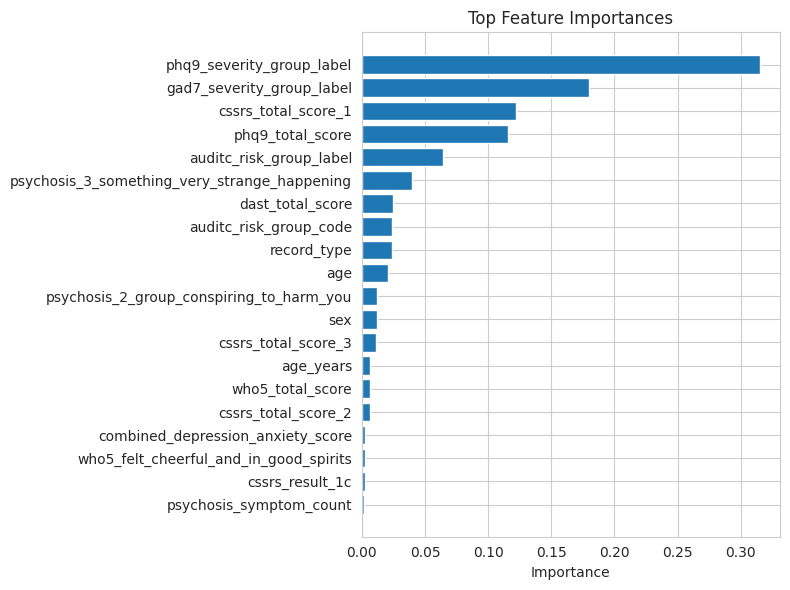

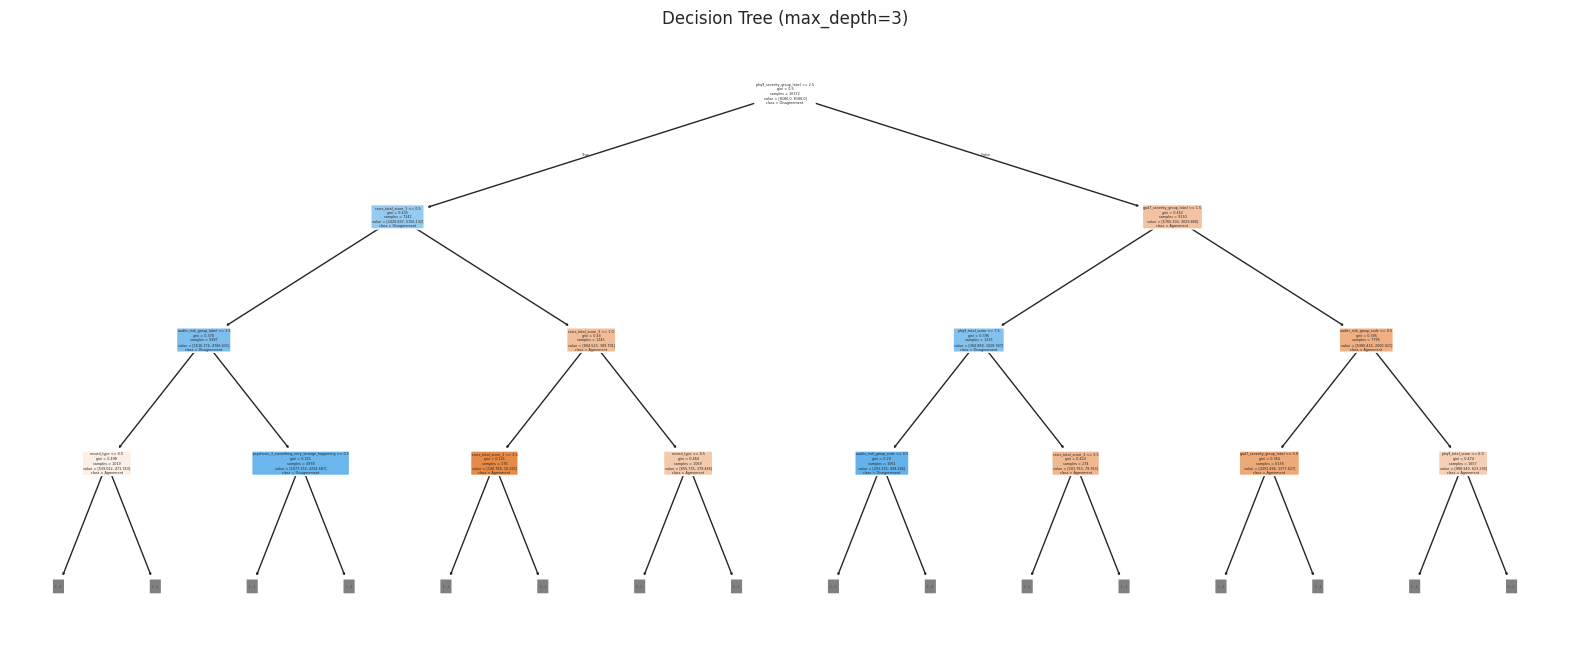

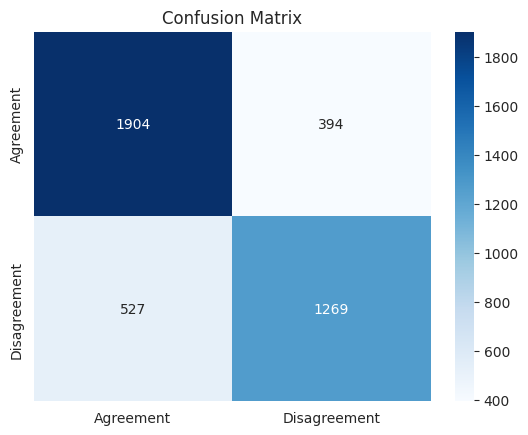

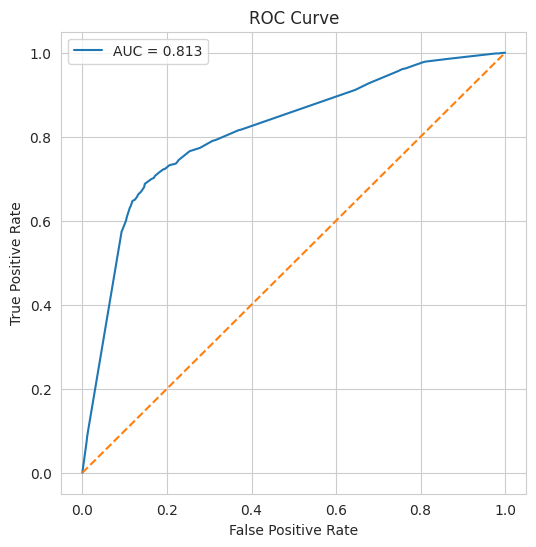

In [ ]:
viz = ModelVisualizer(
    model=model.model,
    feature_names=feature_names
)

viz.plot_feature_importance(top_n=20)
viz.plot_decision_tree(max_depth=3)

y_pred = model.model.predict(X_test)
y_proba = model.model.predict_proba(X_test)[:, 1]

viz.plot_confusion_matrix(y_test, y_pred)
viz.plot_roc_curve(y_test, y_proba)


### Ablation studies

In [ ]:
# Install statsmodels for McNemar's test (if not already installed)
try:
    from statsmodels.stats.contingency_tables import mcnemar
    HAS_STATSMODELS = True
    print("✓ statsmodels already installed")
except ImportError:
    print("Installing statsmodels...")
    !pip install -q statsmodels
    from statsmodels.stats.contingency_tables import mcnemar
    HAS_STATSMODELS = True
    print("✓ statsmodels installed successfully")

In [ ]:
# AblationConfig: Define feature groups and experiments for ablation study
from typing import Dict, List, Set
from dataclasses import dataclass

@dataclass
class FeatureGroup:
    """Represents a group of related features for ablation analysis"""
    name: str
    description: str
    features: List[str]
    category: str

class AblationConfig:
    """Configuration for ablation study experiments"""
    
    def __init__(self):
        self.semantic_groups = self._define_semantic_groups()
        self.strategic_experiments = self._define_strategic_experiments()
    
    def _define_semantic_groups(self) -> Dict[str, FeatureGroup]:
        """Define semantic feature groups based on clinical/administrative meaning"""
        groups = {}
        
        # Core Clinical Groups
        groups["depression"] = FeatureGroup(
            name="depression",
            description="Depression assessment (PHQ-9)",
            category="semantic",
            features=[
                "phq9_total_score", "phq9_severity_group_code", "phq9_severity_group_label",
                "phq9_computed_total", "phq9_1", "phq9_2", "phq9_3", "phq9_4",
                "phq9_5", "phq9_6", "phq9_7", "phq9_8", "phq9_9"
            ]
        )
        
        groups["anxiety"] = FeatureGroup(
            name="anxiety",
            description="Anxiety assessment (GAD-7)",
            category="semantic",
            features=[
                "gad7_total_score", "gad7_severity_group_code", "gad7_severity_group_label",
                "gad7_computed_total", "gad7_1", "gad7_2", "gad7_3", "gad7_4",
                "gad7_5", "gad7_6", "gad7_7"
            ]
        )
        
        groups["suicide_risk"] = FeatureGroup(
            name="suicide_risk",
            description="Suicide risk assessment (C-SSRS)",
            category="semantic",
            features=[
                "cssrs_total_score_1", "cssrs_total_score_2", "cssrs_total_score_3",
                "cssrs_group_2a_code", "cssrs_group_2a_label", "cssrs_group_2b_code",
                "cssrs_group_2b_label", "cssrs_group_2c_code", "cssrs_group_2c_label",
                "cssrs_group_2d_code", "cssrs_group_2d_label",
                "cssrs_wish_to_be_dead", "cssrs_non_specific_active_suicidal_ideation",
                "cssrs_active_ideation_with_plan_or_methods", "cssrs_active_ideation_with_intent",
                "cssrs_active_ideation_with_specific_plan", "cssrs_suicidal_behavior",
                "cssrs_suicidal_behavior_last_3_months", "cssrs_result_1a",
                "cssrs_result_1b", "cssrs_result_1c", "cssrs_result_1d"
            ]
        )
        
        groups["substance_use"] = FeatureGroup(
            name="substance_use",
            description="Substance use (AUDIT-C + DAST)",
            category="semantic",
            features=[
                "auditc_total_score", "auditc_risk_group_code", "auditc_risk_group_label",
                "auditc_1_frequency_of_drinking", "auditc_2_drinks_on_typical_drinking_day",
                "auditc_3_frequency_six_or_more_drinks",
                "dast_total_score", "dast_1", "dast_2", "dast_3", "dast_4"
            ]
        )
        
        groups["psychosis"] = FeatureGroup(
            name="psychosis",
            description="Psychosis symptoms screening",
            category="semantic",
            features=[
                "psychosis_1_thoughts_being_interfered_with_or_controlled",
                "psychosis_2_group_conspiring_to_harm_you",
                "psychosis_3_something_very_strange_happening",
                "psychosis_4_heard_voices_with_no_one_there",
                "psychosis_symptom_count"
            ]
        )
        
        groups["wellbeing_other"] = FeatureGroup(
            name="wellbeing_other",
            description="Well-being, self-harm, medication",
            category="semantic",
            features=[
                "who5_total_score", "who5_cheerful", "who5_calm", "who5_active",
                "who5_fresh", "who5_daily_life",
                "nssi_ever_intentional_self_injury_without_suicidal_intent",
                "nssi_last_month_frequency",
                "current_psychotropic_medication", "current_smoker", "cigarettes_per_day"
            ]
        )
        
        # Administrative & Contextual Groups
        groups["administrative"] = FeatureGroup(
            name="administrative",
            description="Administrative/service features",
            category="semantic",
            features=[
                "center_id", "center_id_2", "patient_id_2", "service",
                "care_circuit", "response_type", "evaluating_user",
                "requesting_service", "requesting_service_2", "form_status"
            ]
        )
        
        groups["demographics"] = FeatureGroup(
            name="demographics",
            description="Age, sex, location, pregnancy",
            category="semantic",
            features=[
                "age", "sex", "sex_2", "location_of_birth",
                "location_of_birth_2", "date_of_birth_2", "is_pregnant_woman"
            ]
        )
        
        groups["temporal"] = FeatureGroup(
            name="temporal",
            description="Time delays between events",
            category="semantic",
            features=[
                "days_request_to_assessment", "days_assessment_to_evaluation",
                "days_request_to_publication", "completion_date",
                "results_date", "evaluation_date"
            ]
        )
        
        groups["personality"] = FeatureGroup(
            name="personality",
            description="Big Five personality traits (BFI-10)",
            category="semantic",
            features=[
                "bfi10_extraverted_enthusiastic", "bfi10_critical_quarrelsome",
                "bfi10_dependable_self_disciplined", "bfi10_anxious_easily_upset",
                "bfi10_open_to_new_experiences_and_ideas", "bfi10_reserved_quiet",
                "bfi10_sympathetic_warm", "bfi10_disorganized_careless",
                "bfi10_calm_emotionally_stable", "bfi10_prefers_traditional_less_creative",
                "bfi10_total_score", "bfi10_extraversion_score", "bfi10_agreeableness_score",
                "bfi10_conscientiousness_score", "bfi10_emotional_stability_score",
                "bfi10_openness_to_experience_score"
            ]
        )
        
        return groups
    
    def _define_strategic_experiments(self) -> Dict[str, Dict]:
        """Define strategic ablation experiments - subset with compound experiments"""
        experiments = {}
        
        # Baseline (all features)
        experiments["baseline"] = {
            "description": "Baseline with all features",
            "include_groups": None,
            "exclude_groups": []
        }
        
        # Compound: Remove all non-clinical features
        experiments["clinical_only"] = {
            "description": "Only clinical features (remove admin, demographics, temporal)",
            "include_groups": ["depression", "anxiety", "suicide_risk", "substance_use",
                             "psychosis", "wellbeing_other", "personality"],
            "exclude_groups": ["administrative", "demographics", "temporal"]
        }
        
        # Compound: Core mental health only
        experiments["core_clinical"] = {
            "description": "Only PHQ-9, GAD-7, and C-SSRS",
            "include_groups": ["depression", "anxiety", "suicide_risk"],
            "exclude_groups": []
        }
        
        # Compound: Remove potentially leaky administrative features
        experiments["no_administrative"] = {
            "description": "Remove administrative features (service, evaluating_user, etc.)",
            "include_groups": None,
            "exclude_groups": ["administrative"]
        }
        
        # Compound: Remove temporal and administrative (cleanest dataset)
        experiments["clean_clinical"] = {
            "description": "Remove temporal delays and administrative features",
            "include_groups": None,
            "exclude_groups": ["administrative", "temporal"]
        }
        
        # Leave-one-out: Remove depression
        experiments["no_depression"] = {
            "description": "Leave-one-out: Remove depression features",
            "include_groups": None,
            "exclude_groups": ["depression"]
        }
        
        # Leave-one-out: Remove anxiety
        experiments["no_anxiety"] = {
            "description": "Leave-one-out: Remove anxiety features",
            "include_groups": None,
            "exclude_groups": ["anxiety"]
        }
        
        # Leave-one-out: Remove suicide risk
        experiments["no_suicide_risk"] = {
            "description": "Leave-one-out: Remove suicide risk features",
            "include_groups": None,
            "exclude_groups": ["suicide_risk"]
        }
        
        return experiments
    
    def get_all_features_in_group(self, group_name: str) -> List[str]:
        """Get all feature names in a semantic group"""
        if group_name in self.semantic_groups:
            return self.semantic_groups[group_name].features
        else:
            raise ValueError(f"Unknown feature group: {group_name}")
    
    def get_all_features_in_groups(self, group_names: List[str]) -> Set[str]:
        """Get union of all features in specified groups"""
        all_features = set()
        for group_name in group_names:
            all_features.update(self.get_all_features_in_group(group_name))
        return all_features
    
    def get_features_for_experiment(self, experiment_name: str, all_available_features: List[str]) -> List[str]:
        """Get feature list for a specific experiment"""
        if experiment_name not in self.strategic_experiments:
            raise ValueError(f"Unknown experiment: {experiment_name}")
        
        exp_config = self.strategic_experiments[experiment_name]
        
        # Handle include_groups
        if exp_config["include_groups"] is not None:
            # Only include specified groups
            selected_features = self.get_all_features_in_groups(exp_config["include_groups"])
        else:
            # Start with all features
            selected_features = set(all_available_features)
        
        # Handle exclude_groups
        if exp_config["exclude_groups"]:
            excluded_features = self.get_all_features_in_groups(exp_config["exclude_groups"])
            selected_features = selected_features - excluded_features
        
        # Filter to only features that exist in the dataset
        selected_features = [f for f in selected_features if f in all_available_features]
        
        return selected_features
    
    def get_all_experiment_names(self) -> List[str]:
        """Get all experiment names"""
        return list(self.strategic_experiments.keys())

print("✓ AblationConfig class defined")

In [ ]:
# AblationStudy: Manages ablation experiments with baseline hyperparameters
import numpy as np
from datetime import datetime
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

class AblationStudy:
    """Manages ablation study experiments (sequential execution only)"""
    
    def __init__(self, ablation_config: AblationConfig, run_mcnemar_test: bool = True, 
                 mcnemar_alpha: float = 0.05, verbose: int = 1, save_results: bool = False,
                 output_dir: str = "results/ablation"):
        self.ablation_config = ablation_config
        self.run_mcnemar_test = run_mcnemar_test
        self.mcnemar_alpha = mcnemar_alpha
        self.verbose = verbose
        self.save_results = save_results
        self.output_dir = output_dir
        
        self.results = {}
        self.baseline_params = None
        self.baseline_predictions = None
        self.baseline_metrics = None
        
        if save_results:
            from pathlib import Path
            Path(output_dir).mkdir(parents=True, exist_ok=True)
    
    def run_baseline(self, X_train, y_train, X_test, y_test, feature_names):
        """Run baseline model with SMAC3 optimization"""
        if self.verbose > 0:
            print("\n" + "=" * 80)
            print("BASELINE MODEL (Full Feature Set)")
            print("=" * 80)
            print(f"Number of features: {len(feature_names)}")
            print(f"Training samples: {len(X_train)}, Test samples: {len(X_test)}")
        
        # Initialize and optimize model (reusing existing DisagreementModel)
        model_config = ModelConfig(
            use_smac=True,
            smac_n_trials=50,
            smac_time_limit=300,
            verbose=1
        )
        model = DisagreementModel(model_config)
        
        # Run SMAC3 optimization
        best_params = model.optimize_hyperparameters(X_train, y_train)
        
        # Train final model
        model.train_final_model(X_train, y_train, feature_names)
        
        # Evaluate
        metrics = model.evaluate(X_test, y_test)
        
        # Get predictions for McNemar's test
        y_pred = model.model.predict(X_test)
        y_pred_proba = model.model.predict_proba(X_test)[:, 1]
        
        # Store baseline info
        self.baseline_params = best_params
        self.baseline_predictions = {
            "y_true": y_test.values if hasattr(y_test, 'values') else y_test,
            "y_pred": y_pred,
            "y_pred_proba": y_pred_proba
        }
        self.baseline_metrics = metrics
        
        # Get feature importance
        feature_importance = model.get_feature_importance()
        
        result = {
            "experiment": "baseline",
            "n_features": len(feature_names),
            "features": feature_names,
            "best_params": best_params,
            "cv_score": model.cv_score,
            "test_metrics": metrics,
            "tree_depth": model.model.get_depth(),
            "tree_leaves": model.model.get_n_leaves(),
            "feature_importance": feature_importance.to_dict("records")
        }
        
        if self.verbose > 0:
            print(f"\n✓ Baseline Results:")
            print(f"  Accuracy:  {metrics['accuracy']:.4f}")
            print(f"  F1-Score:  {metrics['f1']:.4f}")
            print(f"  ROC-AUC:   {metrics['roc_auc']:.4f}")
            print(f"  Tree depth: {result['tree_depth']}, Leaves: {result['tree_leaves']}")
        
        self.results["baseline"] = result
        return result
    
    def run_single_ablation(self, experiment_name, X_train, y_train, X_test, y_test, 
                           all_feature_names, hyperparameters):
        """Run a single ablation experiment with given hyperparameters"""
        try:
            # Get features for this experiment
            selected_features = self.ablation_config.get_features_for_experiment(
                experiment_name, all_feature_names
            )
            
            if self.verbose > 0:
                print(f"\n{'=' * 80}")
                print(f"EXPERIMENT: {experiment_name}")
                print(f"{'=' * 80}")
                print(f"Features: {len(selected_features)} / {len(all_feature_names)}")
                print(f"Removed: {len(all_feature_names) - len(selected_features)}")
            
            # Filter datasets to selected features
            X_train_filtered = X_train[selected_features]
            X_test_filtered = X_test[selected_features]
            
            # Create model with baseline hyperparameters
            model = DecisionTreeClassifier(**hyperparameters)
            
            # Train model
            model.fit(X_train_filtered, y_train)
            
            # Predictions
            y_pred = model.predict(X_test_filtered)
            y_pred_proba = model.predict_proba(X_test_filtered)[:, 1]
            
            # Calculate metrics
            metrics = {
                "accuracy": accuracy_score(y_test, y_pred),
                "precision": precision_score(y_test, y_pred, zero_division=0),
                "recall": recall_score(y_test, y_pred, zero_division=0),
                "f1": f1_score(y_test, y_pred, zero_division=0),
                "roc_auc": roc_auc_score(y_test, y_pred_proba)
            }
            
            # Calculate performance delta from baseline
            metrics_delta = {}
            if self.baseline_metrics:
                for metric_name, value in metrics.items():
                    baseline_value = self.baseline_metrics[metric_name]
                    metrics_delta[f"{metric_name}_delta"] = value - baseline_value
            
            # McNemar's test
            mcnemar_result = None
            if self.run_mcnemar_test and self.baseline_predictions is not None:
                mcnemar_result = self._compute_mcnemar_test(
                    self.baseline_predictions["y_true"],
                    self.baseline_predictions["y_pred"],
                    y_pred
                )
            
            # Feature importance
            importances = model.feature_importances_
            feature_importance = pd.DataFrame({
                "feature": selected_features,
                "importance": importances
            }).sort_values("importance", ascending=False)
            
            # Compile results
            result = {
                "experiment": experiment_name,
                "description": self.ablation_config.strategic_experiments[experiment_name]["description"],
                "n_features": len(selected_features),
                "features_removed_count": len(all_feature_names) - len(selected_features),
                "test_metrics": metrics,
                "metrics_delta": metrics_delta,
                "tree_depth": model.get_depth(),
                "tree_leaves": model.get_n_leaves(),
                "feature_importance_top10": feature_importance.head(10).to_dict("records"),
                "mcnemar_test": mcnemar_result
            }
            
            if self.verbose > 0:
                print(f"\nResults:")
                print(f"  Accuracy:  {metrics['accuracy']:.4f} (Δ {metrics_delta.get('accuracy_delta', 0):+.4f})")
                print(f"  F1-Score:  {metrics['f1']:.4f} (Δ {metrics_delta.get('f1_delta', 0):+.4f})")
                print(f"  ROC-AUC:   {metrics['roc_auc']:.4f} (Δ {metrics_delta.get('roc_auc_delta', 0):+.4f})")
                
                if mcnemar_result:
                    sig_marker = " ***" if mcnemar_result["significant"] else ""
                    print(f"  McNemar p: {mcnemar_result['pvalue']:.4f}{sig_marker}")
            
            return result
            
        except Exception as e:
            print(f"\n✗ ERROR in '{experiment_name}': {str(e)}")
            import traceback
            traceback.print_exc()
            return {"experiment": experiment_name, "error": str(e)}
    
    def _compute_mcnemar_test(self, y_true, y_pred_baseline, y_pred_ablation):
        """Compute McNemar's test to compare two models' predictions"""
        baseline_correct = y_pred_baseline == y_true
        ablation_correct = y_pred_ablation == y_true
        
        # McNemar's contingency table
        n11 = np.sum(baseline_correct & ablation_correct)
        n12 = np.sum(baseline_correct & ~ablation_correct)
        n21 = np.sum(~baseline_correct & ablation_correct)
        n22 = np.sum(~baseline_correct & ~ablation_correct)
        
        contingency_table = np.array([[n11, n12], [n21, n22]])
        
        # Perform McNemar's test
        if HAS_STATSMODELS:
            result = mcnemar(contingency_table, exact=True if (n12 + n21) < 25 else False)
        else:
            # Fallback: simple binomial test
            from scipy.stats import binom
            n = n12 + n21
            if n == 0:
                pvalue, statistic = 1.0, 0.0
            else:
                k = min(n12, n21)
                pvalue = 2 * binom.cdf(k, n, 0.5)
                pvalue = min(pvalue, 1.0)
                statistic = (n12 - n21) ** 2 / (n12 + n21) if (n12 + n21) > 0 else 0
            
            class Result:
                pass
            result = Result()
            result.statistic = statistic
            result.pvalue = pvalue
        
        return {
            "statistic": float(result.statistic),
            "pvalue": float(result.pvalue),
            "significant": result.pvalue < self.mcnemar_alpha,
            "alpha": self.mcnemar_alpha,
            "contingency_table": {
                "both_correct": int(n11),
                "baseline_correct_ablation_wrong": int(n12),
                "baseline_wrong_ablation_correct": int(n21),
                "both_wrong": int(n22)
            }
        }
    
    def run_ablation_experiments(self, X_train, y_train, X_test, y_test, feature_names, 
                                experiment_names=None):
        """Run all ablation experiments sequentially"""
        if self.baseline_params is None:
            raise ValueError("Must run baseline first to get hyperparameters")
        
        # Get experiment names to run (exclude baseline)
        if experiment_names is None:
            experiment_names = [e for e in self.ablation_config.get_all_experiment_names() 
                              if e != "baseline"]
        
        if self.verbose > 0:
            print("\n" + "=" * 80)
            print(f"RUNNING {len(experiment_names)} ABLATION EXPERIMENTS")
            print("=" * 80)
        
        results = {}
        for i, exp_name in enumerate(experiment_names, 1):
            if self.verbose > 0:
                print(f"\n[{i}/{len(experiment_names)}]", end=" ")
            
            result = self.run_single_ablation(
                exp_name, X_train, y_train, X_test, y_test,
                feature_names, self.baseline_params
            )
            results[exp_name] = result
        
        self.results.update(results)
        return results
    
    def compare_results(self):
        """Create comparison table of all experiments"""
        comparison_data = []
        
        for exp_name, result in self.results.items():
            if "error" in result:
                continue
            
            row = {
                "experiment": exp_name,
                "description": result.get("description", "Baseline"),
                "n_features": result["n_features"],
                "accuracy": result["test_metrics"]["accuracy"],
                "f1": result["test_metrics"]["f1"],
                "roc_auc": result["test_metrics"]["roc_auc"]
            }
            
            # Add deltas if available
            if "metrics_delta" in result:
                row["f1_delta"] = result["metrics_delta"].get("f1_delta", 0)
                row["roc_auc_delta"] = result["metrics_delta"].get("roc_auc_delta", 0)
            
            # Add McNemar's test p-value if available
            if result.get("mcnemar_test"):
                row["mcnemar_p"] = result["mcnemar_test"]["pvalue"]
                row["significant"] = "***" if result["mcnemar_test"]["significant"] else ""
            
            comparison_data.append(row)
        
        df = pd.DataFrame(comparison_data)
        
        # Sort by F1 score descending
        if "f1" in df.columns:
            df = df.sort_values("f1", ascending=False)
        
        return df

print("✓ AblationStudy class defined")

In [ ]:
# Run all ablation experiments
# This will test each experiment configuration using the baseline hyperparameters

ablation_results = ablation_study.run_ablation_experiments(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    feature_names=feature_names
)

print("\n" + "=" * 80)
print("ABLATION STUDY COMPLETE")
print("=" * 80)

In [ ]:
# Feature importance comparison: Baseline vs Clinical-Only
print("=" * 80)
print("FEATURE IMPORTANCE ANALYSIS")
print("=" * 80)

# Compare top features in baseline vs clinical_only experiment
if 'baseline' in ablation_study.results and 'clinical_only' in ablation_study.results:
    baseline_fi = pd.DataFrame(ablation_study.results['baseline']['feature_importance'])
    clinical_fi = pd.DataFrame(ablation_study.results['clinical_only']['feature_importance_top10'])
    
    print("\n📊 Top 10 Features - Baseline (All Features):")
    print("-" * 80)
    for i, row in baseline_fi.head(10).iterrows():
        print(f"  {i+1:2d}. {row['feature'][:50]:<50s} {row['importance']:.4f}")
    
    print("\n📊 Top 10 Features - Clinical Only:")
    print("-" * 80)
    for i, row in clinical_fi.iterrows():
        print(f"  {i+1:2d}. {row['feature'][:50]:<50s} {row['importance']:.4f}")
    
    # Identify features that appear in both
    baseline_top = set(baseline_fi.head(10)['feature'])
    clinical_top = set(clinical_fi['feature'])
    common = baseline_top & clinical_top
    
    print(f"\n✓ Common features in top-10: {len(common)}")
    for feat in common:
        baseline_imp = baseline_fi[baseline_fi['feature'] == feat]['importance'].values[0]
        clinical_imp = clinical_fi[clinical_fi['feature'] == feat]['importance'].values[0]
        print(f"  • {feat[:50]:<50s} Baseline: {baseline_imp:.4f}, Clinical: {clinical_imp:.4f}")
else:
    print("\nℹ️  Run baseline and clinical_only experiments first")

In [ ]:
# Optional: Save results to files
# Uncomment to save ablation study results

# import json
# from pathlib import Path
# 
# output_dir = Path("results/ablation")
# output_dir.mkdir(parents=True, exist_ok=True)
# 
# # Save comparison table
# comparison_df.to_csv(output_dir / "ablation_comparison.csv", index=False)
# print(f"✓ Saved comparison table to {output_dir / 'ablation_comparison.csv'}")
# 
# # Save full results
# with open(output_dir / "ablation_full_results.json", "w") as f:
#     # Convert to JSON-serializable format
#     results_json = {}
#     for exp_name, result in ablation_study.results.items():
#         if "error" not in result:
#             results_json[exp_name] = {
#                 "description": result.get("description", ""),
#                 "n_features": result["n_features"],
#                 "test_metrics": result["test_metrics"],
#                 "metrics_delta": result.get("metrics_delta", {}),
#                 "mcnemar_test": result.get("mcnemar_test", {})
#             }
#     json.dump(results_json, f, indent=2)
# print(f"✓ Saved full results to {output_dir / 'ablation_full_results.json'}")

print("ℹ️  To save results, uncomment the code above")

#### Ablation Study Interpretation

**What is an ablation study?**
An ablation study systematically removes features or feature groups to understand their contribution to model performance. By using the same hyperparameters from the baseline model, we isolate the impact of features rather than optimization effects.

**Key experiments:**
- **Baseline**: All features included (establishes optimal hyperparameters via SMAC3)
- **Clinical Only**: Removes administrative, demographics, and temporal features
- **Core Clinical**: Only PHQ-9, GAD-7, and C-SSRS (minimal feature set)
- **Clean Clinical**: Removes temporal delays and administrative features (potentially leaky)
- **Leave-one-out**: Removes each clinical domain individually to assess importance

**McNemar's Test**: Statistical test comparing predictions between baseline and ablation models. A significant p-value (< 0.05) indicates the models make different errors, suggesting the removed features matter.

**Insights to look for:**
1. **Feature importance**: Which feature groups contribute most to performance?
2. **Minimal viable set**: Can we achieve similar performance with fewer features?
3. **Leakage detection**: Do administrative/temporal features provide unfair advantages?
4. **Clinical domains**: Which mental health assessments are most critical for disagreement prediction?

In [ ]:
# Visualize ablation results
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. F1-Score by experiment
ax = axes[0, 0]
exp_order = comparison_df.sort_values('f1', ascending=True)
colors = ['red' if x == 'baseline' else 'steelblue' for x in exp_order['experiment']]
ax.barh(exp_order['experiment'], exp_order['f1'], color=colors, alpha=0.7)
ax.axvline(comparison_df[comparison_df['experiment'] == 'baseline']['f1'].values[0], 
           color='red', linestyle='--', linewidth=2, label='Baseline')
ax.set_xlabel('F1-Score', fontsize=12)
ax.set_title('F1-Score by Experiment', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(axis='x', alpha=0.3)

# 2. F1 Delta from baseline
ax = axes[0, 1]
if 'f1_delta' in comparison_df.columns:
    delta_order = comparison_df[comparison_df['experiment'] != 'baseline'].sort_values('f1_delta')
    colors = ['green' if x > 0 else 'red' for x in delta_order['f1_delta']]
    ax.barh(delta_order['experiment'], delta_order['f1_delta'], color=colors, alpha=0.7)
    ax.axvline(0, color='black', linestyle='-', linewidth=1)
    ax.set_xlabel('F1-Score Change from Baseline', fontsize=12)
    ax.set_title('Performance Delta (F1-Score)', fontsize=14, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)

# 3. ROC-AUC by experiment
ax = axes[1, 0]
roc_order = comparison_df.sort_values('roc_auc', ascending=True)
colors = ['red' if x == 'baseline' else 'darkorange' for x in roc_order['experiment']]
ax.barh(roc_order['experiment'], roc_order['roc_auc'], color=colors, alpha=0.7)
ax.axvline(comparison_df[comparison_df['experiment'] == 'baseline']['roc_auc'].values[0],
           color='red', linestyle='--', linewidth=2, label='Baseline')
ax.set_xlabel('ROC-AUC', fontsize=12)
ax.set_title('ROC-AUC by Experiment', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(axis='x', alpha=0.3)

# 4. Number of features vs F1-Score
ax = axes[1, 1]
scatter_data = comparison_df[comparison_df['experiment'] != 'baseline']
ax.scatter(scatter_data['n_features'], scatter_data['f1'], 
          s=150, alpha=0.6, c='steelblue', edgecolors='black', linewidth=1.5)
# Add baseline as red star
baseline_row = comparison_df[comparison_df['experiment'] == 'baseline'].iloc[0]
ax.scatter(baseline_row['n_features'], baseline_row['f1'], 
          s=300, alpha=0.8, c='red', marker='*', edgecolors='black', 
          linewidth=1.5, label='Baseline')
# Annotate points
for idx, row in comparison_df.iterrows():
    if row['experiment'] != 'baseline':
        ax.annotate(row['experiment'], 
                   (row['n_features'], row['f1']),
                   fontsize=8, alpha=0.7, 
                   xytext=(5, 5), textcoords='offset points')
ax.set_xlabel('Number of Features', fontsize=12)
ax.set_ylabel('F1-Score', fontsize=12)
ax.set_title('Features vs Performance Trade-off', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Ablation study visualizations generated")

In [ ]:
# Display comparison table
comparison_df = ablation_study.compare_results()

print("\nABLATION STUDY RESULTS SUMMARY")
print("=" * 80)
display(comparison_df)

# Highlight key findings
print("\n" + "=" * 80)
print("KEY FINDINGS")
print("=" * 80)

# Best performing experiment
best_exp = comparison_df.iloc[0]
print(f"\n✓ Best F1-Score: {best_exp['experiment']}")
print(f"  F1: {best_exp['f1']:.4f}, Features: {best_exp['n_features']}")
print(f"  Description: {best_exp['description']}")

# Most significant changes
if 'mcnemar_p' in comparison_df.columns:
    sig_changes = comparison_df[comparison_df['significant'] == '***']
    if len(sig_changes) > 0:
        print(f"\n✓ Statistically significant changes from baseline: {len(sig_changes)}")
        for idx, row in sig_changes.iterrows():
            print(f"  • {row['experiment']}: F1Δ={row['f1_delta']:+.4f}, p={row['mcnemar_p']:.4f}")

# Largest performance drops
if 'f1_delta' in comparison_df.columns:
    largest_drops = comparison_df.nsmallest(3, 'f1_delta')
    print(f"\n✓ Experiments with largest F1 drops:")
    for idx, row in largest_drops.iterrows():
        if row['experiment'] != 'baseline':
            print(f"  • {row['experiment']}: {row['f1_delta']:+.4f} ({row['n_features']} features)")

In [ ]:
# Run baseline model with SMAC3 optimization
# This establishes hyperparameters that will be reused for all ablation experiments

# Prepare data (reusing existing train/test split)
# Note: Make sure X_train, y_train, X_test, y_test are already defined in the notebook
feature_names = X_train.columns.tolist()

# Run baseline
baseline_result = ablation_study.run_baseline(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    feature_names=feature_names
)

In [ ]:
# Configure and run ablation study
print("=" * 80)
print("ABLATION STUDY CONFIGURATION")
print("=" * 80)

# Initialize ablation configuration
ablation_config = AblationConfig()

# Display experiments that will be run
experiments = ablation_config.get_all_experiment_names()
print(f"\nExperiments to run: {len(experiments)}")
for exp_name in experiments:
    exp_info = ablation_config.strategic_experiments[exp_name]
    print(f"  • {exp_name}: {exp_info['description']}")

# Initialize ablation study
ablation_study = AblationStudy(
    ablation_config=ablation_config,
    run_mcnemar_test=True,      # Compare models statistically
    mcnemar_alpha=0.05,          # Significance threshold
    verbose=1,                   # Print progress
    save_results=False           # Optional: set to True to save CSV/JSON files
)

print("\n✓ Ablation study configured and ready to run")

### Conclusion

## Step 3: Predictive modeling

Finally two prediction models are trained to try and beat the current prediction of the baseline algorithm.

### Train more advanced model: XGBoost

Here a more advanced model is trained. For this XGBoost is used as it is well suited for larged structured data with mixed datatypes. It is expected to produce more accurate predictions then the simple model.

In [ ]:
!pip install xgboost

In [ ]:
df = df_merged
#df = pd.read_csv("merged.csv")

#pd.set_option('display.max_rows', None)  # Show all rows
#pd.set_option('display.max_columns', None)  # Show all columns

#print(list(df.columns))
df

,center_id,patient_id,date_of_birth,sex,death_status,location_of_birth,assessment_date,episode_date,request_date,publication_date,report_date,record_status,requesting_service,response_type,who5_felt_cheerful_and_in_good_spirits,who5_felt_calm_and_relaxed,who5_felt_active_and_vigorous,who5_woke_up_feeling_fresh_and_restored,who5_daily_life_filled_with_things_that_interest_me,current_psychotropic_medication,who5_total_score,phq9_1_little_interest_or_pleasure,phq9_2_feeling_down_depressed_or_hopeless,phq9_3_trouble_sleeping,phq9_4_feeling_tired_or_little_energy,phq9_5_poor_appetite_or_overeating,phq9_6_feeling_bad_about_yourself,phq9_7_trouble_concentrating,phq9_8_moving_or_speaking_slowly_or_restless,phq9_9_thoughts_better_off_dead_or_self_harm,phq9_total_score,phq9_severity_group_code,phq9_severity_group_label,gad7_1_feeling_nervous_anxious_or_on_edge,gad7_2_not_being_able_to_stop_or_control_worrying,gad7_3_worrying_too_much_about_different_things,gad7_4_trouble_relaxing,gad7_5_so_restless_that_its_hard_to_sit_still,gad7_6_becoming_easily_annoyed_or_irritable,gad7_7_feeling_afraid_as_if_something_awful_might_happen,gad7_total_score,gad7_severity_group_code,gad7_severity_group_label,dast_1_used_drugs_not_required_for_medical_reasons,dast_2_abuse_more_than_one_drug_at_a_time,dast_3_neglected_family_due_to_drug_use,dast_4_frequency_illegal_or_unprescribed_drug_use,current_smoker,cigarettes_per_day,dast_total_score,dast_severity_group_code,dast_severity_group_label,auditc_1_frequency_of_drinking,auditc_2_drinks_on_typical_drinking_day,auditc_3_frequency_six_or_more_drinks,auditc_total_score,auditc_risk_group_code,auditc_risk_group_label,cssrs_wish_to_be_dead,cssrs_non_specific_active_suicidal_ideation,cssrs_active_ideation_with_plan_or_methods,cssrs_active_ideation_with_intent,cssrs_active_ideation_with_specific_plan,cssrs_suicidal_behavior,cssrs_suicidal_behavior_last_3_months,cssrs_total_score_1,cssrs_total_score_2,cssrs_total_score_3,cssrs_result_1a,cssrs_group_2a_code,cssrs_group_2a_label,cssrs_result_1b,cssrs_group_2b_code,cssrs_group_2b_label,cssrs_result_1c,cssrs_group_2c_code,cssrs_group_2c_label,cssrs_result_1d,cssrs_group_2d_code,cssrs_group_2d_label,nssi_ever_intentional_self_injury_without_suicidal_intent,nssi_last_month_frequency,bfi10_extraverted_enthusiastic,bfi10_critical_quarrelsome,bfi10_dependable_self_disciplined,bfi10_anxious_easily_upset,bfi10_open_to_new_experiences_and_ideas,bfi10_reserved_quiet,bfi10_sympathetic_warm,bfi10_disorganized_careless,bfi10_calm_emotionally_stable,bfi10_prefers_traditional_less_creative,bfi10_total_score,bfi10_extraversion_score,bfi10_agreeableness_score,bfi10_agreeableness_interpretation,bfi10_conscientiousness_score,bfi10_conscientiousness_interpretation,bfi10_emotional_stability_score,bfi10_emotional_stability_interpretation,bfi10_openness_to_experience_score,bfi10_openness_to_experience_interpretation,psychosis_1_thoughts_being_interfered_with_or_controlled,psychosis_2_group_conspiring_to_harm_you,psychosis_3_something_very_strange_happening,psychosis_4_heard_voices_with_no_one_there,risk_assessment_algorithm,risk_assessment_psychiatrist,entry_number,patient_id_2,center_id_2,date_of_birth_2,sex_2,location_of_birth_2,death_status_2,from_date,to_date,service,form_status,publishing_application,record_type,is_pregnant_woman,requesting_service_2,status,package_evaluated,evaluating_user,stratification_algorithm_raw,referral,care_circuit,risk_assessment_algorithm_2,professional_recommendation,algorithm_recommendation,professional_recommendation_clinician,algorithm_professional_agreement,completion_date,results_date,evaluation_date,location_of_birth_group,age_years
0,FJD,3353,1971-04-02,Male,No,Madrid,2025-04-24 08:42:17,2025-10-23 09:30:00,NaT,2025-04-24,NaT,NaN,NaN,Patient,2.0,2.0,2.0,1.0,2.0,1.0,36.0,2.0,1.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0,20.0,PHQ-9_D,Moderately severe depressive symptoms,2.0,2.0,2.0,3.0,1.0,2.0,1.0,13.0,GAD-7_C,Moderate anxiety symptoms,0.0,0.0,0.0,0.0,0.0,NaN,0.0,DA

In [ ]:
#columns to not consider
drop_cols = [
 'Unnamed: 0',
 'center_id',
 'patient_id',
# 'date_of_birth',
# 'sex',
# 'death_status',
# 'location_of_birth',
 'assessment_date',
 'episode_date',
 'request_date',
 'publication_date',
 'report_date',
 'record_status',
# 'requesting_service',
 'response_type',
# 'who5_felt_cheerful_and_in_good_spirits',
# 'who5_felt_calm_and_relaxed',
# 'who5_felt_active_and_vigorous',
# 'who5_woke_up_feeling_fresh_and_restored',
# 'who5_daily_life_filled_with_things_that_interest_me',
# 'current_psychotropic_medication',
# 'who5_total_score',
# 'phq9_1_little_interest_or_pleasure',
# 'phq9_2_feeling_down_depressed_or_hopeless',
# 'phq9_3_trouble_sleeping',
# 'phq9_4_feeling_tired_or_little_energy',
# 'phq9_5_poor_appetite_or_overeating',
# 'phq9_6_feeling_bad_about_yourself',
# 'phq9_7_trouble_concentrating',
# 'phq9_8_moving_or_speaking_slowly_or_restless',
# 'phq9_9_thoughts_better_off_dead_or_self_harm',
# 'phq9_total_score',
# 'phq9_severity_group_code',
# 'phq9_severity_group_label',
# 'gad7_1_feeling_nervous_anxious_or_on_edge',
# 'gad7_2_not_being_able_to_stop_or_control_worrying',
# 'gad7_3_worrying_too_much_about_different_things',
# 'gad7_4_trouble_relaxing',
# 'gad7_5_so_restless_that_its_hard_to_sit_still',
# 'gad7_6_becoming_easily_annoyed_or_irritable',
# 'gad7_7_feeling_afraid_as_if_something_awful_might_happen',
# 'gad7_total_score',
# 'gad7_severity_group_code',
# 'gad7_severity_group_label',
# 'dast_1_used_drugs_not_required_for_medical_reasons',
# 'dast_2_abuse_more_than_one_drug_at_a_time',
# 'dast_3_neglected_family_due_to_drug_use',
# 'dast_4_frequency_illegal_or_unprescribed_drug_use',
# 'current_smoker',
# 'cigarettes_per_day',
# 'dast_total_score',
# 'dast_severity_group_code',
# 'dast_severity_group_label',
# 'auditc_1_frequency_of_drinking',
# 'auditc_2_drinks_on_typical_drinking_day',
# 'auditc_3_frequency_six_or_more_drinks',
# 'auditc_total_score',
# 'auditc_risk_group_code',
# 'auditc_risk_group_label',
# 'cssrs_wish_to_be_dead',
# 'cssrs_non_specific_active_suicidal_ideation',
# 'cssrs_active_ideation_with_plan_or_methods',
# 'cssrs_active_ideation_with_intent',
# 'cssrs_active_ideation_with_specific_plan',
# 'cssrs_suicidal_behavior',
# 'cssrs_suicidal_behavior_last_3_months',
# 'cssrs_total_score_1',
# 'cssrs_total_score_2',
# 'cssrs_total_score_3',
# 'cssrs_result_1a',
# 'cssrs_group_2a_code',
# 'cssrs_group_2a_label',
# 'cssrs_result_1b',
# 'cssrs_group_2b_code',
# 'cssrs_group_2b_label',
# 'cssrs_result_1c',
# 'cssrs_group_2c_code',
# 'cssrs_group_2c_label',
# 'cssrs_result_1d',
# 'cssrs_group_2d_code',
# 'cssrs_group_2d_label',
# 'nssi_ever_intentional_self_injury_without_suicidal_intent',
# 'nssi_last_month_frequency',
# 'bfi10_extraverted_enthusiastic',
# 'bfi10_critical_quarrelsome',
# 'bfi10_dependable_self_disciplined',
# 'bfi10_anxious_easily_upset',
# 'bfi10_open_to_new_experiences_and_ideas',
# 'bfi10_reserved_quiet',
# 'bfi10_sympathetic_warm',
# 'bfi10_disorganized_careless',
# 'bfi10_calm_emotionally_stable',
# 'bfi10_prefers_traditional_less_creative',
# 'bfi10_total_score',
# 'bfi10_extraversion_score',
# 'bfi10_agreeableness_score',
# 'bfi10_agreeableness_interpretation',
# 'bfi10_conscientiousness_score',
# 'bfi10_conscientiousness_interpretation',
# 'bfi10_emotional_stability_score',
# 'bfi10_emotional_stability_interpretation',
# 'bfi10_openness_to_experience_score',
# 'bfi10_openness_to_experience_interpretation',
# 'psychosis_1_thoughts_being_interfered_with_or_controlled',
# 'psychosis_2_group_conspiring_to_harm_you',
# 'psychosis_3_something_very_strange_happening',
# 'psychosis_4_heard_voices_with_no_one_there',
 'risk_assessment_algorithm',
 'risk_assessment_psychiatrist',
 'entry_number',
 'patient_id_2',
 'center_id_2',
 'date_of_birth_2',
 'sex_2',
 'location_of_birth_2',
 'death_status_2',
 'from_date',
 'to_date',
 'service',
 'form_status',
 'publishing_application',
 'record_type',
# 'is_pregnant_woman',
 'requesting_service_2',
 'status',
 'package_evaluated',
 'evaluating_user',
 'stratification_algorithm_raw',
 'referral',
# 'care_circuit',
 'risk_assessment_algorithm_2',
 'professional_recommendation',
 'algorithm_recommendation',
# 'professional_recommendation_clinician',    # do not drop! this is the target
 'algorithm_professional_agreement',
 'completion_date',
 'results_date',
 'evaluation_date'
]

In [ ]:
# Import needed libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, mean_squared_error
from xgboost import XGBRegressor

In [ ]:
# Define target
target = "professional_recommendation_clinician"

# Preprocessing
# Use errors='ignore' to prevent KeyError if 'Unnamed: 0' does not exist
df = df.drop(columns=drop_cols, errors='ignore')
df = df[df[target].notna()]

# Show preprocessed data
df

,date_of_birth,sex,death_status,location_of_birth,requesting_service,who5_felt_cheerful_and_in_good_spirits,who5_felt_calm_and_relaxed,who5_felt_active_and_vigorous,who5_woke_up_feeling_fresh_and_restored,who5_daily_life_filled_with_things_that_interest_me,current_psychotropic_medication,who5_total_score,phq9_1_little_interest_or_pleasure,phq9_2_feeling_down_depressed_or_hopeless,phq9_3_trouble_sleeping,phq9_4_feeling_tired_or_little_energy,phq9_5_poor_appetite_or_overeating,phq9_6_feeling_bad_about_yourself,phq9_7_trouble_concentrating,phq9_8_moving_or_speaking_slowly_or_restless,phq9_9_thoughts_better_off_dead_or_self_harm,phq9_total_score,phq9_severity_group_code,phq9_severity_group_label,gad7_1_feeling_nervous_anxious_or_on_edge,gad7_2_not_being_able_to_stop_or_control_worrying,gad7_3_worrying_too_much_about_different_things,gad7_4_trouble_relaxing,gad7_5_so_restless_that_its_hard_to_sit_still,gad7_6_becoming_easily_annoyed_or_irritable,gad7_7_feeling_afraid_as_if_something_awful_might_happen,gad7_total_score,gad7_severity_group_code,gad7_severity_group_label,dast_1_used_drugs_not_required_for_medical_reasons,dast_2_abuse_more_than_one_drug_at_a_time,dast_3_neglected_family_due_to_drug_use,dast_4_frequency_illegal_or_unprescribed_drug_use,current_smoker,cigarettes_per_day,dast_total_score,dast_severity_group_code,dast_severity_group_label,auditc_1_frequency_of_drinking,auditc_2_drinks_on_typical_drinking_day,auditc_3_frequency_six_or_more_drinks,auditc_total_score,auditc_risk_group_code,auditc_risk_group_label,cssrs_wish_to_be_dead,cssrs_non_specific_active_suicidal_ideation,cssrs_active_ideation_with_plan_or_methods,cssrs_active_ideation_with_intent,cssrs_active_ideation_with_specific_plan,cssrs_suicidal_behavior,cssrs_suicidal_behavior_last_3_months,cssrs_total_score_1,cssrs_total_score_2,cssrs_total_score_3,cssrs_result_1a,cssrs_group_2a_code,cssrs_group_2a_label,cssrs_result_1b,cssrs_group_2b_code,cssrs_group_2b_label,cssrs_result_1c,cssrs_group_2c_code,cssrs_group_2c_label,cssrs_result_1d,cssrs_group_2d_code,cssrs_group_2d_label,nssi_ever_intentional_self_injury_without_suicidal_intent,nssi_last_month_frequency,bfi10_extraverted_enthusiastic,bfi10_critical_quarrelsome,bfi10_dependable_self_disciplined,bfi10_anxious_easily_upset,bfi10_open_to_new_experiences_and_ideas,bfi10_reserved_quiet,bfi10_sympathetic_warm,bfi10_disorganized_careless,bfi10_calm_emotionally_stable,bfi10_prefers_traditional_less_creative,bfi10_total_score,bfi10_extraversion_score,bfi10_agreeableness_score,bfi10_agreeableness_interpretation,bfi10_conscientiousness_score,bfi10_conscientiousness_interpretation,bfi10_emotional_stability_score,bfi10_emotional_stability_interpretation,bfi10_openness_to_experience_score,bfi10_openness_to_experience_interpretation,psychosis_1_thoughts_being_interfered_with_or_controlled,psychosis_2_group_conspiring_to_harm_you,psychosis_3_something_very_strange_happening,psychosis_4_heard_voices_with_no_one_there,is_pregnant_woman,care_circuit,professional_recommendation_clinician,location_of_birth_group,age_years
0,1971-04-02,Male,No,Madrid,NaN,2.0,2.0,2.0,1.0,2.0,1.0,36.0,2.0,1.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0,20.0,PHQ-9_D,Moderately severe depressive symptoms,2.0,2.0,2.0,3.0,1.0,2.0,1.0,13.0,GAD-7_C,Moderate anxiety symptoms,0.0,0.0,0.0,0.0,0.0,NaN,0.0,DATS_A,No risk behaviour detected,1.0,0.0,0.0,1.0,AUDIT_A,Low risk alcohol use,1.0,0.0,NaN,NaN,NaN,1.0,0.0,2.0,CSSRS_C,Moderate risk,1.0,NOT_SCORABLE,Not assessable by score,1.0,CSSRS_B,Low risk,NaN,NOT_SCORABLE,Not assessable by score,1.0,CSSRS_C,Moderate risk,1.0,1.0,7.0,5.0,1.0,7.0,4.0,2.0,5.0,7.0,1.0,6.0,13.0,Very high extraversion,9.0,Very high agreeableness,5.0,Normal conscientiousness,5.0,Normal emotional stability,8.0,Very high openness to experience,1.0,0.0,0.0,0.0,,NaN,3.0,Spain,54.061602
1,1943-11-01,Female,No,Extremadura,NaN,2.0,1.0,2.0,2.0,1.0,1.0,32.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,7.0,PHQ-9_B,Mild depressive symptoms,2.0,2.0,2.0,2.0,3.0,2.0,2.0,15.0,GAD-7_

In [ ]:
# Keep target as 1-5 (Don't subtract 1)
df[target] = df[target].astype(int)

# Date Handling
date_cols = [c for c in df.columns if "date" in c.lower()]
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors="coerce")
    df[col + "_year"] = df[col].dt.year
    df[col + "_month"] = df[col].dt.month
    df[col + "_day"] = df[col].dt.day

if "date_of_birth" in df.columns and "assessment_date" in df.columns:
    df["age"] = (df["assessment_date"] - df["date_of_birth"]).dt.days / 365.25

df = df.drop(columns=date_cols)

# Handle categoricals for XGBoost
# Convert objects to 'category' so XGBoost handles them natively
cat_cols = df.select_dtypes(include="object").columns
for col in cat_cols:
    df[col] = df[col].astype("category")

# Split Data
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train XGBoost REGRESSOR
# We use a regressor because 1-5 is an ordinal scale (where order matters)
model = XGBRegressor(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.9,
    colsample_bytree=0.9,
    objective="reg:squarederror", # Regression objective
    eval_metric="rmse",           # Root Mean Squared Error
    enable_categorical=True,      # Native categorical support
    tree_method="hist",           # Required for categorical support
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

# Predictions
# These will be float values (e.g., 4.23, 2.91)
raw_preds = model.predict(X_test)

# IMPORTANT: Convert Regression Float -> Integer Class
clipped_preds = np.clip(raw_preds, 1, 5) # Clip predictions to ensure no values < 1 or > 5
final_preds = np.round(clipped_preds).astype(int) # Round to nearest integer (e.g., 3.6 -> 4.0, 3.4 -> 3.0)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, raw_preds))
acc = accuracy_score(y_test, final_preds)
f1 = f1_score(y_test, final_preds, average="weighted")
cm = confusion_matrix(y_test, final_preds)

print("\nModel Evaluation (Regressor Strategy):")
print("---------------------------")
print(f"RMSE: {rmse:.4f}")
print(f"Accuracy (after rounding): {acc:.4f}")
print(f"Weighted F1 Score: {f1:.4f}")

print("\nConfusion Matrix (1–5 scale):")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, final_preds))

# Example Check
print("\nExample Predictions vs Actuals:")
comparison = pd.DataFrame({
    "Actual": y_test[:10].values,
    "Raw_Prediction": np.round(raw_preds[:10], 2),
    "Rounded_Prediction": final_preds[:10]
})
print(comparison)


Model Evaluation (Regressor Strategy):
---------------------------
RMSE: 0.6898
Accuracy (after rounding): 0.6307
Weighted F1 Score: 0.6698

Confusion Matrix (1–5 scale):
[[ 799  132   40    4    0]
 [  30  313  328   93    2]
 [   5   49  184  124    2]
 [   6   51  566 1052   28]
 [   0    0    5   47  234]]

Classification Report:
              precision    recall  f1-score   support

           1       0.95      0.82      0.88       975
           2       0.57      0.41      0.48       766
           3       0.16      0.51      0.25       364
           4       0.80      0.62      0.70      1703
           5       0.88      0.82      0.85       286

    accuracy                           0.63      4094
   macro avg       0.67      0.63      0.63      4094
weighted avg       0.74      0.63      0.67      4094


Example Predictions vs Actuals:
   Actual  Raw_Prediction  Rounded_Prediction
0       1            1.09                   1
1       4            3.63                   4
2  

### Train simple model: Logistic Regression
Then a simple model is trained for comparison. For this Logistic Regression is chosen, combined with an L1 penalty so the model automatically negates weak or unhelpful covariates by pushing their coefficients to exactly zero.

In [ ]:
# Multinomial Logistic Regression, L1-penalized (LASSO)

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# This expects that x and y already exist from the XGBoost preprocessing

# Train/test split (with the same settings as XGBoost for comparability)
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Identify column types
cat_cols_lr = X_train_lr.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols_lr = [c for c in X_train_lr.columns if c not in cat_cols_lr]

# OneHot Encoding
try:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=True)
except TypeError:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse=True)

numeric_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler(with_mean=False)),  # safe with sparse outputs
])

categorical_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", ohe),
])

preprocess_lr = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe, num_cols_lr),
        ("cat", categorical_pipe, cat_cols_lr),
    ],
    remainder="drop",
)

# L1 penalty
lr_clf = LogisticRegression(
    penalty="l1",
    solver="saga",
    multi_class="multinomial",
    C=0.1, # adjust for weaker/stronger penalty
    max_iter=5000,
    n_jobs=-1,
    random_state=42,
)

lr_pipe = Pipeline(steps=[
    ("preprocess", preprocess_lr),
    ("clf", lr_clf),
])

lr_pipe.fit(X_train_lr, y_train_lr)

# Check on test split (same labels 1..5)
lr_test_pred = lr_pipe.predict(X_test_lr)

print("\nLogistic Regression (L1) quick test check")
print("Confusion matrix:")
print(confusion_matrix(y_test_lr, lr_test_pred))
print("\nClassification report:")
print(classification_report(y_test_lr, lr_test_pred))

# How sparse did L1 make it?
coef = lr_pipe.named_steps["clf"].coef_
nonzero = int(np.count_nonzero(coef))
total = int(coef.size)
print(f"\nNon-zero coefficients: {nonzero}/{total} ({nonzero/total:.2%})")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Logistic Regression (L1) quick test check
Confusion matrix:
[[ 906   17    0   52    0]
 [  82  312    0  370    2]
 [  37   37    0  289    1]
 [  61   46    1 1566   29]
 [   0    0    0   42  244]]

Classification report:
              precision    recall  f1-score   support

           1       0.83      0.93      0.88       975
           2       0.76      0.41      0.53       766
           3       0.00      0.00      0.00       364
           4       0.68      0.92      0.78      1703
           5       0.88      0.85      0.87       286

    accuracy                           0.74      4094
   macro avg       0.63      0.62      0.61      4094
weighted avg       0.68      0.74      0.69      4094


Non-zero coefficients: 295/1765 (16.71%)


A penalty of C = 0.1 led to the model not predicting class 3 at all and effectively deciding this class is never the best choice. This might have happened because the L1 penalty with C = 0.1 is quite aggressive leading to 16.7% non-zero coefficients, which is spare but also the goal of this approach. The problem is it can also lead to underfitting and collapsing borderline classes into neighboring classes, like 3 in this case. Therefore the strength of the L1 penalty is reduced so it can use more signal, by increasing C from 0.1 to 0.2, 0.5 and 1.

In [ ]:
# Re-train for multiple different C values and compare results

labels = [1, 2, 3, 4, 5]
Cs = [0.1, 0.2, 0.5, 1.0]

results = []

for C in Cs:
    lr_clf_C = LogisticRegression(
        penalty="l1",
        solver="saga",
        multi_class="multinomial",
        C=C,
        max_iter=5000,
        n_jobs=-1,
        random_state=42,
    )

    lr_pipe_C = Pipeline(steps=[
        ("preprocess", preprocess_lr),
        ("clf", lr_clf_C),
    ])

    lr_pipe_C.fit(X_train_lr, y_train_lr)
    pred = lr_pipe_C.predict(X_test_lr)

    cm = confusion_matrix(y_test_lr, pred, labels=labels)

    coef = lr_pipe_C.named_steps["clf"].coef_
    nonzero = int(np.count_nonzero(coef))
    total = int(coef.size)
    pct = nonzero / total

    print(f"\nC = {C} | Non-zero coefficients: {nonzero}/{total} ({pct:.2%})\n")
    print("Confusion matrix:")
    print(cm)
    print("\n")

    results.append((C, nonzero, total, pct, cm))

None  # prevents Jupyter from rendering any leftover object as a table

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



C = 0.1 | Non-zero coefficients: 295/1765 (16.71%)

Confusion matrix:
[[ 906   17    0   52    0]
 [  82  312    0  370    2]
 [  37   37    0  289    1]
 [  61   46    1 1566   29]
 [   0    0    0   42  244]]




/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



C = 0.2 | Non-zero coefficients: 416/1765 (23.57%)

Confusion matrix:
[[ 905   17    0   53    0]
 [  80  322    1  361    2]
 [  37   39    1  286    1]
 [  61   48    4 1561   29]
 [   0    0    0   41  245]]




/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



C = 0.5 | Non-zero coefficients: 598/1765 (33.88%)

Confusion matrix:
[[ 900   20    1   54    0]
 [  77  325    2  360    2]
 [  36   42    2  283    1]
 [  63   49    6 1557   28]
 [   0    1    0   40  245]]




/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



C = 1.0 | Non-zero coefficients: 793/1765 (44.93%)

Confusion matrix:
[[ 901   20    2   52    0]
 [  76  331    2  355    2]
 [  35   43    3  282    1]
 [  62   50    7 1556   28]
 [   0    1    0   41  244]]




The results show the number of non-zero coefficients increasing but the confusion matrices stayed very similar with class 3 rarely being predicted. Therefore it can be concluded that a linear model is not well suited for prediction in this context. Also class 3 may not be linearly separable from the other classes, especially 4, as the logistic regression model only draws linear boundaries within the features and if grade 3 is not clearly separated within them, the model will often put it into the nearest or most common class.

### Apply to whole dataset and compare results

Here the trained models are applied to the whole dataset and compared vs the baseline algorithm.

In [ ]:
# Apply trained XGBoost model to the complete data
import re
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, mean_squared_error

baseline_col = "algorithm_recommendation"              # old algorithm prediction column
target = "professional_recommendation_clinician"       # actual label column (already used above)

# helper: convert baseline values to int grades 1..5 (handles numeric or "Grade IV"/"Grado IV" strings)
def _to_int_grade(v):
    if pd.isna(v):
        return np.nan
    # numeric?
    try:
        return int(round(float(v)))
    except Exception:
        pass
    s = str(v).strip().lower()
    m = re.search(r"(grade|grado)\s*([ivx]+)", s)
    if m:
        roman = m.group(2).upper()
        roman_map = {"I": 1, "II": 2, "III": 3, "IV": 4, "V": 5}
        return roman_map.get(roman, np.nan)
    m2 = re.search(r"\b([1-5])\b", s)
    return int(m2.group(1)) if m2 else np.nan


# Start from df_merged (full data), keep baseline + target before dropping
df_full = df_merged.copy()

if target not in df_full.columns:
    raise KeyError(f"Target column '{target}' not found in df_merged")

meta = df_full[[c for c in [baseline_col, target] if c in df_full.columns]].copy()

# Apply SAME preprocessing steps as training (but on all rows)
df_full = df_full.drop(columns=drop_cols, errors="ignore")

# Keep rows where we can compare to actuals
df_full = df_full[df_full[target].notna()].copy()
meta = meta.loc[df_full.index].copy()

# Target as int 1..5
df_full[target] = df_full[target].astype(int)

# Date handling (same logic as your training cell)
date_cols = [c for c in df_full.columns if "date" in c.lower()]
for col in date_cols:
    df_full[col] = pd.to_datetime(df_full[col], errors="coerce")
    df_full[col + "_year"] = df_full[col].dt.year
    df_full[col + "_month"] = df_full[col].dt.month
    df_full[col + "_day"] = df_full[col].dt.day
df_full = df_full.drop(columns=date_cols)

# Categoricals
cat_cols = df_full.select_dtypes(include="object").columns
for col in cat_cols:
    df_full[col] = df_full[col].astype("category")

# IMPORTANT: align categorical categories + feature columns to training X
# (Assumes X from training cell is still in scope)
train_cat_cols = X.select_dtypes(include="category").columns
for col in train_cat_cols:
    if col in df_full.columns:
        df_full[col] = pd.Categorical(df_full[col], categories=X[col].cat.categories)

X_all = df_full.drop(columns=[target])
y_all = df_full[target].astype(int)

missing_cols = sorted(set(X.columns) - set(X_all.columns))
extra_cols = sorted(set(X_all.columns) - set(X.columns))
if missing_cols:
    print("WARNING: missing feature columns vs training X:", missing_cols[:20], ("..." if len(missing_cols) > 20 else ""))
if extra_cols:
    print("INFO: extra columns (will be dropped to match training X):", extra_cols[:20], ("..." if len(extra_cols) > 20 else ""))

X_all = X_all.reindex(columns=X.columns)  # enforce same column order & set

# Predict on whole dataset
xgb_raw = model.predict(X_all)
xgb_pred = np.round(np.clip(xgb_raw, 1, 5)).astype(int)

# Baseline predictions (old algorithm)
if baseline_col in meta.columns:
    base_pred = meta[baseline_col].apply(_to_int_grade).astype("float")
    base_pred = np.round(np.clip(base_pred, 1, 5)).astype("Int64")
else:
    base_pred = pd.Series(pd.NA, index=df_full.index, dtype="Int64")
    print(f"WARNING: baseline column '{baseline_col}' not found in df_merged; baseline comparison skipped.")

# Build comparison table
comparison_all = pd.DataFrame(
    {
        "actual": y_all.values,
        "baseline_pred": base_pred.values,
        "xgb_raw": xgb_raw,
        "xgb_pred": xgb_pred,
    },
    index=df_full.index,
)

comparison_all["baseline_error"] = (comparison_all["baseline_pred"] - comparison_all["actual"]).abs()
comparison_all["xgb_error"] = (comparison_all["xgb_pred"] - comparison_all["actual"]).abs()

# Metrics (evaluate only where baseline exists)
mask = comparison_all["baseline_pred"].notna()

def _kl_divergence_discrete(y_true, y_pred, eps=1e-12):
    """
    KL(P_true || P_pred) where P_true and P_pred are empirical class distributions
    over the observed labels in y_true ∪ y_pred. Uses small additive smoothing (eps).
    """
    y_true = np.asarray(y_true, dtype=int)
    y_pred = np.asarray(y_pred, dtype=int)

    labels = np.unique(np.concatenate([y_true, y_pred]))
    idx_true = np.searchsorted(labels, y_true)
    idx_pred = np.searchsorted(labels, y_pred)

    p = np.bincount(idx_true, minlength=len(labels)).astype(float)
    q = np.bincount(idx_pred, minlength=len(labels)).astype(float)

    # smooth + normalize
    p = (p + eps) / (p.sum() + eps * len(labels))
    q = (q + eps) / (q.sum() + eps * len(labels))

    return float(np.sum(p * np.log(p / q)))

import numpy as np
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, mean_squared_error

def _kl_divergence_discrete(y_true, y_pred, labels=(1,2,3,4,5), eps=1e-12):
    y_true = np.asarray(y_true, dtype=int)
    y_pred = np.asarray(y_pred, dtype=int)

    labels = np.asarray(labels, dtype=int)

    # empirical class distributions on a fixed support
    p = np.array([(y_true == k).sum() for k in labels], dtype=float)
    q = np.array([(y_pred == k).sum() for k in labels], dtype=float)

    p = (p + eps) / (p.sum() + eps * len(labels))
    q = (q + eps) / (q.sum() + eps * len(labels))

    return float(np.sum(p * np.log(p / q)))

def evaluate(name, y_true, y_pred, y_score=None, labels=(1,2,3,4,5)):
    y_true = np.asarray(y_true, dtype=int)
    y_pred = np.asarray(y_pred, dtype=int)

    # sanity checks (helps catch “0–4 vs 1–5” issues)
    if (y_true.min() < min(labels)) or (y_true.max() > max(labels)):
        print(f"WARNING: y_true outside expected {labels}: min={y_true.min()}, max={y_true.max()}")
    if (y_pred.min() < min(labels)) or (y_pred.max() > max(labels)):
        print(f"WARNING: y_pred outside expected {labels}: min={y_pred.min()}, max={y_pred.max()}")

    # comparable (LABEL-based) error metrics
    diff = y_pred - y_true
    abs_sum_error = float(np.abs(y_pred.sum() - y_true.sum()))           # Absolute Error
    total_abs_error = float(np.abs(diff).sum())                          # sum over rows
    mae = float(np.abs(diff).mean())                                     # mean over rows
    rmse = float(np.sqrt(mean_squared_error(y_true, y_pred)))            # on labels

    # classification metrics (also label-based)
    acc = accuracy_score(y_true, y_pred)
    f1w = f1_score(y_true, y_pred, average="weighted")
    kld = _kl_divergence_discrete(y_true, y_pred, labels=labels)

    print(f"\n{name}")
    print("-" * len(name))
    print(f"Accuracy score: {acc:.4f}")
    #print(f"Absolute Error: {abs_sum_error:.4f}")
    print(f"Total Absolute Error: {total_abs_error:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Square Error (RMSE): {rmse:.4f}")
    print(f"Kullback Leibler Divergence: {kld:.6f}")
    print(f"Weighted F1: {f1w:.4f}")

    # optional RAW block (XGB only)
    #if y_score is not None:
    #    y_score = np.asarray(y_score, dtype=float)
    #    raw_abs_sum_error = float(np.abs(y_score.sum() - y_true.sum()))
    #    raw_mae = float(np.abs(y_score - y_true).mean())
    #    raw_rmse = float(np.sqrt(mean_squared_error(y_true, y_score)))

    #    print("\nRaw regressor output metrics (NOT comparable to baseline unless baseline has raw scores too):")
    #    print(f"Absolute Error RAW (|sum(raw) - sum(actual)|): {raw_abs_sum_error:.4f}")
    #    print(f"MAE RAW: {raw_mae:.4f}")
    #    print(f"RMSE RAW: {raw_rmse:.4f}")

    print("\nConfusion matrix (rows=actual, cols=pred):")
    print(confusion_matrix(y_true, y_pred))
    #print("\nClassification report:")
    #print(classification_report(y_true, y_pred))

#comparison_all

In [ ]:
# Apply logistic regression to the complete data

# here it is assumed that baseline_col, target, _to_int_grade, evaluate, drop_cols, model, X, and lr_pipe are already there

df_full = df_merged.copy()

# keep baseline + target before dropping feature columns
meta = df_full[[c for c in [baseline_col, target] if c in df_full.columns]].copy()

# same preprocessing pattern as above
df_full = df_full.drop(columns=drop_cols, errors="ignore")
df_full = df_full[df_full[target].notna()].copy()
meta = meta.loc[df_full.index].copy()

df_full[target] = df_full[target].astype(int)

date_cols = [c for c in df_full.columns if "date" in c.lower()]
for col in date_cols:
    df_full[col] = pd.to_datetime(df_full[col], errors="coerce")
    df_full[col + "_year"] = df_full[col].dt.year
    df_full[col + "_month"] = df_full[col].dt.month
    df_full[col + "_day"] = df_full[col].dt.day
df_full = df_full.drop(columns=date_cols)

cat_cols = df_full.select_dtypes(include="object").columns
for col in cat_cols:
    df_full[col] = df_full[col].astype("category")

X_all = df_full.drop(columns=[target])
y_all = df_full[target].astype(int)

# XGBoost predictions
X_all_xgb = X_all.reindex(columns=X.columns)  # enforce same columns/order as XGBoost training
xgb_raw = model.predict(X_all_xgb)
xgb_pred = np.round(np.clip(xgb_raw, 1, 5)).astype(int)

# Baseline predictions
base_pred = meta[baseline_col].apply(_to_int_grade).astype("float")
base_pred = np.round(np.clip(base_pred, 1, 5)).astype("Int64")

# Logistic Regression predictions
# IMPORTANT: ColumnTransformer inside lr_pipe expects the training columns to exist
# Reindex to X columns (same feature the regression has been trained on) and fill missing with NaN
X_all_lr = X_all.reindex(columns=X.columns)

lr_pred = lr_pipe.predict(X_all_lr).astype(int)

# Build comparison table
comparison_all = pd.DataFrame(
    {
        "actual": y_all.values,
        "baseline_pred": base_pred.values,
        "xgb_raw": np.round(xgb_raw, 4),
        "xgb_pred": xgb_pred,
        "lr_pred": lr_pred,
    },
    index=df_full.index,
)

comparison_all["baseline_error"] = (comparison_all["baseline_pred"] - comparison_all["actual"]).abs()
comparison_all["xgb_error"] = (comparison_all["xgb_pred"] - comparison_all["actual"]).abs()
comparison_all["lr_error"] = (comparison_all["lr_pred"] - comparison_all["actual"]).abs()

comparison_all

,actual,baseline_pred,xgb_raw,xgb_pred,lr_pred,baseline_error,xgb_error,lr_error
0,3,4,3.8048,4,4,1,1,1
1,4,4,3.9256,4,4,0,0,0
2,4,3,3.5878,4,4,1,0,0
3,4,2,3.3231,3,4,2,1,0
4,3,4,3.7134,4,4,1,1,1
...,...,...,...,...,...,...,...,...
20461,4,4,3.8214,4,4,0,0,0
20462,4,4,3.5704,4,4,0,0,0
20463,4,4,2.5207,3,2,0,1,2
20464,4,4,2.6424,3,2,0,1,2


In [ ]:
# Results of the baseline algorithm (which was already in the data)
evaluate(
        "Baseline algorithm vs clinician",
        comparison_all.loc[mask, "actual"],
        comparison_all.loc[mask, "baseline_pred"],
    )


Baseline algorithm vs clinician
-------------------------------
Accuracy score: 0.5612
Total Absolute Error: 12031.0000
Mean Absolute Error (MAE): 0.5879
Root Mean Square Error (RMSE): 0.9558
Kullback Leibler Divergence: 0.038553
Weighted F1: 0.5710

Confusion matrix (rows=actual, cols=pred):
[[2780 2030    8   56    1]
 [ 105  505 1482 1728    6]
 [ 156  216  538  905    6]
 [ 212  595 1243 6346  118]
 [   1    1    2  109 1317]]


In [ ]:
# Results of the trained XGBoost model
evaluate(
        "XGBoost vs clinician",
        comparison_all.loc[mask, "actual"],
        comparison_all.loc[mask, "xgb_pred"],
        y_score=comparison_all.loc[mask, "xgb_raw"],   # RMSE on regressor output
    )


XGBoost vs clinician
--------------------
Accuracy score: 0.6900
Total Absolute Error: 6971.0000
Mean Absolute Error (MAE): 0.3406
Root Mean Square Error (RMSE): 0.6355
Kullback Leibler Divergence: 0.092930
Weighted F1: 0.7246

Confusion matrix (rows=actual, cols=pred):
[[4112  612  143    8    0]
 [ 120 1781 1664  258    3]
 [  12  220 1094  492    3]
 [  10  156 2322 5909  117]
 [   0    0   12  193 1225]]


In [ ]:
# Results of the trained Logistic Regression model
evaluate(
    "Logistic Regression (L1) vs clinician",
    comparison_all.loc[mask, "actual"],
    comparison_all.loc[mask, "lr_pred"],
)


Logistic Regression (L1) vs clinician
-------------------------------------
Accuracy score: 0.7379
Total Absolute Error: 8822.0000
Mean Absolute Error (MAE): 0.4311
Root Mean Square Error (RMSE): 0.9076
Kullback Leibler Divergence: 0.421228
Weighted F1: 0.6909

Confusion matrix (rows=actual, cols=pred):
[[4536   91    0  246    2]
 [ 400 1518    2 1895   11]
 [ 208  172    4 1426   11]
 [ 293  229    4 7823  165]
 [   1    2    1  206 1220]]
